# VIDEO GAMES KAGGLE

for original dataset:
https://www.kaggle.com/datasets/gregorut/videogamesales/code?datasetId=284&sortBy=voteCount

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('vgsales.csv')
print(data.shape)
data.head()

(16598, 11)


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

Their fields and data types are:

Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

In [3]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)
# data[data['Year'] > 2015]

 from 2016 the data we have those are not fully completed.

In [4]:
data.describe(include=['object', 'bool'])

Name Platform   Genre        Publisher
count                         16250    16250   16250            16194
unique                        11296       31      12              566
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             12     2162    3196             1331

## Relations of columns

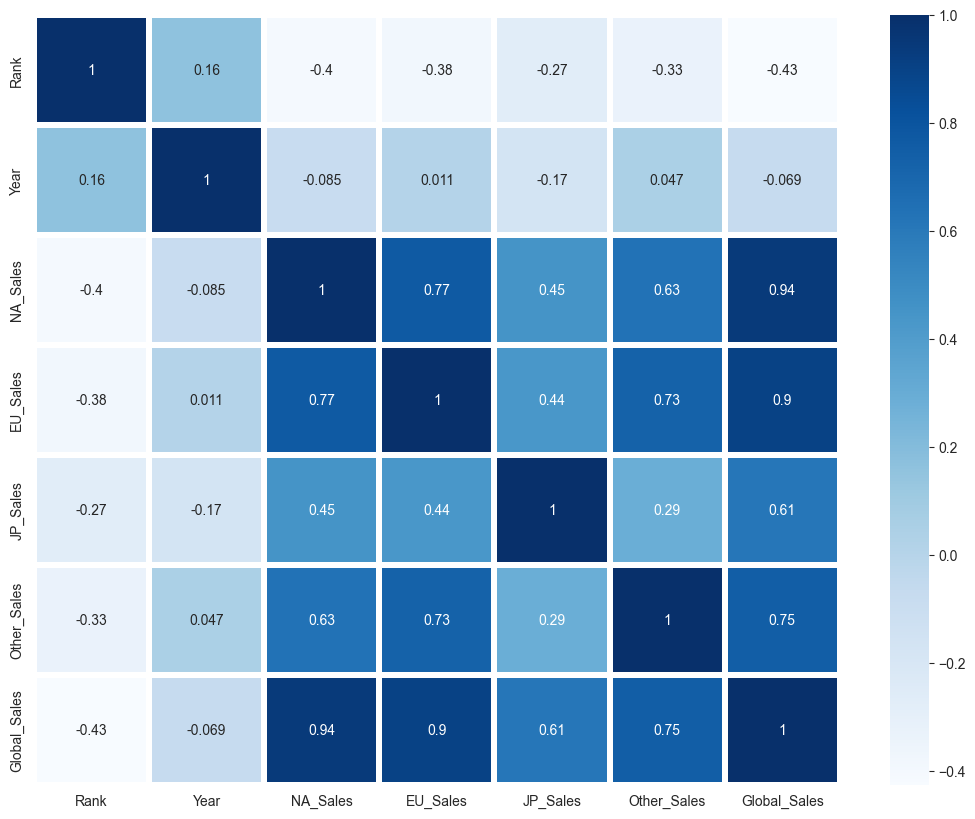

In [5]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(13,10))
sns.heatmap(numeric_data.corr(), cmap="Blues", annot=True, linewidths=3)
plt.show()


In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# fill na publisher to unknowndata["Publisher"].fillna("Unknown", inplace=True)
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
#   and fill missing year data
print("Mean year", int(round(data["Year"].mean(),0)))
print("Median year", data["Year"].median())
print("Minimum year", data["Year"].min())
print("Maximum year", data["Year"].max())
print(data[data["Year"].isnull()])

Mean year 2006
Median year 2007.0
Minimum year 1980.0
Maximum year 2015.0
        Rank                         Name Platform  Year         Genre  \
179      180              Madden NFL 2004      PS2   NaN        Sports   
377      378             FIFA Soccer 2004      PS2   NaN        Sports   
431      432   LEGO Batman: The Videogame      Wii   NaN        Action   
470      471   wwe Smackdown vs. Raw 2006      PS2   NaN      Fighting   
607      608               Space Invaders     2600   NaN       Shooter   
...      ...                          ...      ...   ...           ...   
16307  16310                Freaky Flyers       GC   NaN        Racing   
16327  16330                    Inversion       PC   NaN       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan      PS3   NaN     Adventure   
16427  16430                 Virtua Quest       GC   NaN  Role-Playing   
16493  16496                   The Smurfs      3DS   NaN        Action   

                                    P

In [9]:
import re

def extract_year_from_name(name):
    match = re.search(r'(19[8-9][0-9]|20[0-1][0-9]|2020)', str(name))
    if match:
        return int(match.group(0))
    return None


In [10]:
data['Name_Year'] = data['Name'].apply(extract_year_from_name)


In [11]:
data['Year'] = data['Year'].fillna(data['Name_Year'])
data[data["Rank"].isin([180,378])]

Rank              Name Platform    Year   Genre        Publisher  \
179   180   Madden NFL 2004      PS2  2004.0  Sports  Electronic Arts   
377   378  FIFA Soccer 2004      PS2  2004.0  Sports  Electronic Arts   

     NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Name_Year  
179      4.26      0.26      0.01         0.71          5.23     2004.0  
377      0.59      2.36      0.04         0.51          3.49     2004.0

In [12]:
data.drop(columns=['Name_Year'], inplace=True)
print(data[data["Year"].isnull()])

        Rank                                         Name Platform  Year  \
431      432                   LEGO Batman: The Videogame      Wii   NaN   
607      608                               Space Invaders     2600   NaN   
624      625                                    Rock Band     X360   NaN   
649      650     Frogger's Adventures: Temple of the Frog      GBA   NaN   
652      653  LEGO Indiana Jones: The Original Adventures      Wii   NaN   
...      ...                                          ...      ...   ...   
16307  16310                                Freaky Flyers       GC   NaN   
16327  16330                                    Inversion       PC   NaN   
16366  16369                  Hakuouki: Shinsengumi Kitan      PS3   NaN   
16427  16430                                 Virtua Quest       GC   NaN   
16493  16496                                   The Smurfs      3DS   NaN   

              Genre                               Publisher  NA_Sales  \
431          A

I am filling the missing years with the median value, 2007

In [13]:
data['Year'] = data['Year'].fillna(data["Year"].median())
data[data["Year"].isnull()]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

In [14]:
# convert year to int.
data["Year"] = data["Year"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          16250 non-null  int32  
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


Top 20 Publishers by Game Count

In [15]:
# data[data['Publisher']=="Unknown"]
data['Publisher'].value_counts()[:20]

Publisher
Electronic Arts                           1331
Activision                                 961
Ubisoft                                    907
Namco Bandai Games                         892
Konami Digital Entertainment               824
THQ                                        715
Nintendo                                   693
Sony Computer Entertainment                678
Sega                                       629
Take-Two Interactive                       401
Capcom                                     363
Atari                                      362
Tecmo Koei                                 321
Disney Interactive Studios                 218
Warner Bros. Interactive Entertainment     218
Square Enix                                213
Unknown                                    199
Midway Games                               198
Eidos Interactive                          198
505 Games                                  185
Name: count, dtype: int64

Games by Genre

In [16]:
data['Genre'].value_counts()

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

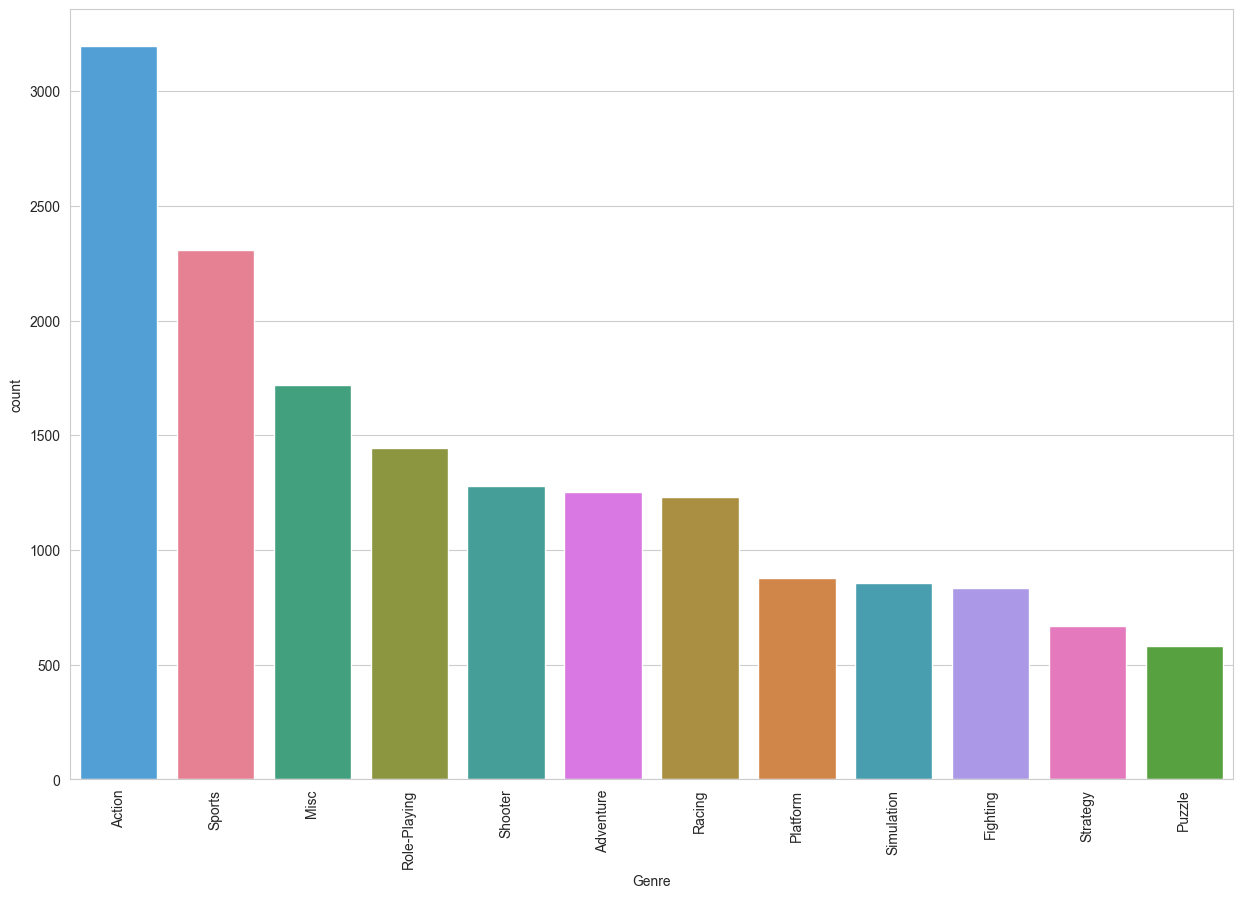

In [17]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index, hue='Genre')

Game Release by Year

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014')

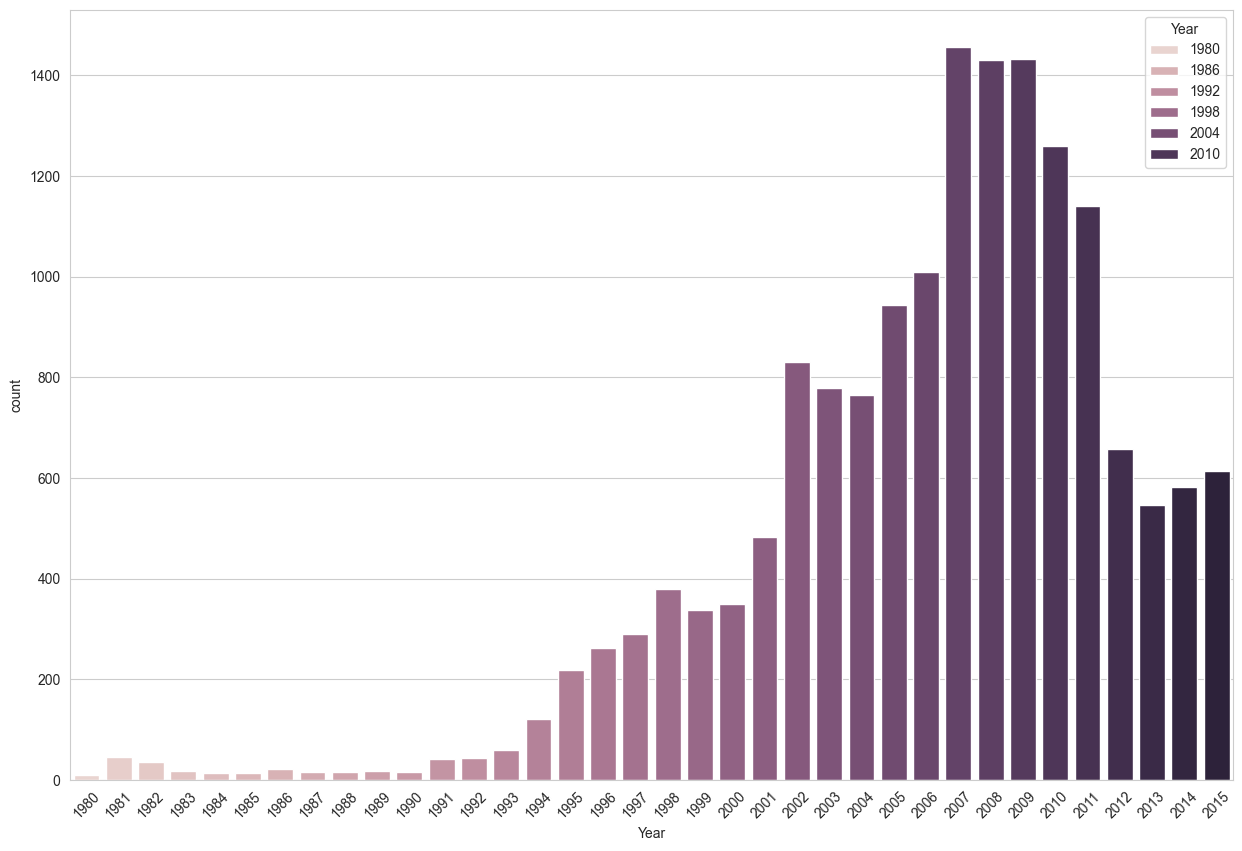

In [18]:
plt.figure(figsize=(15, 10))
# sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index, hue='Year')
sns.countplot(x="Year", data=data, hue='Year')
plt.xticks(rotation=45)

## Top 5 years games release by genre

([0, 1, 2, 3, 4],
 [Text(0, 0, '2007'),
  Text(1, 0, '2009'),
  Text(2, 0, '2008'),
  Text(3, 0, '2010'),
  Text(4, 0, '2011')])

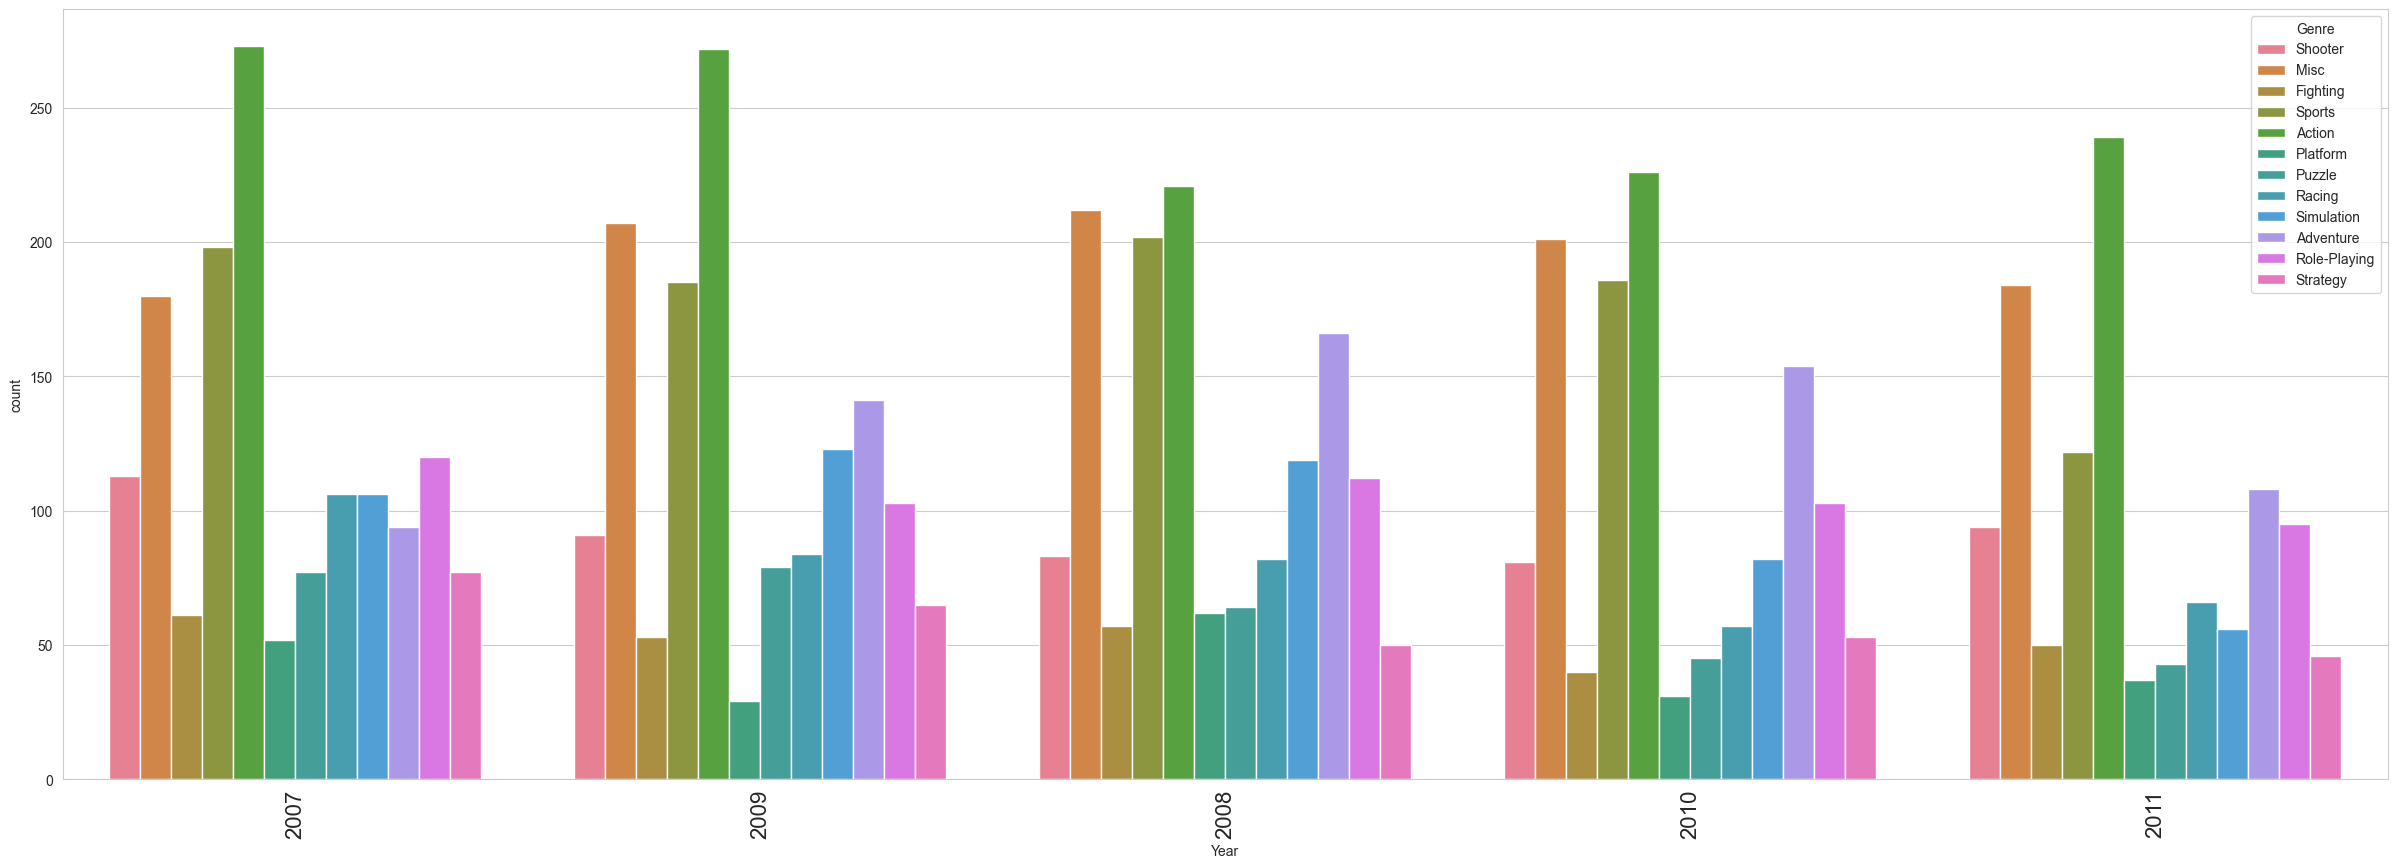

In [19]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

## Game Sales By Year

In [20]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014')

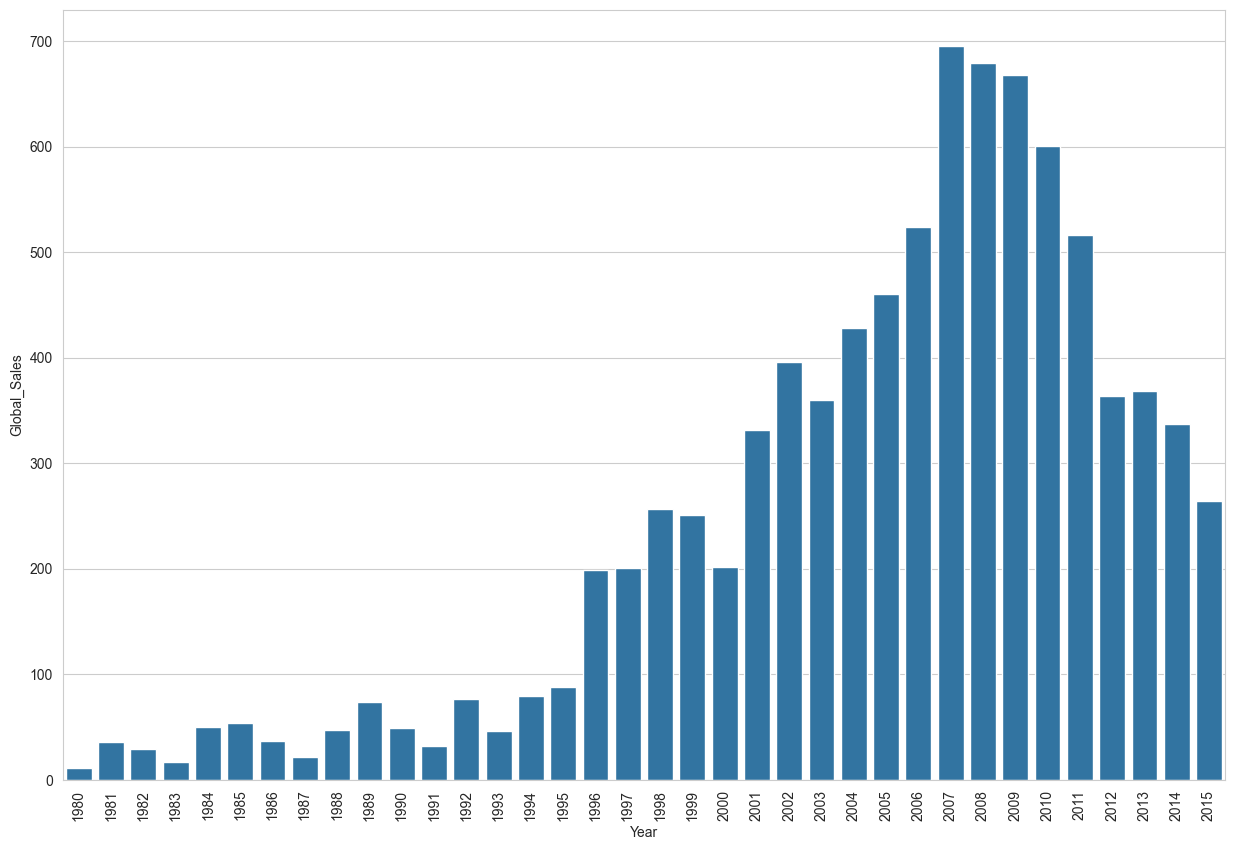

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

2007-2010 are golden years.

## Most Released Genre in a Single Year

In [22]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

C:\Users\Dell\AppData\Local\Temp\ipykernel_4044\3062574480.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']


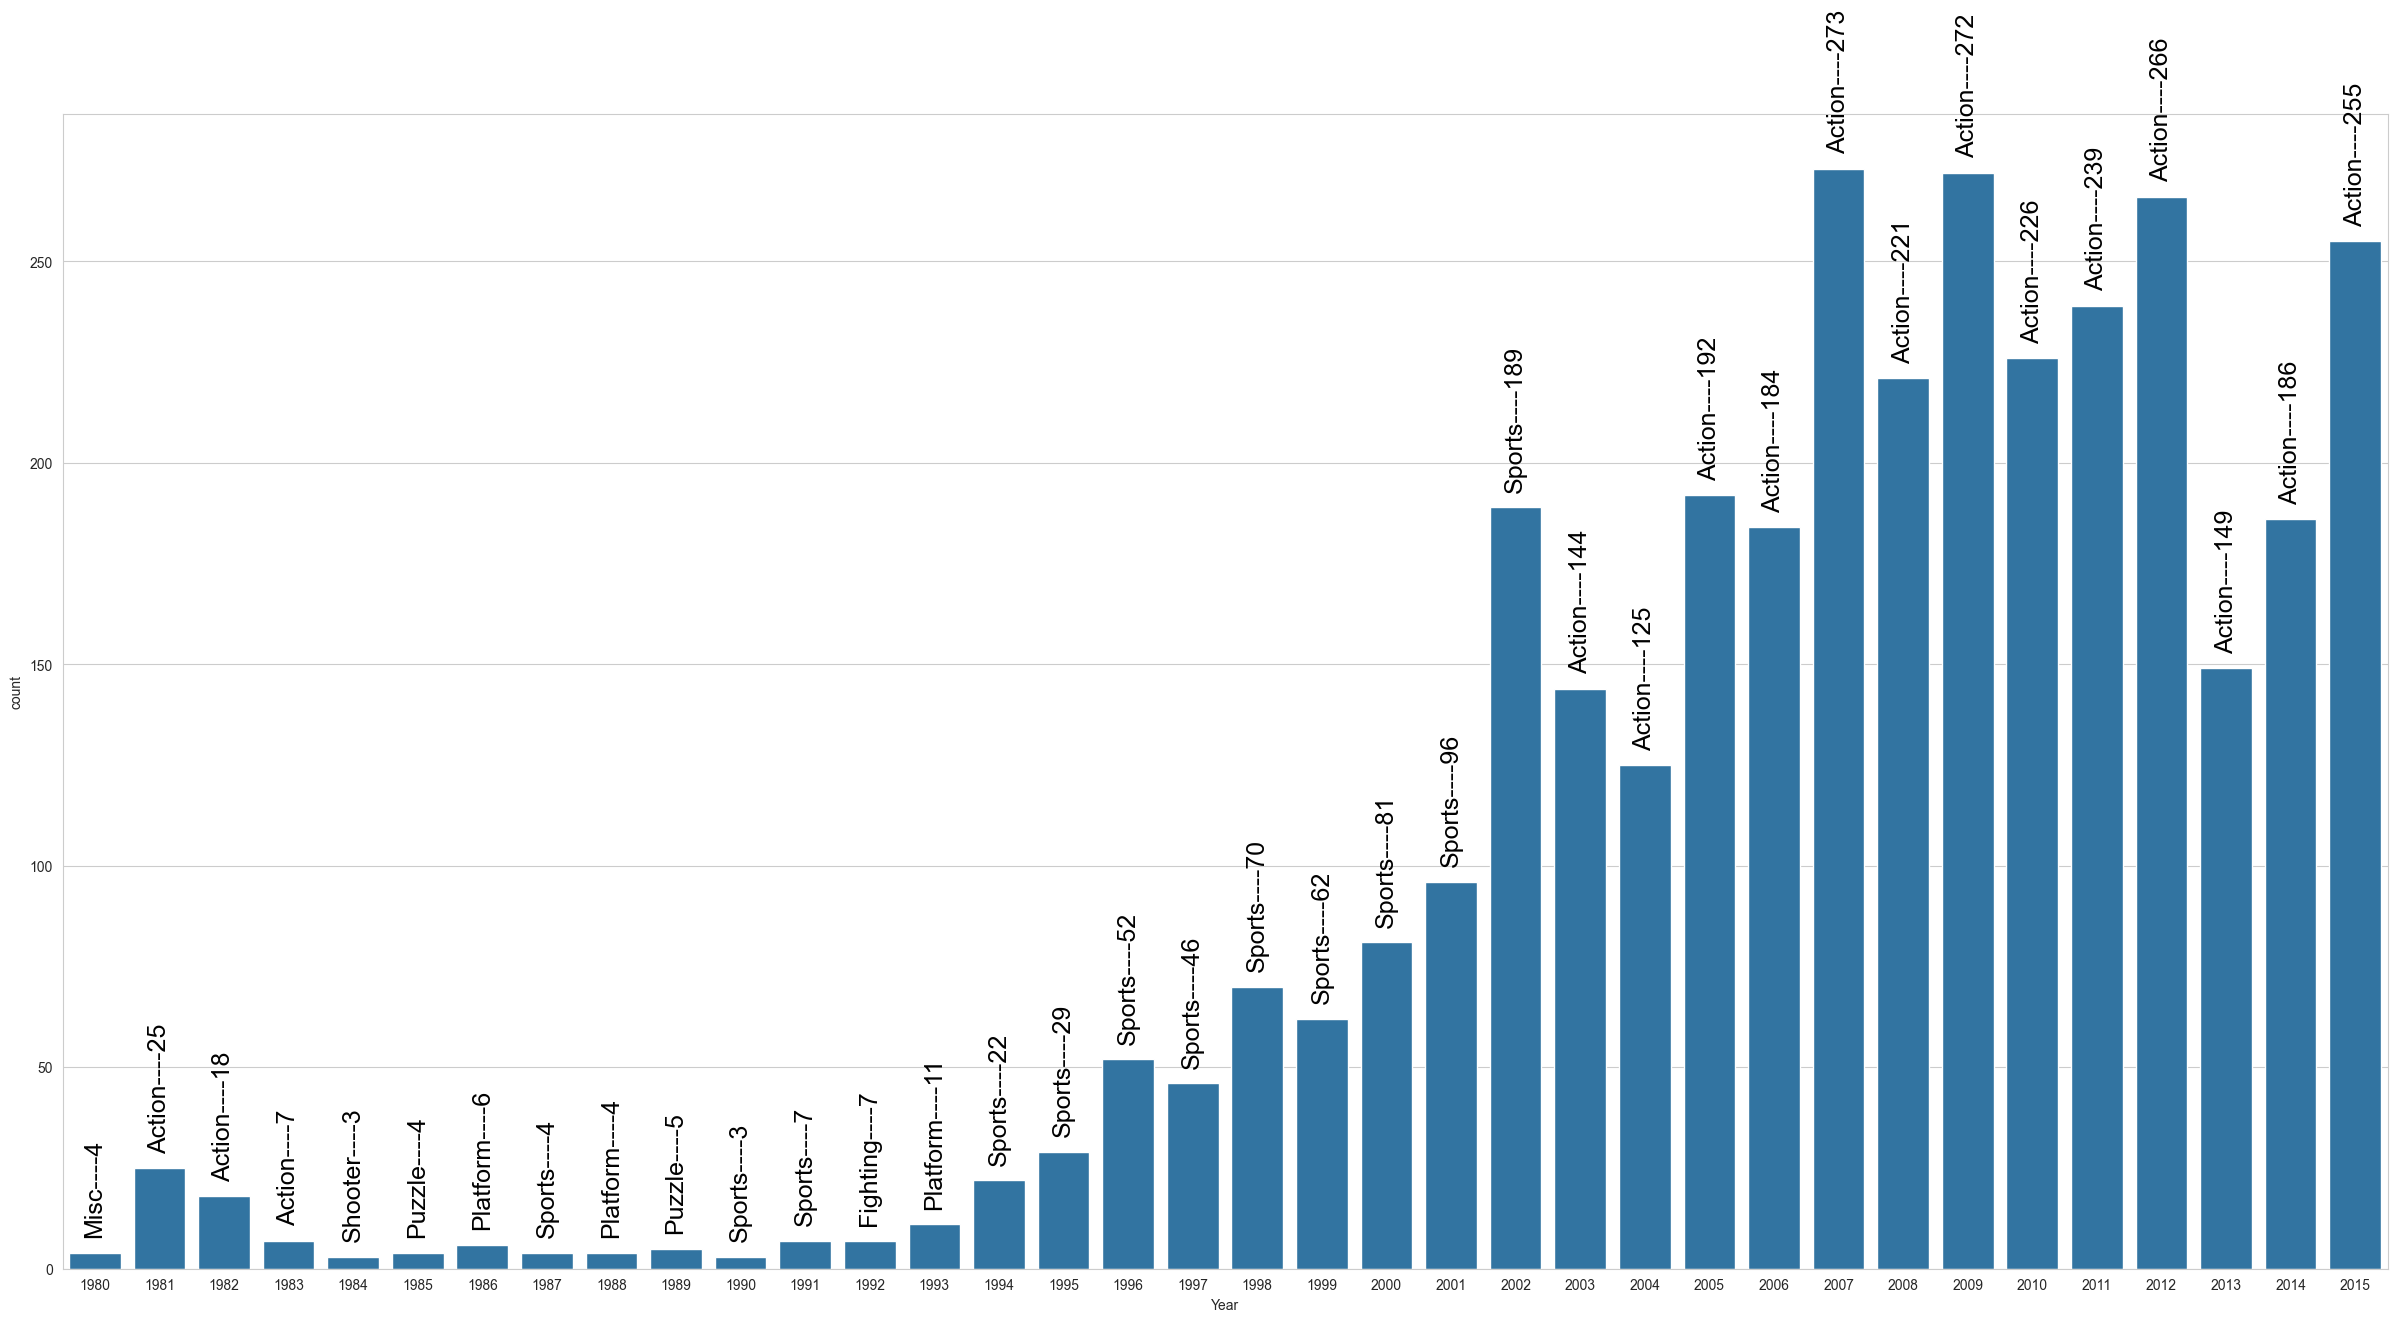

In [23]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(x=index, y=value + 5, s=str(genre[index] + '----' +str(value)), color='#000', size=18, rotation= 90, ha="center")
    index += 1

## Most Saled Genre in a Year

In [24]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4044\2454946416.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']


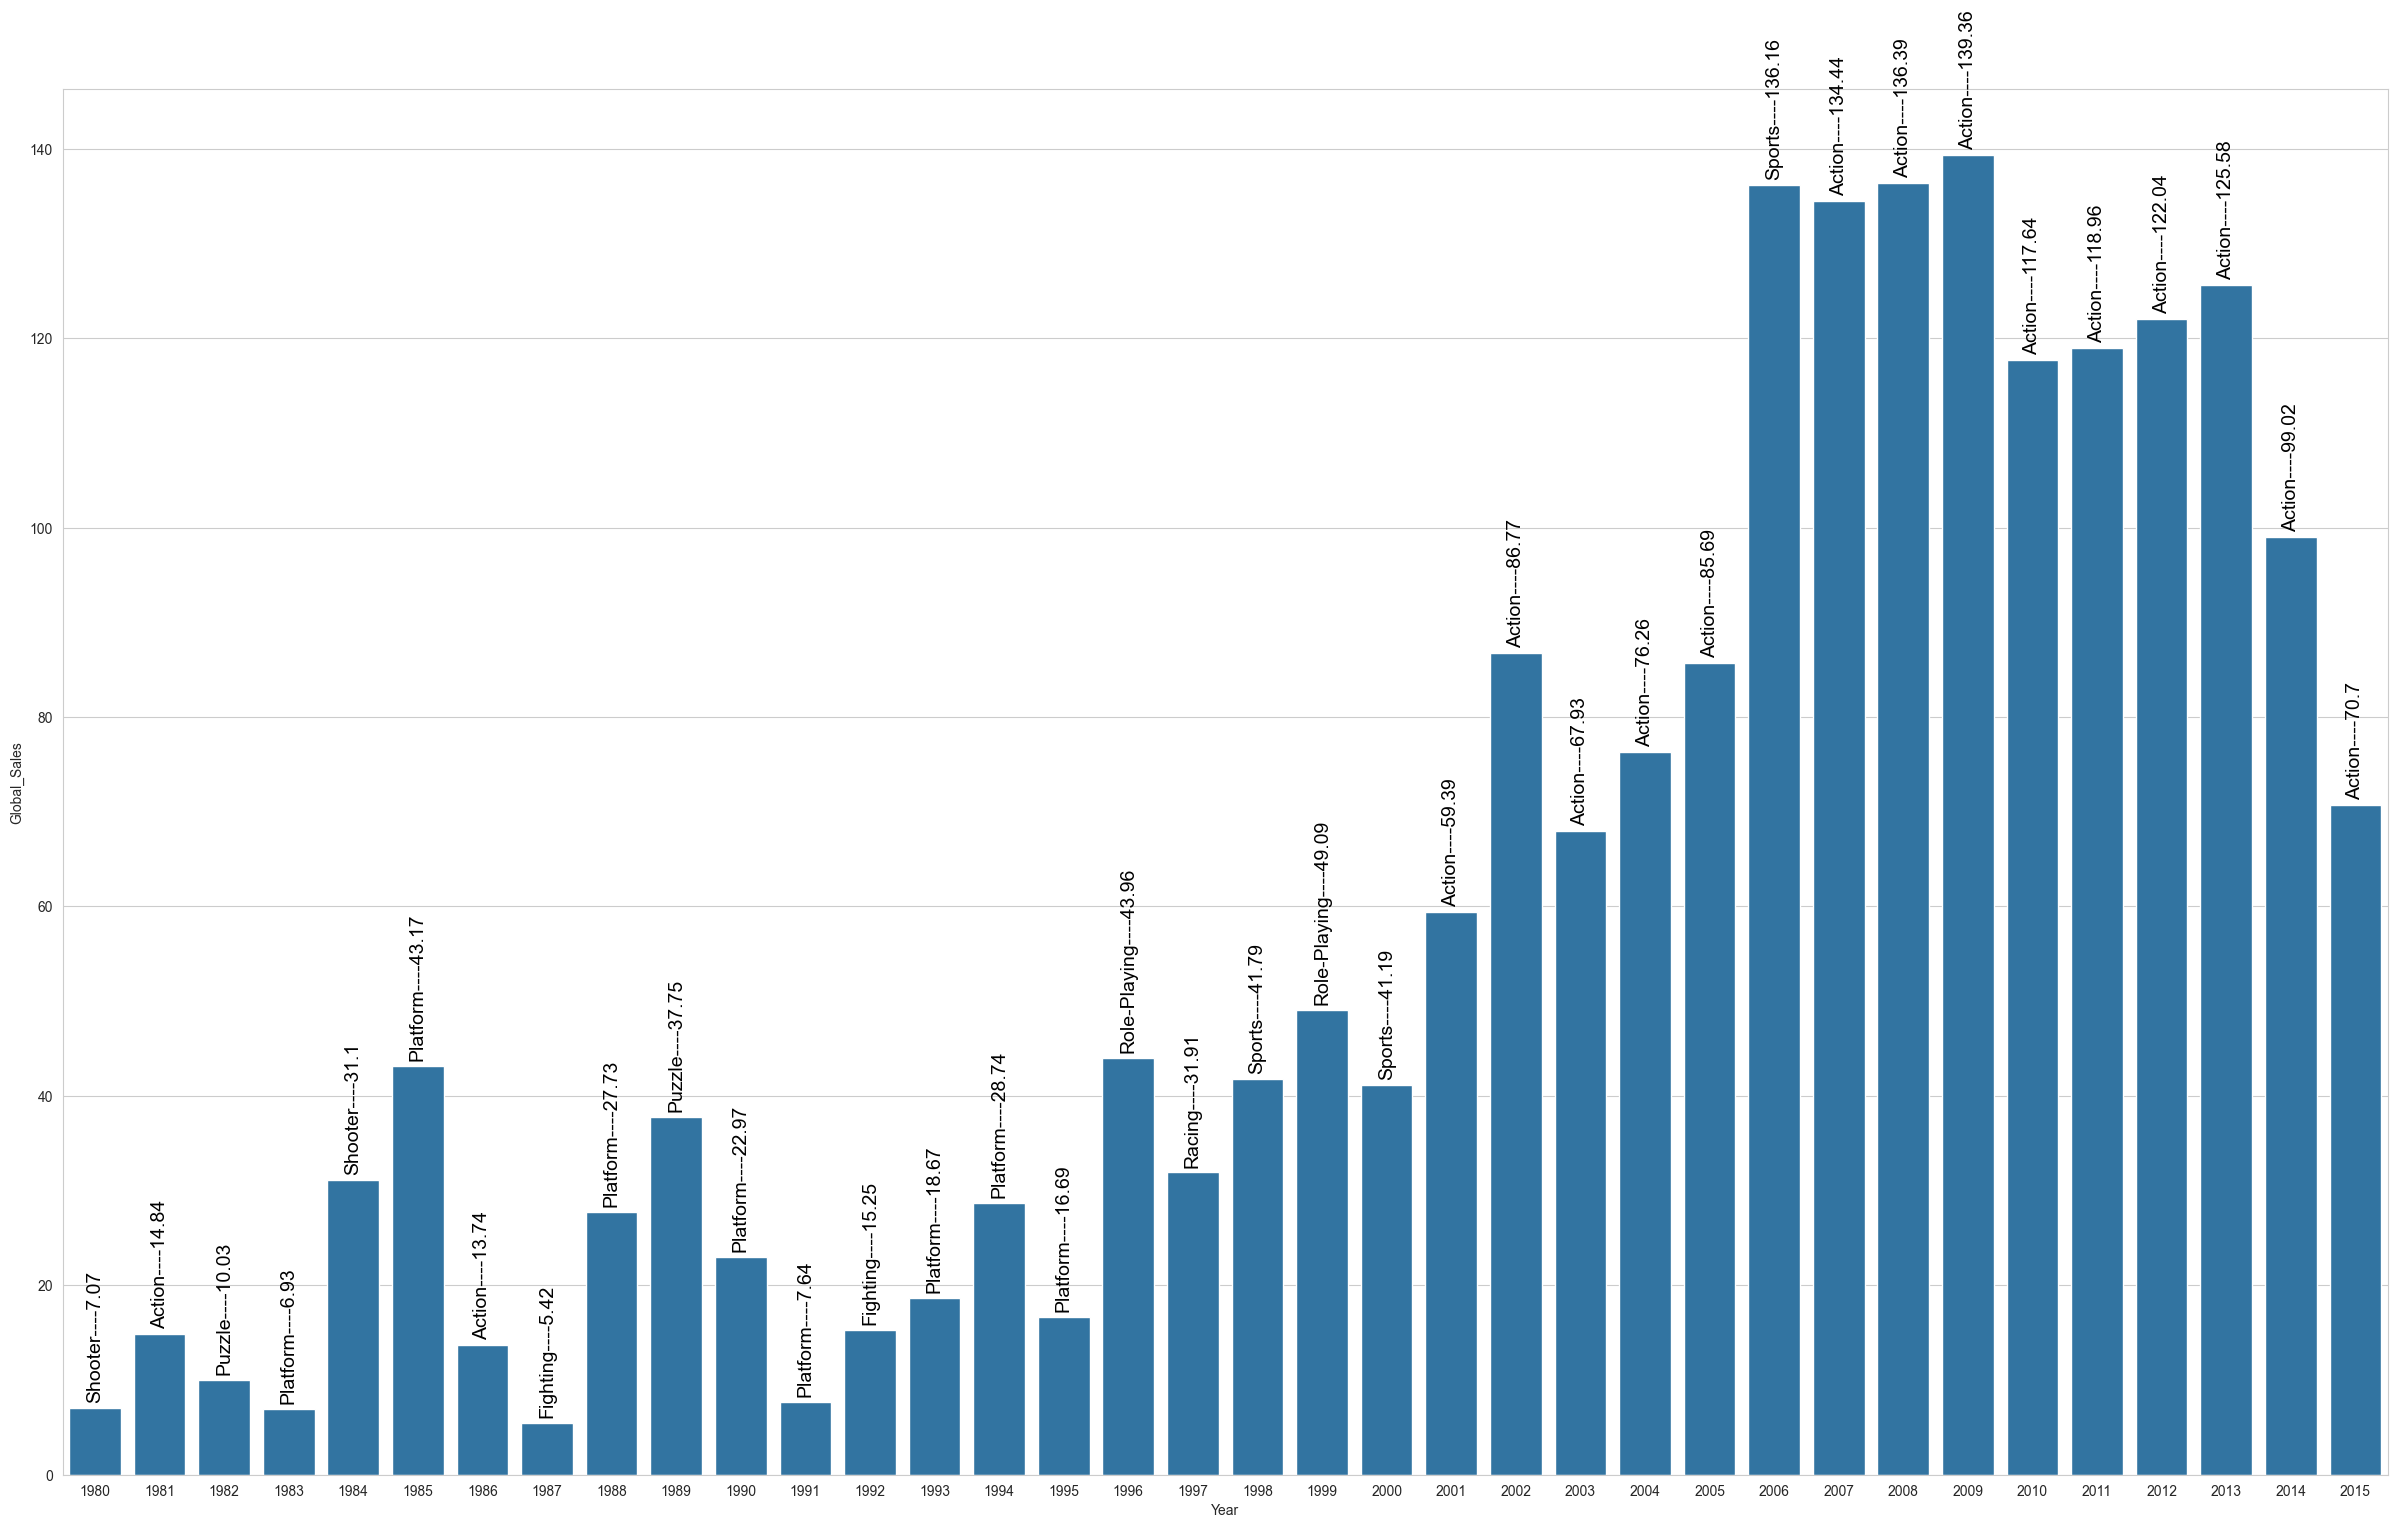

In [25]:
genre = year_sale_max['Genre']
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

## Genre by Highest Sale Price

In [26]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre

Genre  Global_Sales
0         Action       1731.26
10        Sports       1316.33
8        Shooter       1019.15
7   Role-Playing        920.57
4       Platform        829.30
3           Misc        808.79
6         Racing        730.40
2       Fighting        445.05
9     Simulation        391.52
5         Puzzle        244.95
1      Adventure        237.23
11      Strategy        174.62

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

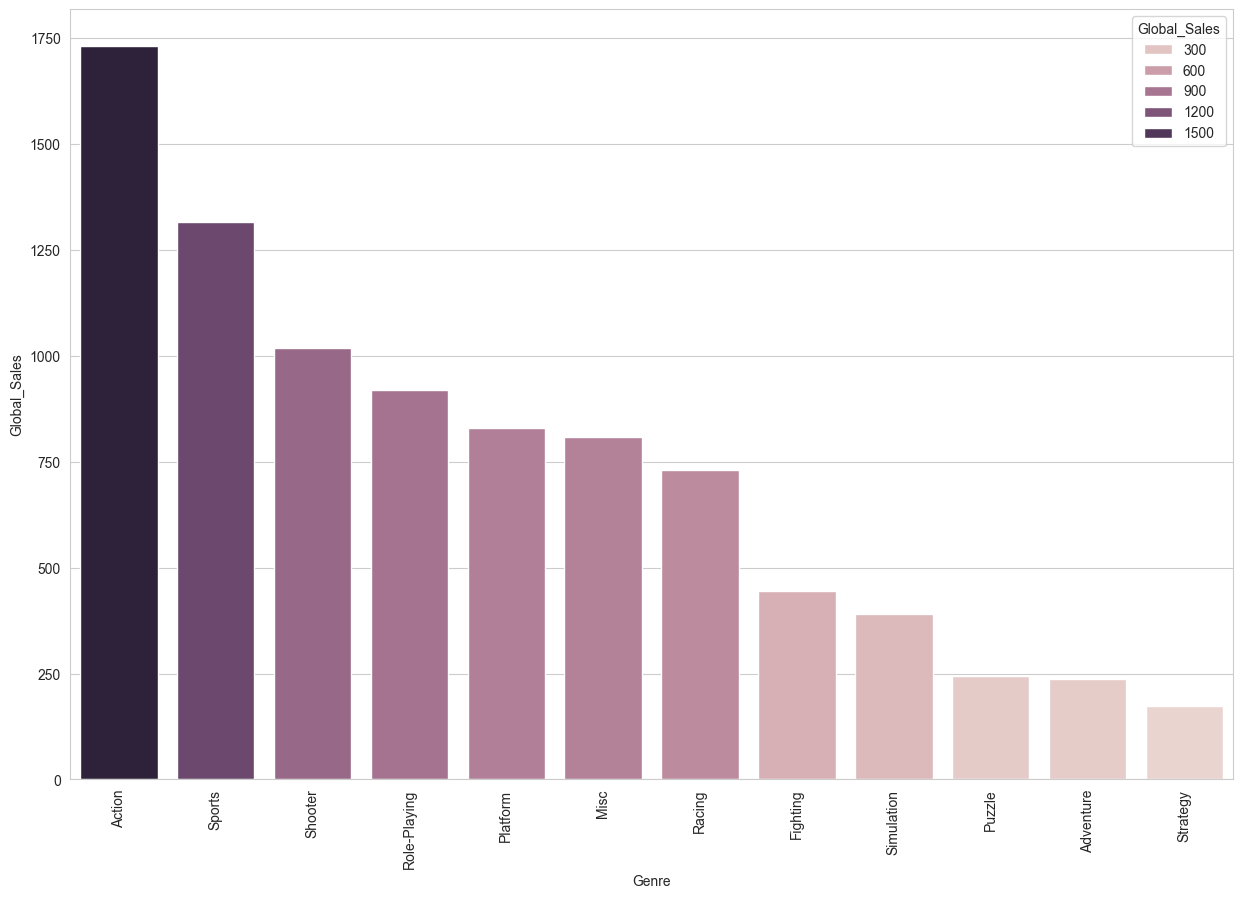

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre, hue="Global_Sales")
plt.xticks(rotation=90)

## Platform by Highest Sale Price

In [28]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
data_platform

Platform  Global_Sales
16      PS2       1255.64
28     X360        979.13
17      PS3        955.25
26      Wii        926.71
4        DS        822.20
15       PS        730.66
6       GBA        318.50
19      PSP        296.28
29       XB        258.26
13       PC        256.22
5        GB        255.45
11      NES        251.07
2       3DS        240.86
18      PS4        238.82
10      N64        218.88
23     SNES        200.05
7        GC        199.36
30     XOne        128.69
0      2600         97.08
27     WiiU         78.57
20      PSV         58.51
21      SAT         33.59
8       GEN         28.36
3        DC         15.97
22      SCD          1.87
12       NG          1.44
25       WS          1.42
24     TG16          0.16
1       3DO          0.10
9        GG          0.04
14     PCFX          0.03

In [29]:
data_platform_2 = data.groupby(by=["Platform"], as_index=False).agg({'Global_Sales': pd.Series.sum})
data_platform_2.sort_values(by=['Global_Sales'], ascending=False)

Platform  Global_Sales
16      PS2       1255.64
28     X360        979.13
17      PS3        955.25
26      Wii        926.71
4        DS        822.20
15       PS        730.66
6       GBA        318.50
19      PSP        296.28
29       XB        258.26
13       PC        256.22
5        GB        255.45
11      NES        251.07
2       3DS        240.86
18      PS4        238.82
10      N64        218.88
23     SNES        200.05
7        GC        199.36
30     XOne        128.69
0      2600         97.08
27     WiiU         78.57
20      PSV         58.51
21      SAT         33.59
8       GEN         28.36
3        DC         15.97
22      SCD          1.87
12       NG          1.44
25       WS          1.42
24     TG16          0.16
1       3DO          0.10
9        GG          0.04
14     PCFX          0.03

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

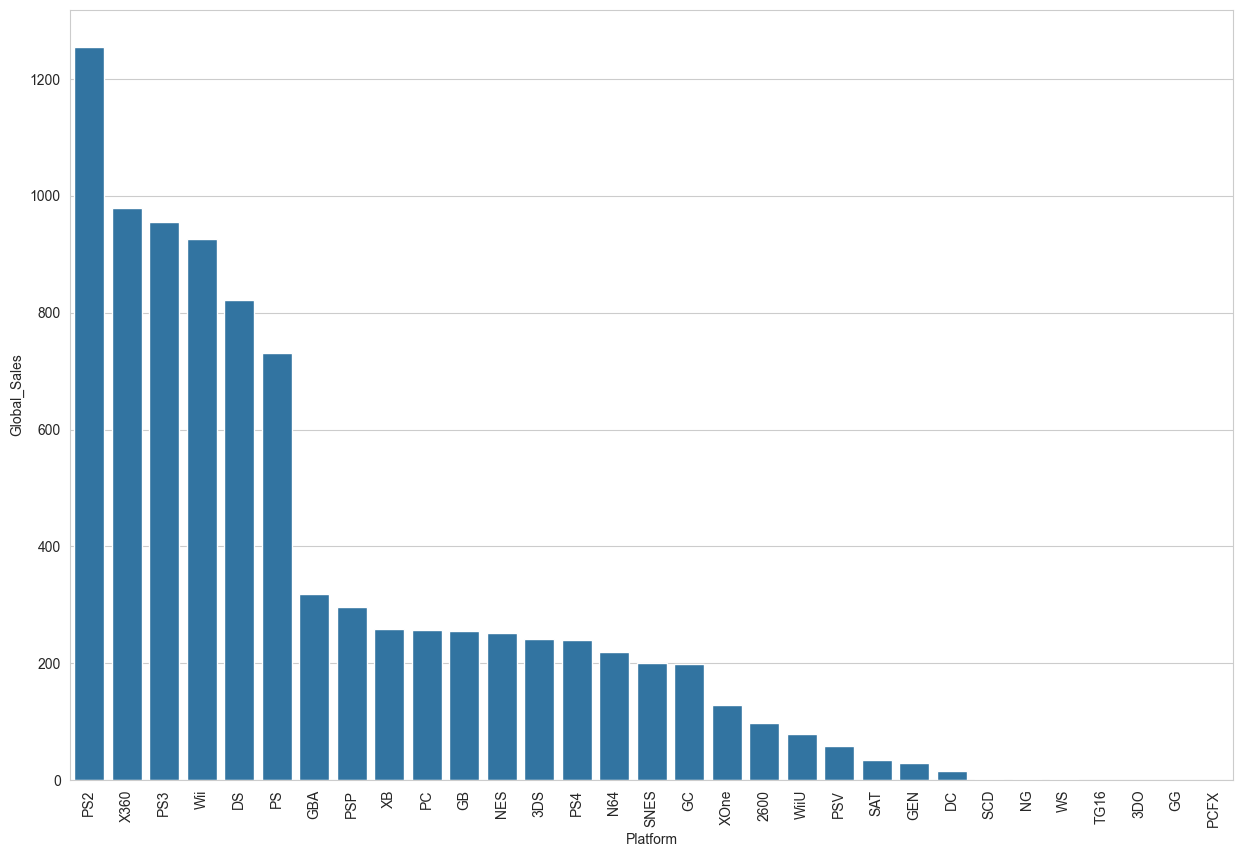

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

Play Station was dominating in those years, PC sales were lower.

##  Highest selling Games and the Year

In [31]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
# top_game_sale

In [32]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

In [100]:
top_game_sale['Name'][0]

'Wii Sports'

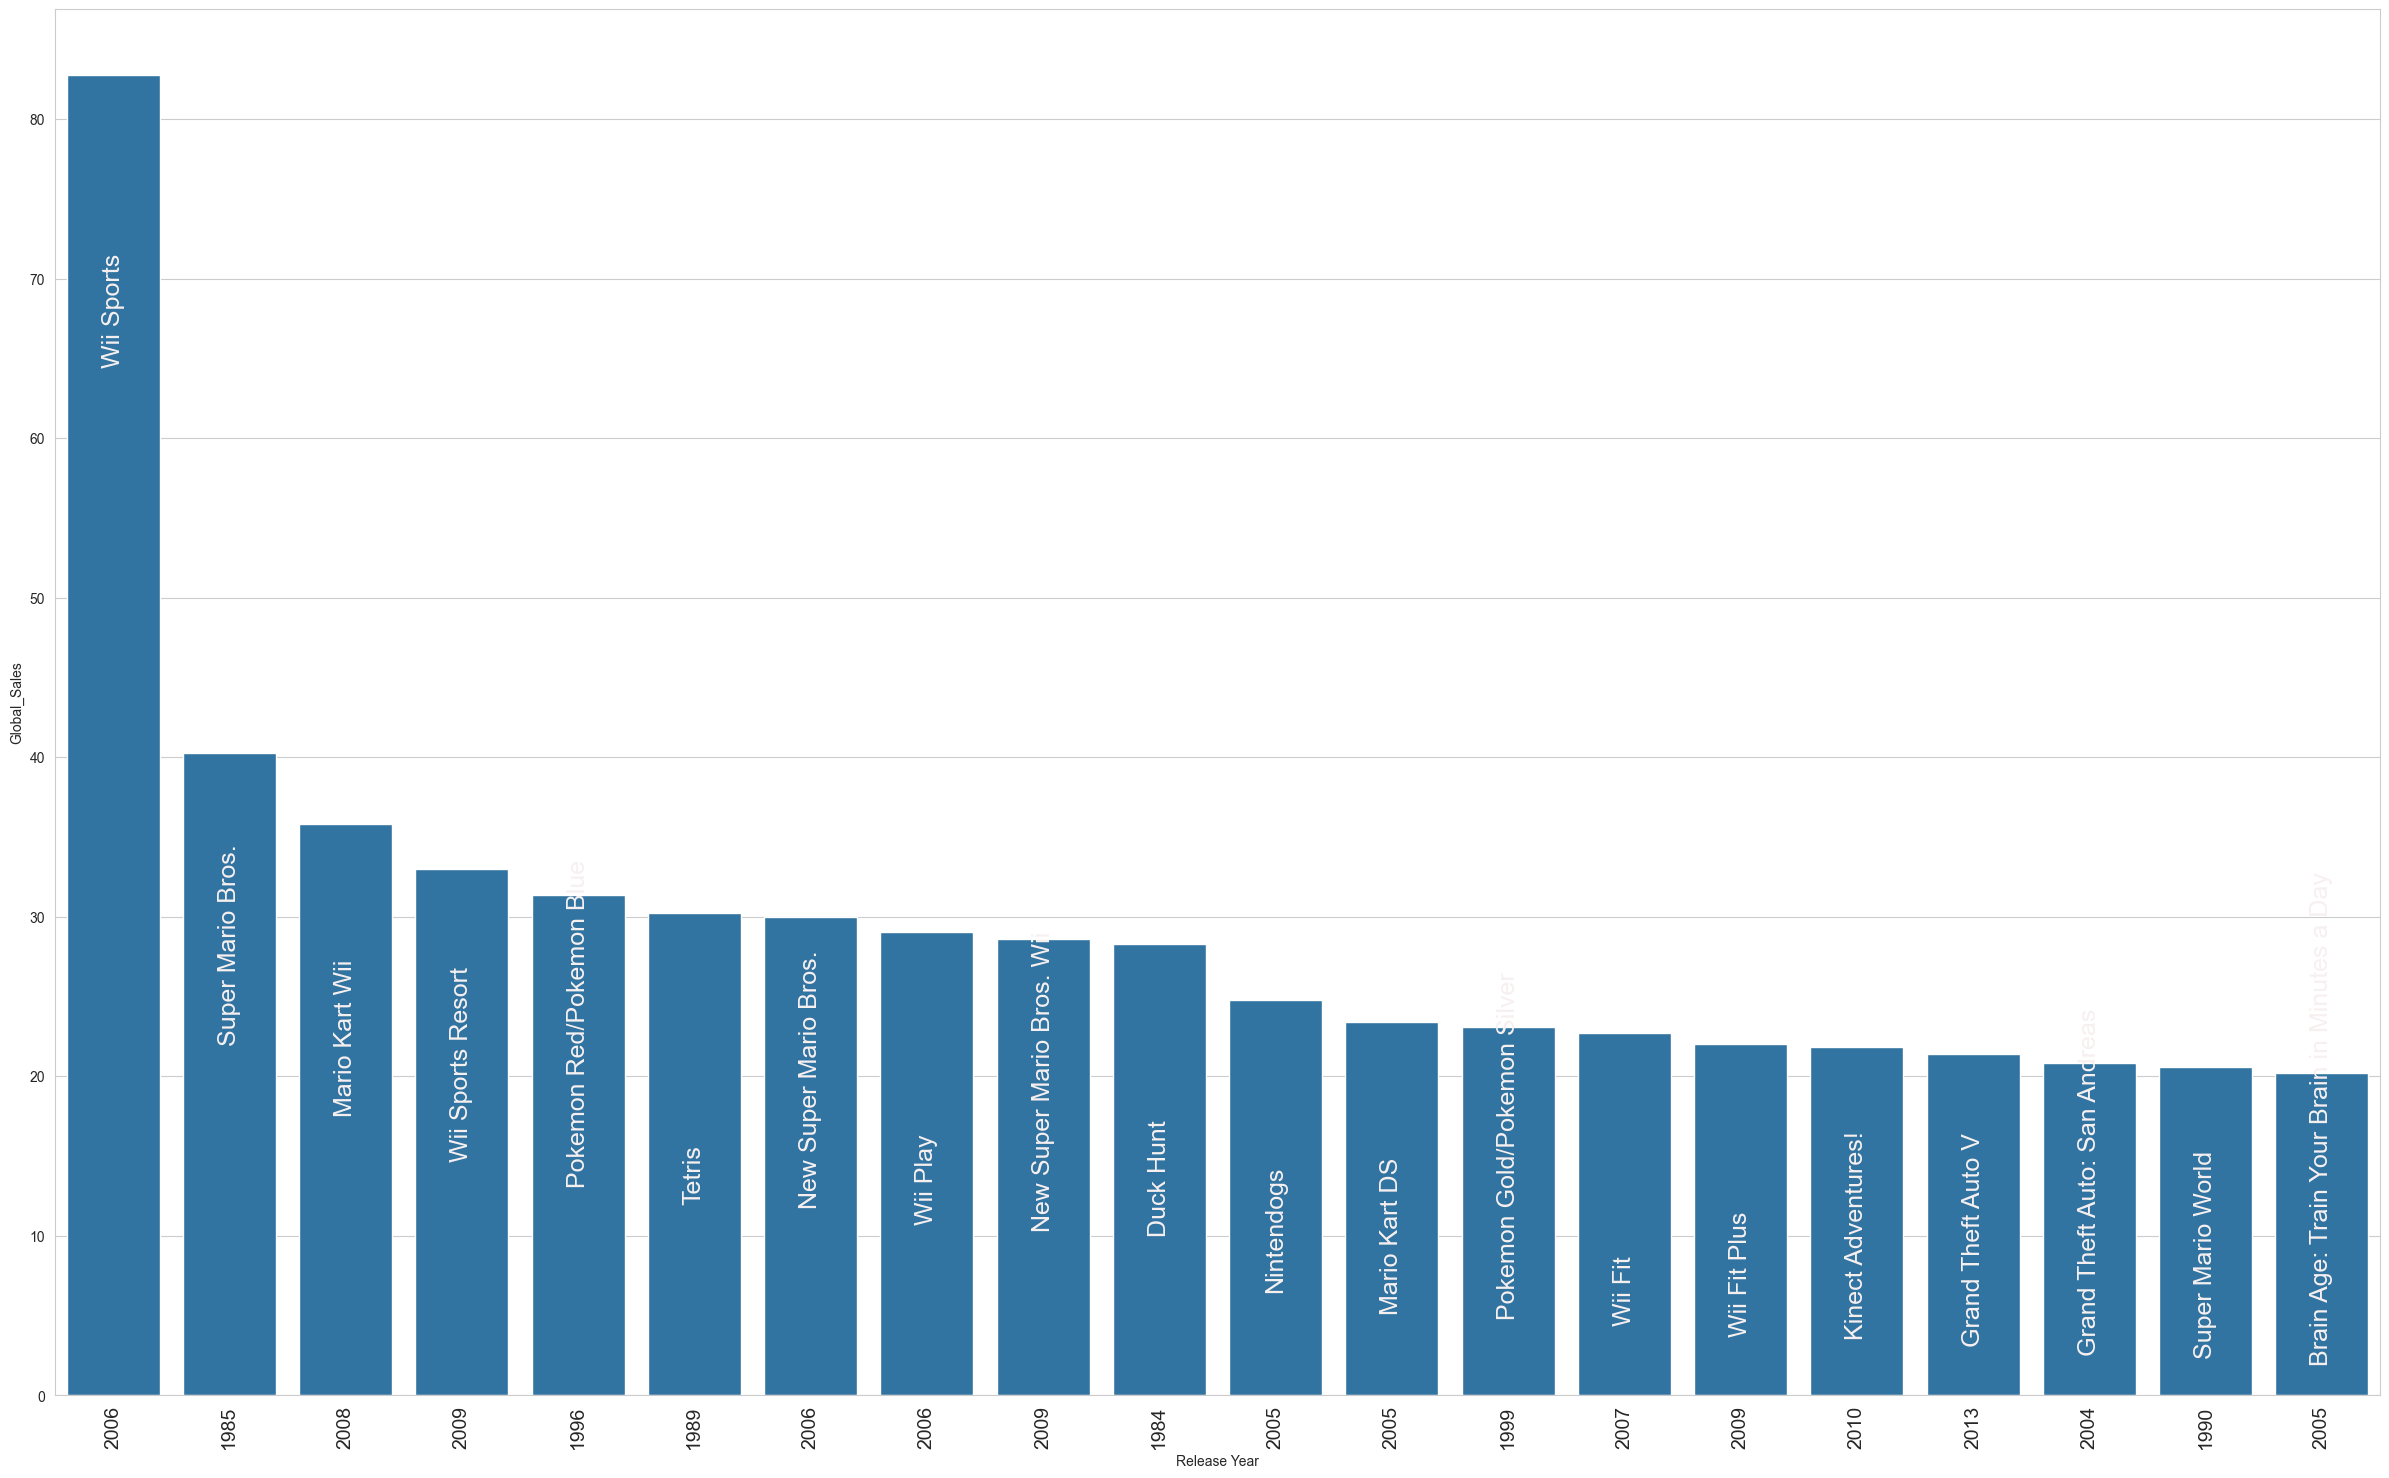

In [33]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#f7f0f0', size=18, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

## Sales comparison by genre

In [34]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

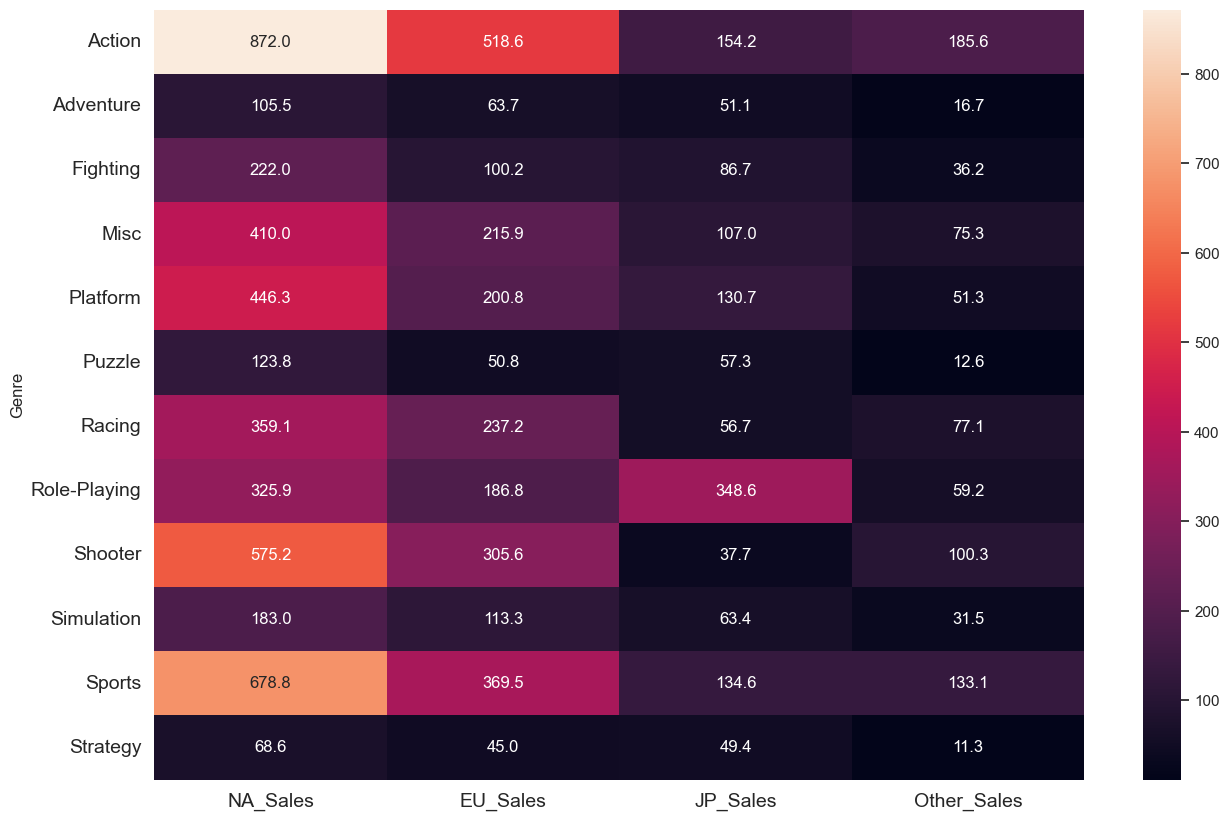

In [35]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [36]:
comp_table = comp_map.reset_index()
# melt columns into rows:
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Total')
comp_table.head()

Genre Sale_Area  Sale_Total
0     Action  NA_Sales      871.96
1  Adventure  NA_Sales      105.46
2   Fighting  NA_Sales      221.99
3       Misc  NA_Sales      410.02
4   Platform  NA_Sales      446.26

<Axes: xlabel='Genre', ylabel='Sale_Total'>

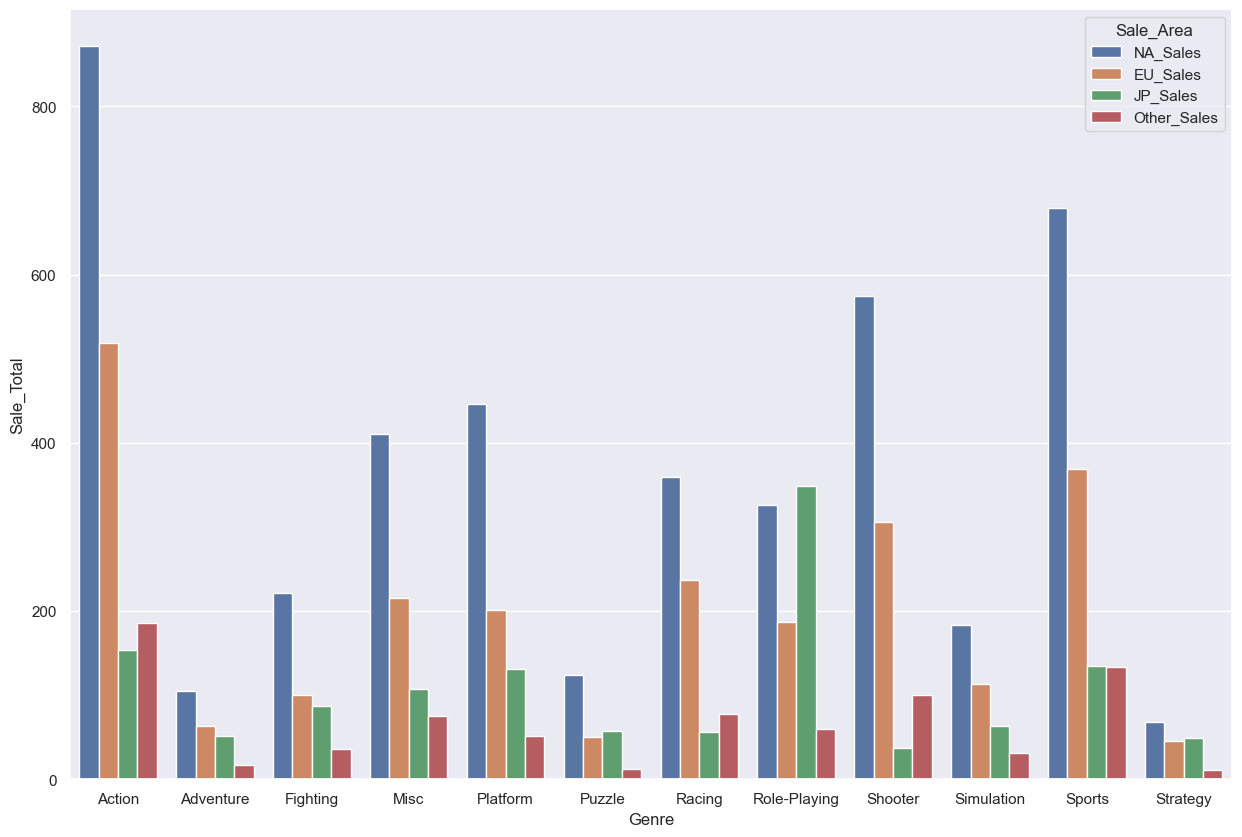

In [37]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Total', hue='Sale_Area', data=comp_table)

## Sales comparison by platform

In [38]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_platform.head()
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

Platform Sale_Area  Sale_Price
0     2600  NA_Sales       90.60
1      3DO  NA_Sales        0.00
2      3DS  NA_Sales       78.04
3       DC  NA_Sales        5.43
4       DS  NA_Sales      390.44

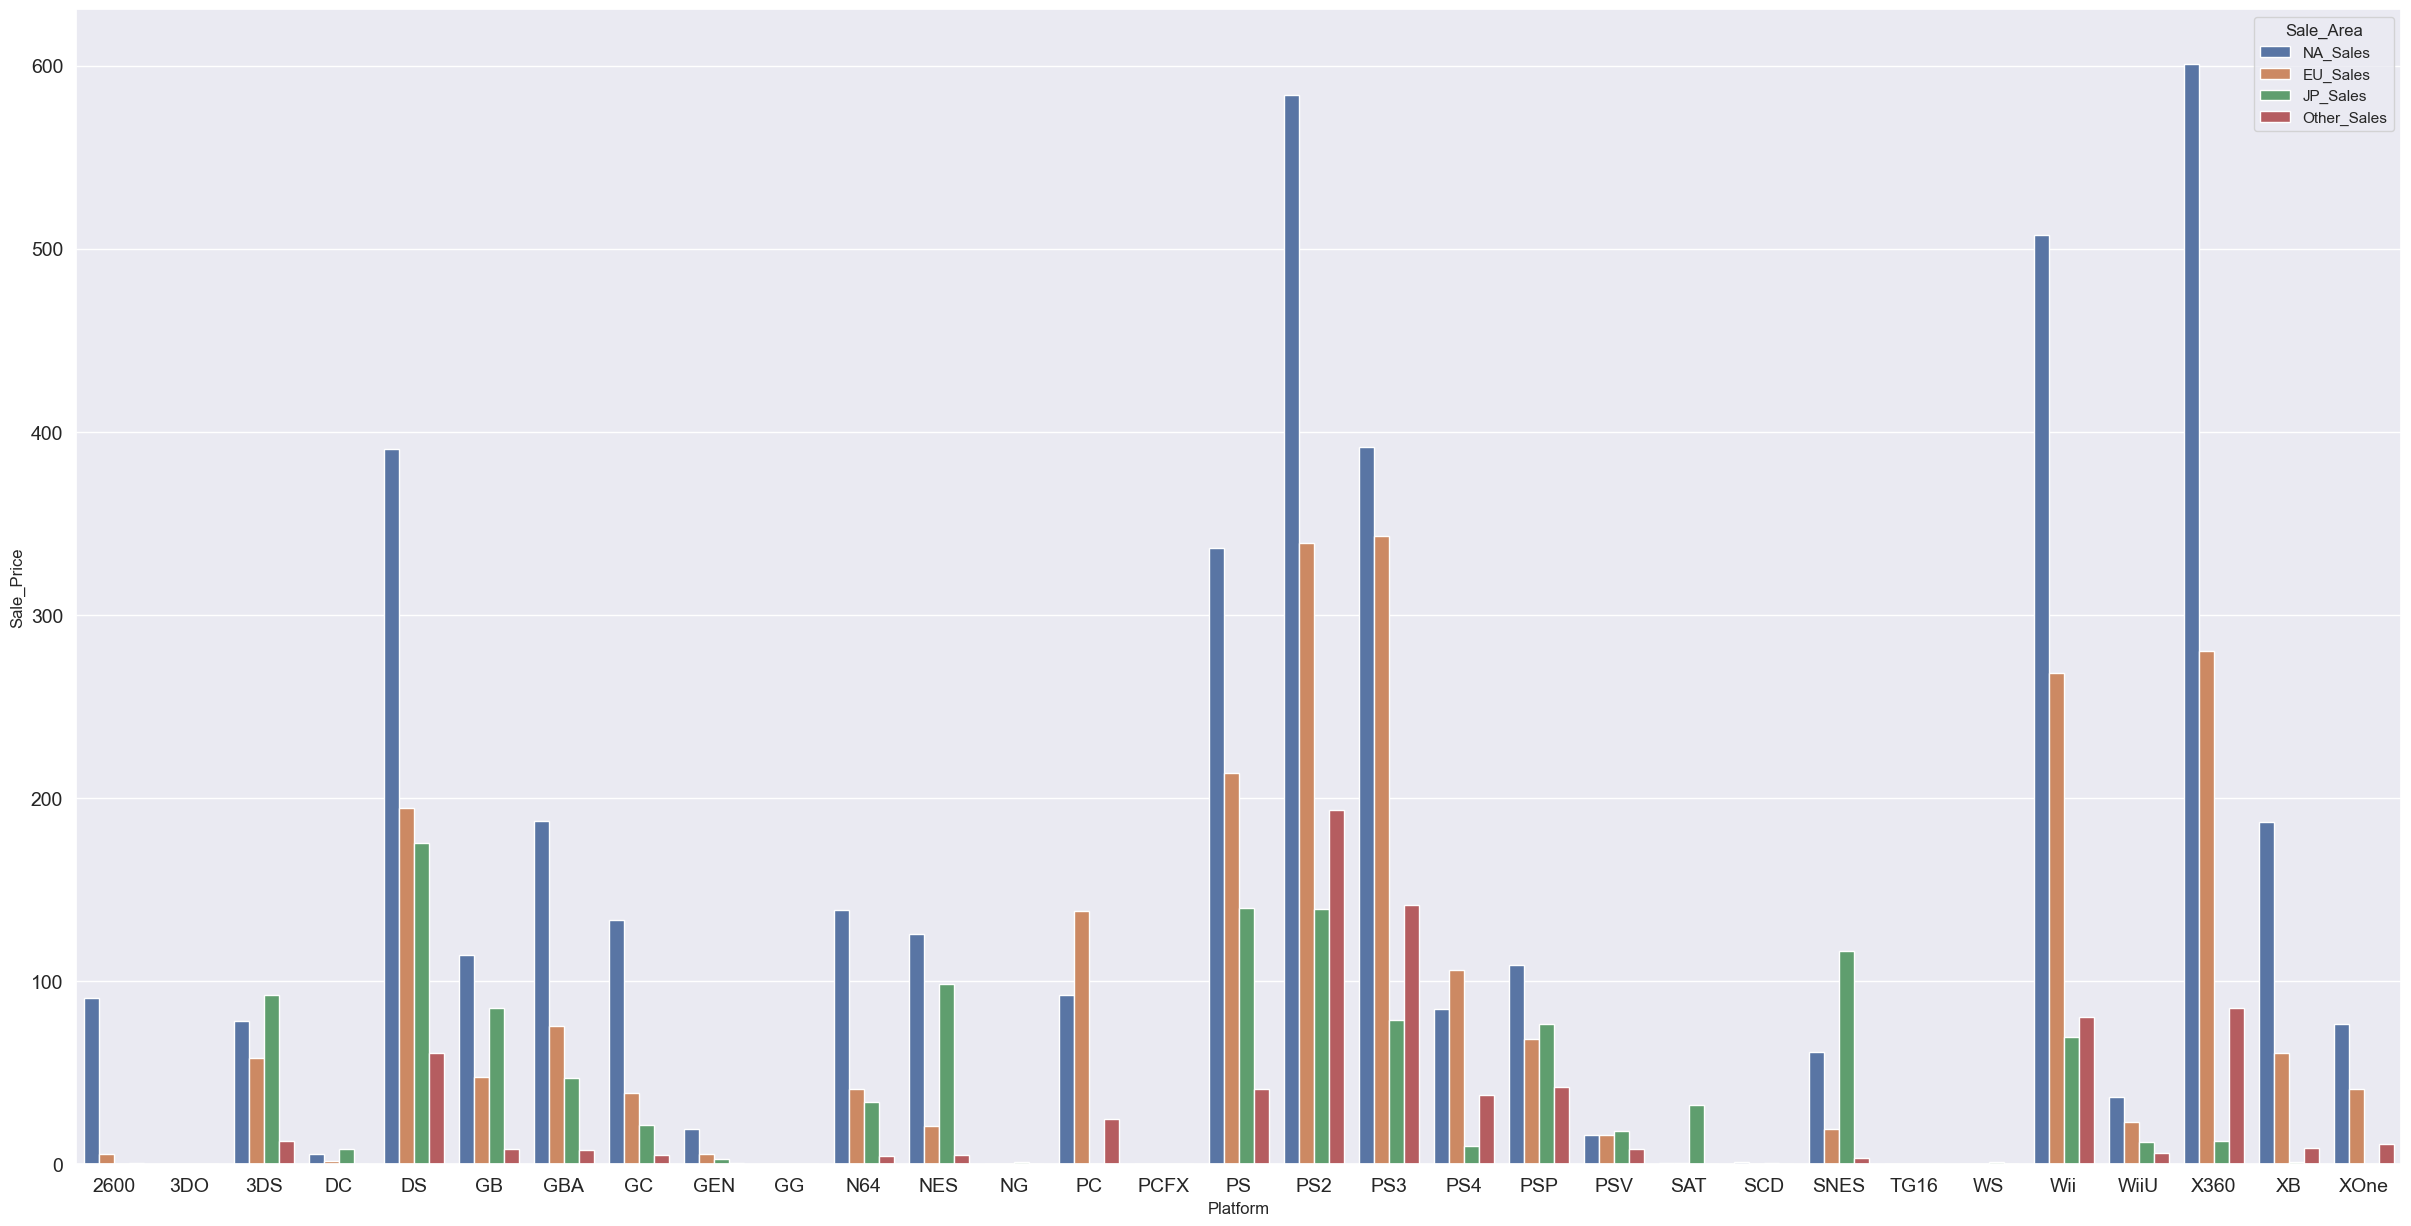

In [39]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Top 20 Publisher

In [40]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index().rename(columns={"Year": "Game_Count"})
# top_publisher.rename(columns={"Year": "Game_Count"}) # BUG
top_publisher

Publisher  Game_Count
0                          Electronic Arts        1331
1                               Activision         961
2                                  Ubisoft         907
3                       Namco Bandai Games         892
4             Konami Digital Entertainment         824
5                                      THQ         715
6                                 Nintendo         693
7              Sony Computer Entertainment         678
8                                     Sega         629
9                     Take-Two Interactive         401
10                                  Capcom         363
11                                   Atari         362
12                              Tecmo Koei         321
13              Disney Interactive Studios         218
14  Warner Bros. Interactive Entertainment         218
15                             Square Enix         213
16                                 Unknown         199
17                       Eidos Interactive         198
18                            Midway Games         198
19                               505 Games         185

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Square Enix'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, 'Midway Games'),
  Text(19, 0, '505 Games')])

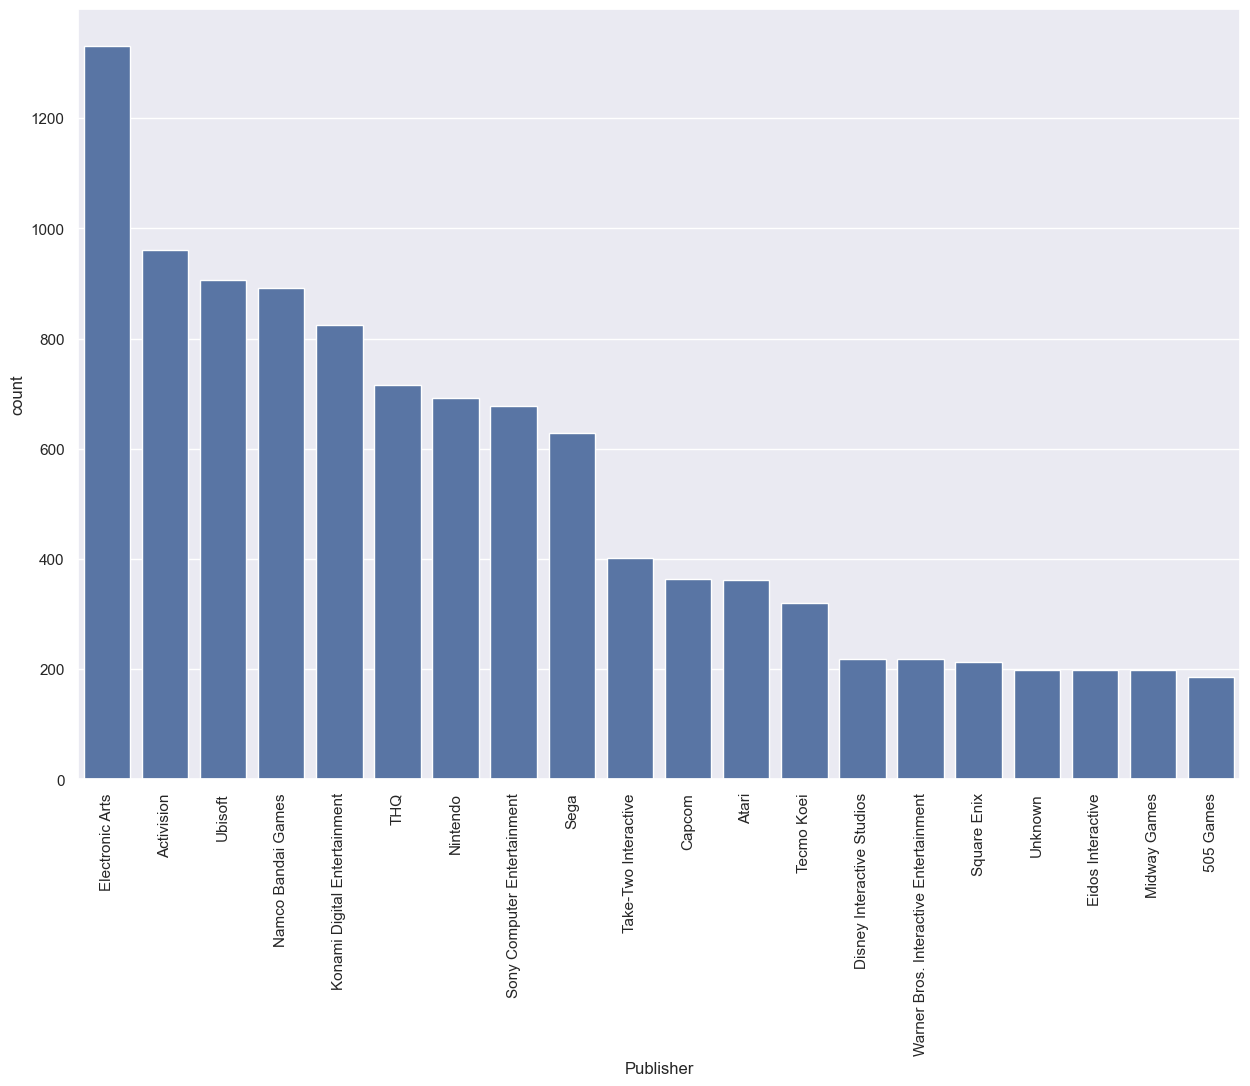

In [41]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

## Top global sales by publisher

In [42]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl

Publisher  Global_Sales
0                                 Nintendo       1783.09
1                          Electronic Arts       1098.07
2                               Activision        723.79
3              Sony Computer Entertainment        600.94
4                                  Ubisoft        464.67
5                     Take-Two Interactive        396.65
6                                      THQ        340.77
7             Konami Digital Entertainment        282.43
8                                     Sega        272.18
9                       Namco Bandai Games        247.60
10                  Microsoft Game Studios        244.37
11                                  Capcom        198.77
12                                   Atari        157.20
13  Warner Bros. Interactive Entertainment        150.37
14                             Square Enix        141.65
15              Disney Interactive Studios        119.96
16                       Eidos Interactive         98.98
17                               LucasArts         87.34
18                      Bethesda Softworks         79.89
19                            Midway Games         69.85

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

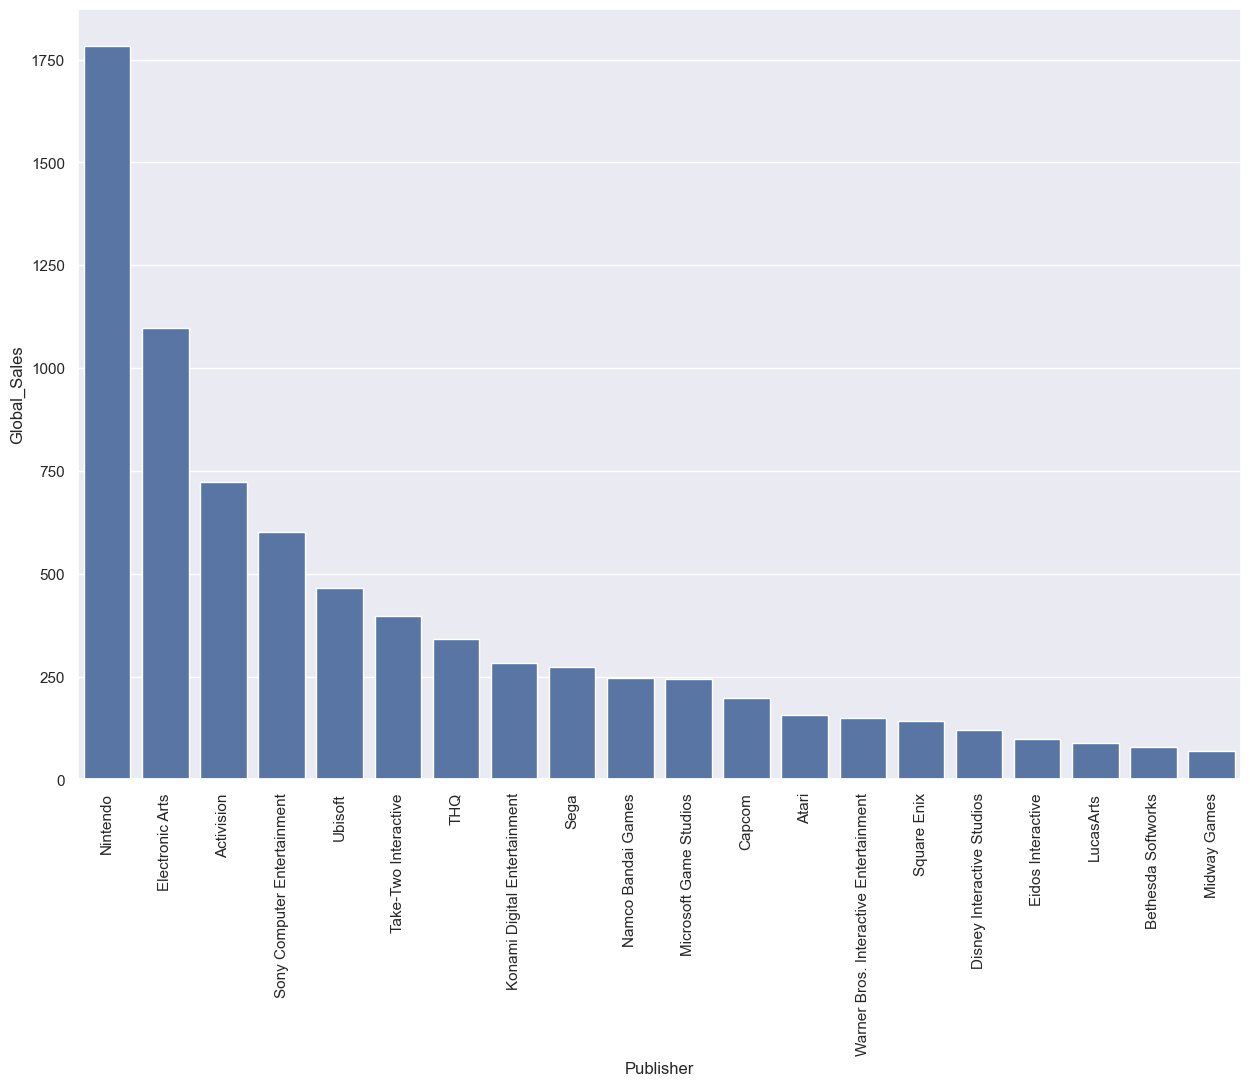

In [43]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

Nintendo surprised me.

## Comparison of the Publishers

In [44]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0  Nintendo     41.49     29.02      3.77         8.46         82.74
1  Nintendo     29.08      3.58      6.81         0.77         40.24
2  Nintendo     15.85     12.88      3.79         3.31         35.82
3  Nintendo     15.75     11.01      3.28         2.96         33.00
4  Nintendo     11.27      8.89     10.22         1.00         31.37

In [45]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

In [46]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

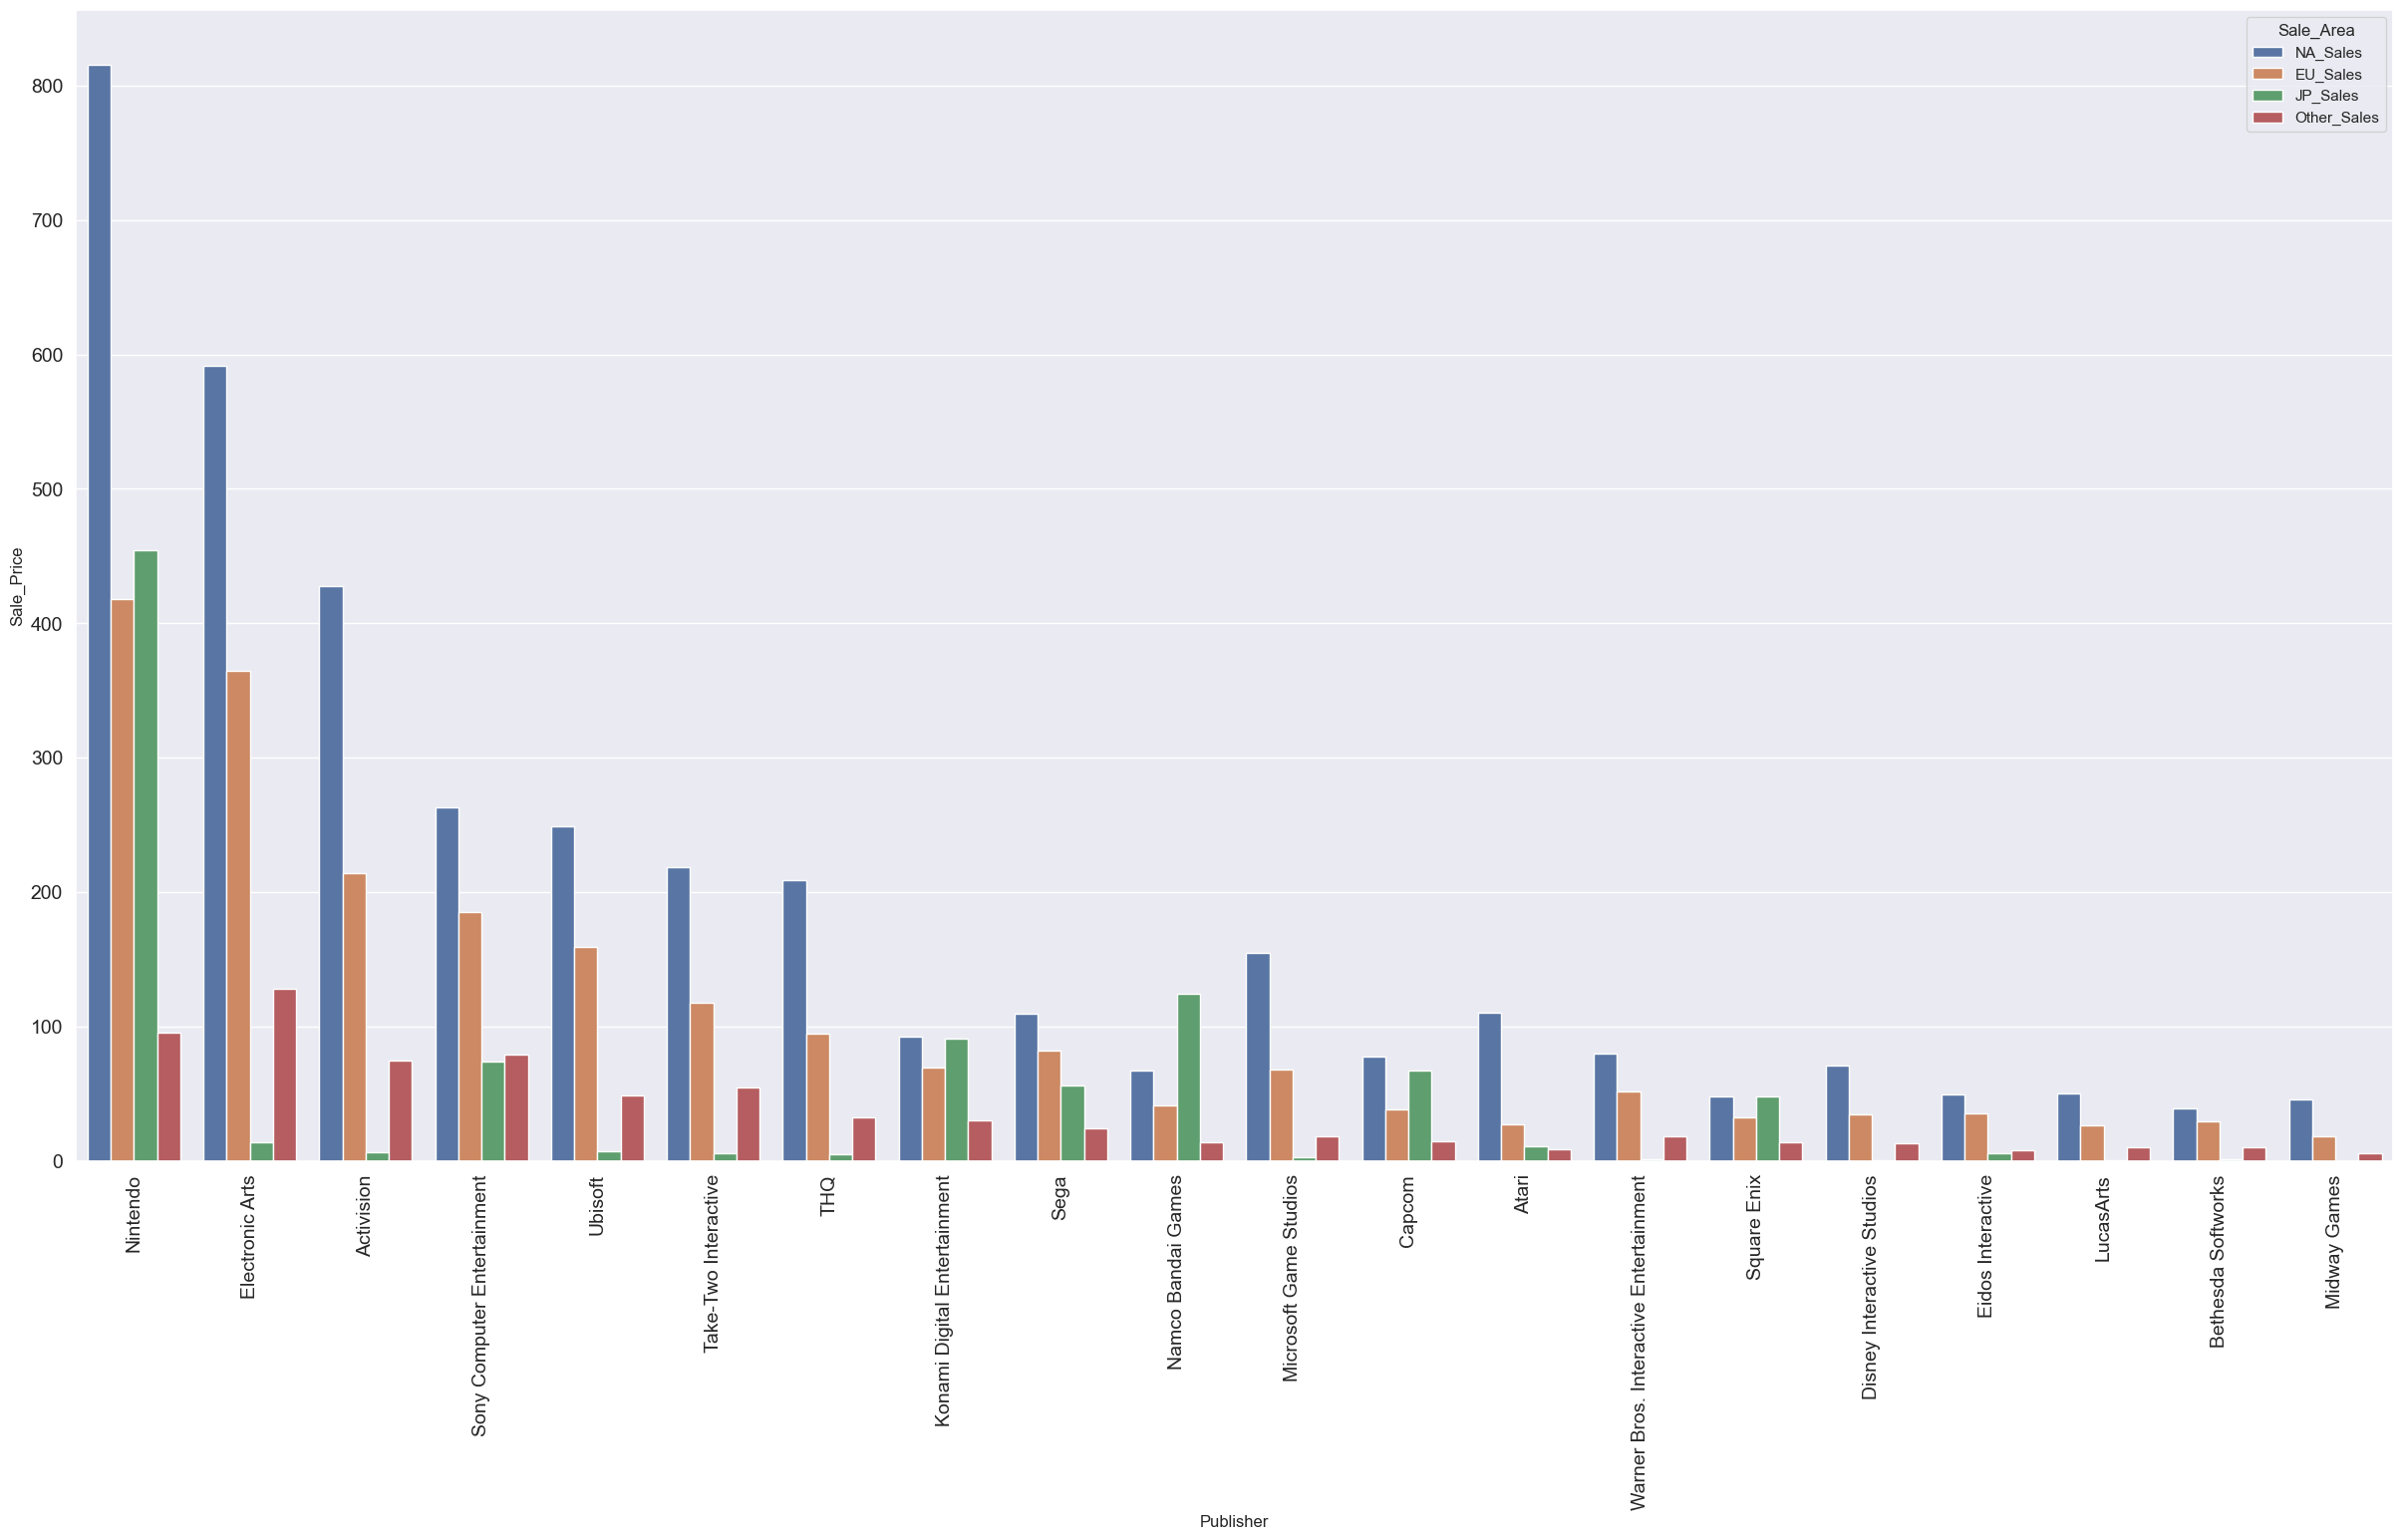

In [47]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

## Top Publisher of each year by Count 

In [48]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
publisher= top_publisher_count['Publisher']

C:\Users\Dell\AppData\Local\Temp\ipykernel_4044\2044274586.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']


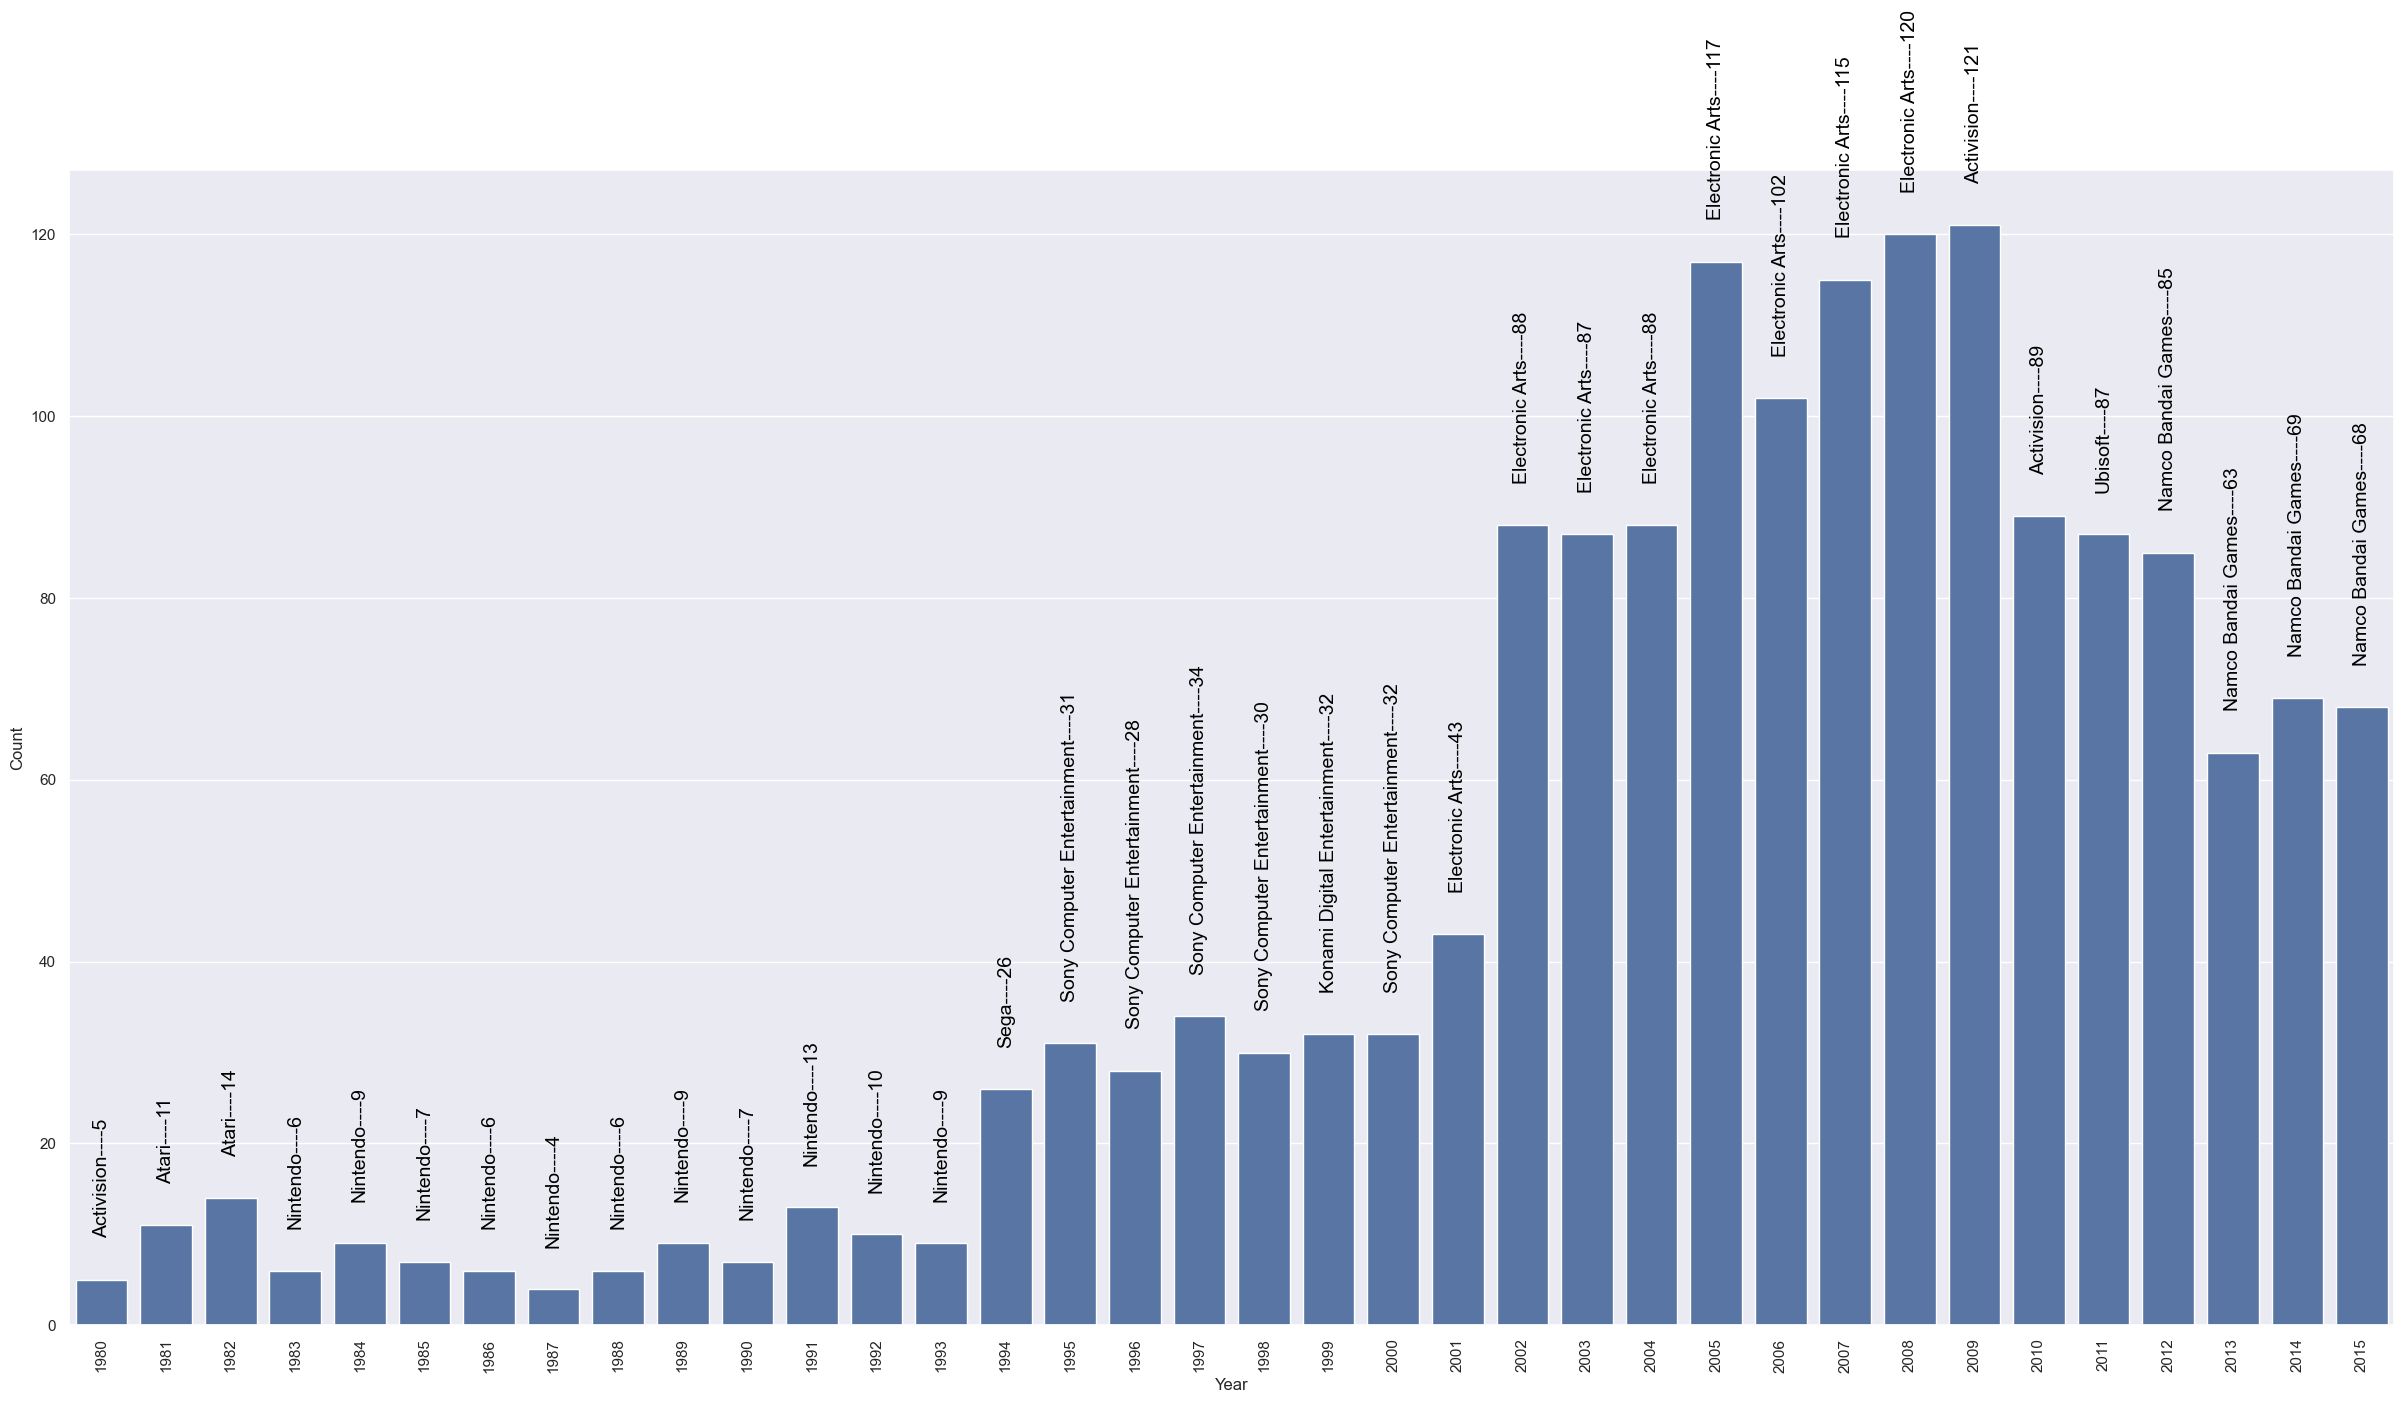

In [49]:

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

## Total revenue by region

In [50]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

region     sale
0     NA_Sales  4370.02
1     EU_Sales  2407.37
2     JP_Sales  1277.27
3  Other_Sales   789.98

<Axes: xlabel='region', ylabel='sale'>

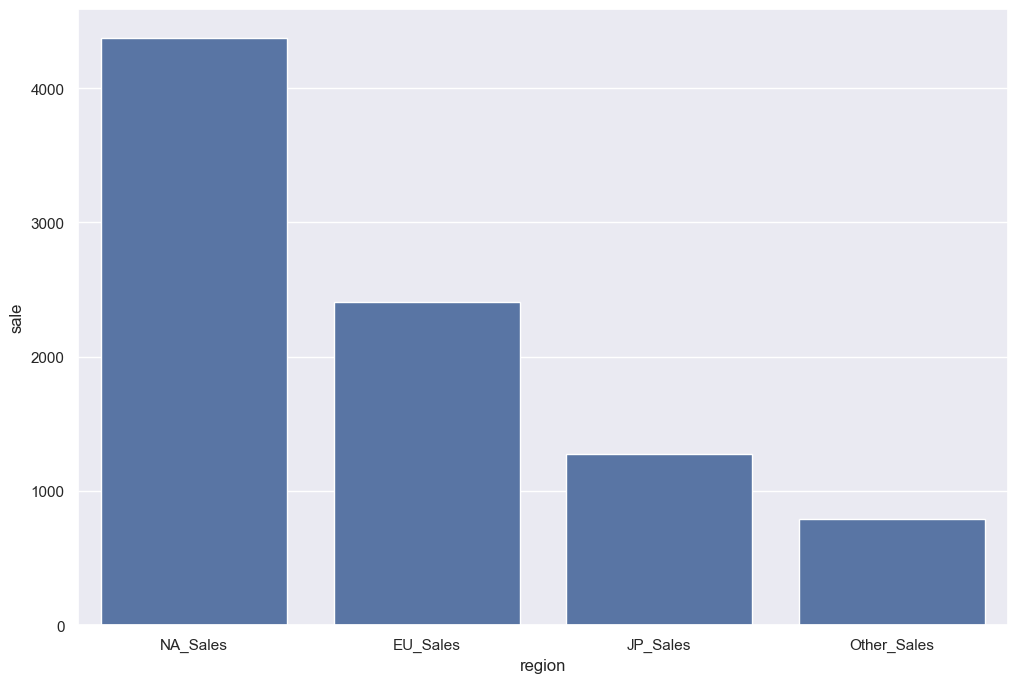

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x25708547f80>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

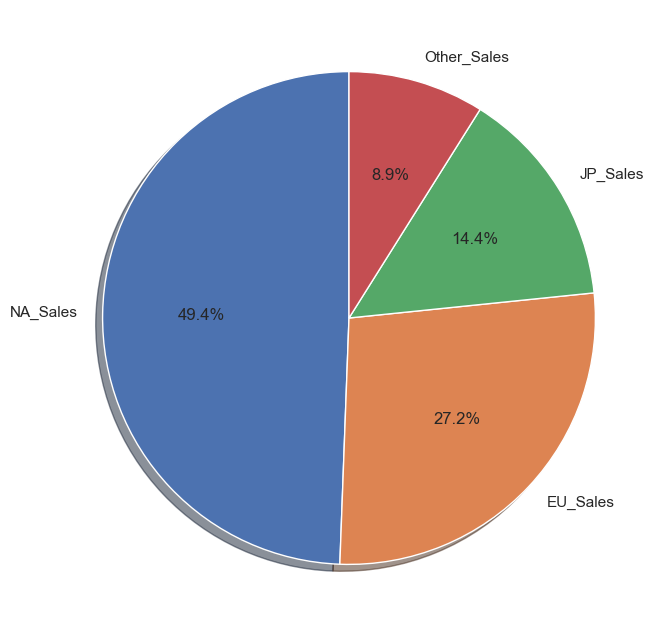

In [52]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

## Sales Histogram

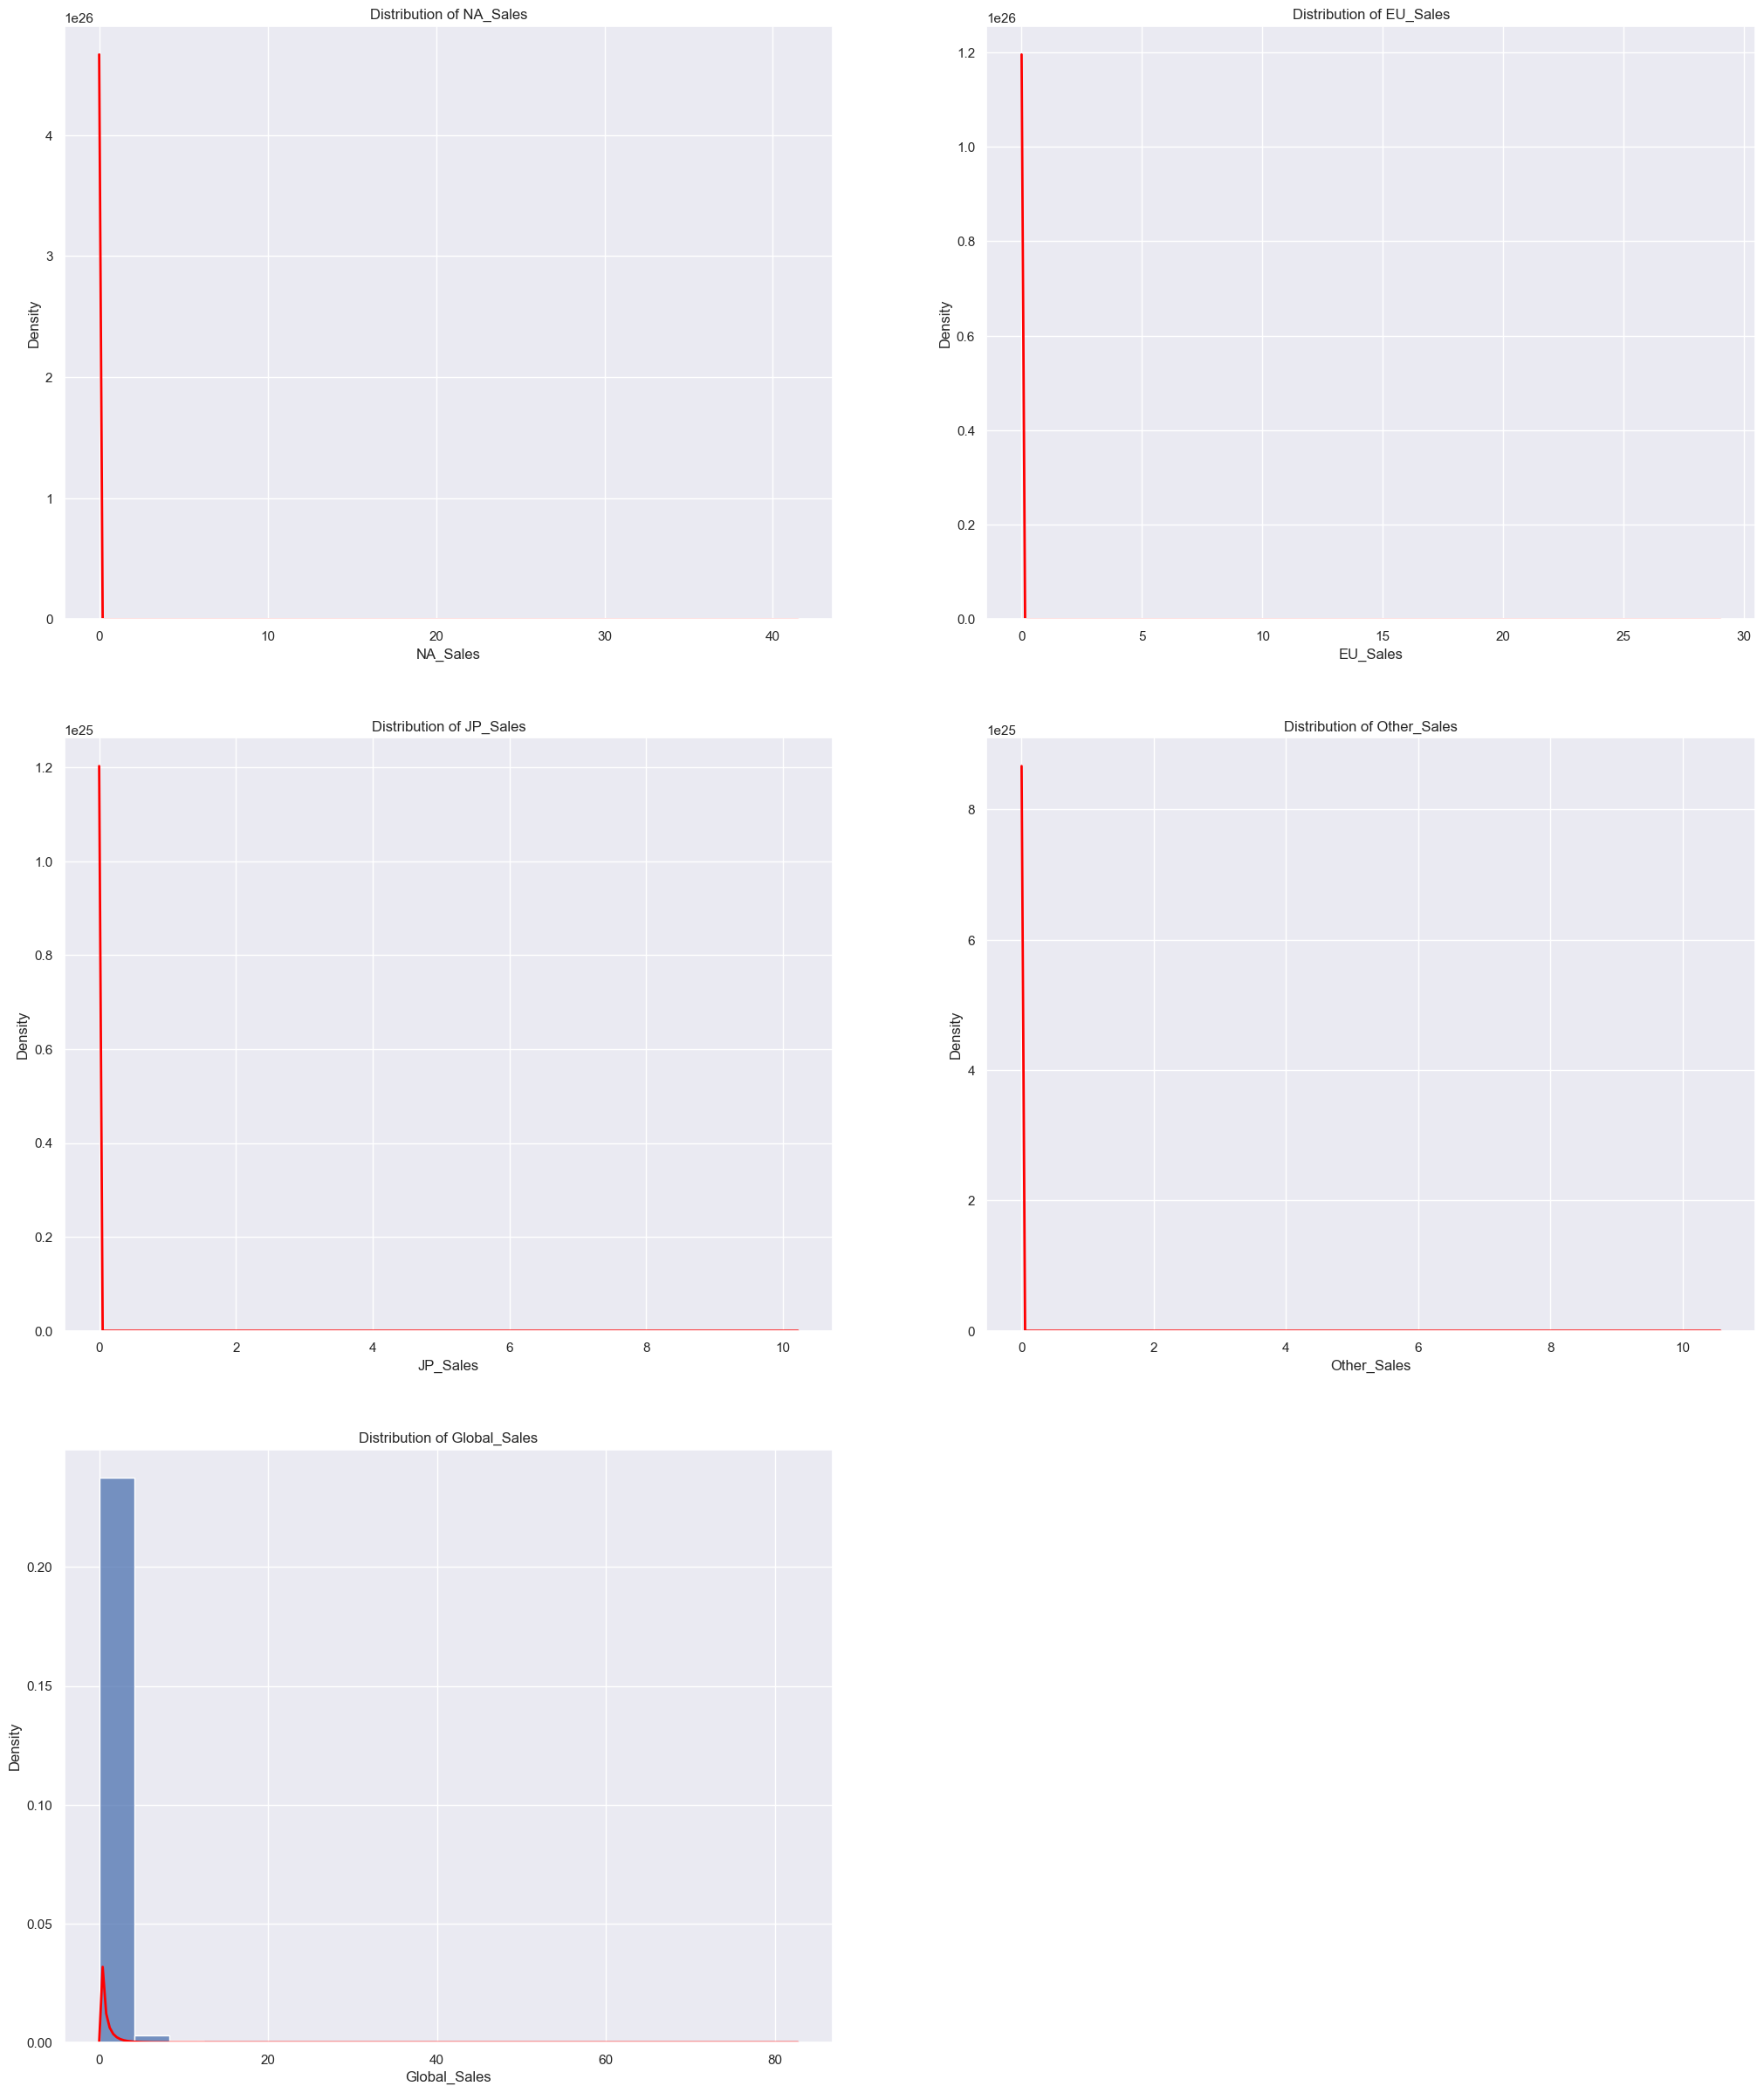

In [53]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], bins=20, kde=False, stat='density')

    # Fit a gamma distribution
    gamma_params = stats.gamma.fit(data[column].dropna())
    x = np.linspace(0, data[column].max(), 200)
    y = stats.gamma.pdf(x, *gamma_params)
    plt.plot(x, y, color='red', linewidth=2)

    plt.title(f"Distribution of {column}")


In [54]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006      Wii        Sports     41.49     29.02         8.46
1      1985      NES      Platform     29.08      3.58         0.77
2      2008      Wii        Racing     15.85     12.88         3.31
3      2009      Wii        Sports     15.75     11.01         2.96
4      1996       GB  Role-Playing     11.27      8.89         1.00
...     ...      ...           ...       ...       ...          ...
16593  2002      GBA      Platform      0.01      0.00         0.00
16594  2003       GC       Shooter      0.01      0.00         0.00
16595  2008      PS2        Racing      0.00      0.00         0.00
16596  2010       DS        Puzzle      0.00      0.01         0.00
16597  2003      GBA      Platform      0.01      0.00         0.00

[16250 rows x 6 columns]

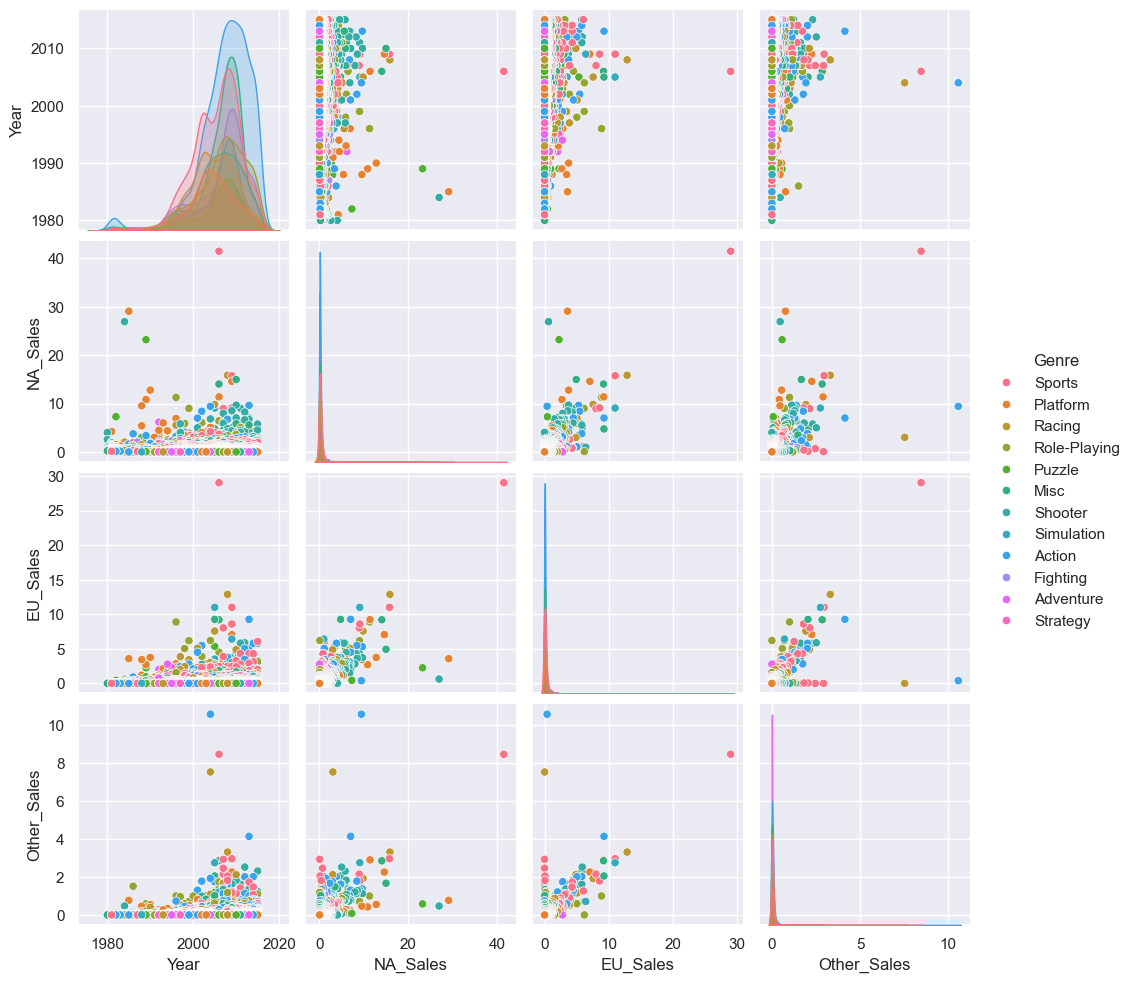

In [55]:
sns.pairplot(data_pair, hue='Genre')

In [56]:
data_pair_log = data_pair.copy()
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]
data_pair_log

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006      Wii        Sports     41.49     29.02         8.46
1      1985      NES      Platform     29.08      3.58         0.77
2      2008      Wii        Racing     15.85     12.88         3.31
3      2009      Wii        Sports     15.75     11.01         2.96
4      1996       GB  Role-Playing     11.27      8.89         1.00
...     ...      ...           ...       ...       ...          ...
14071  1998       PC  Role-Playing      0.01      0.02         0.01
14183  2014      PS3        Racing      0.02      0.01         0.01
14185  2011       PC        Puzzle      0.01      0.02         0.01
14267  2007       PC        Puzzle      0.01      0.02         0.01
14299  2009       PC      Strategy      0.01      0.02         0.01

[7893 rows x 6 columns]

In [57]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales'])
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales'])
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales'])

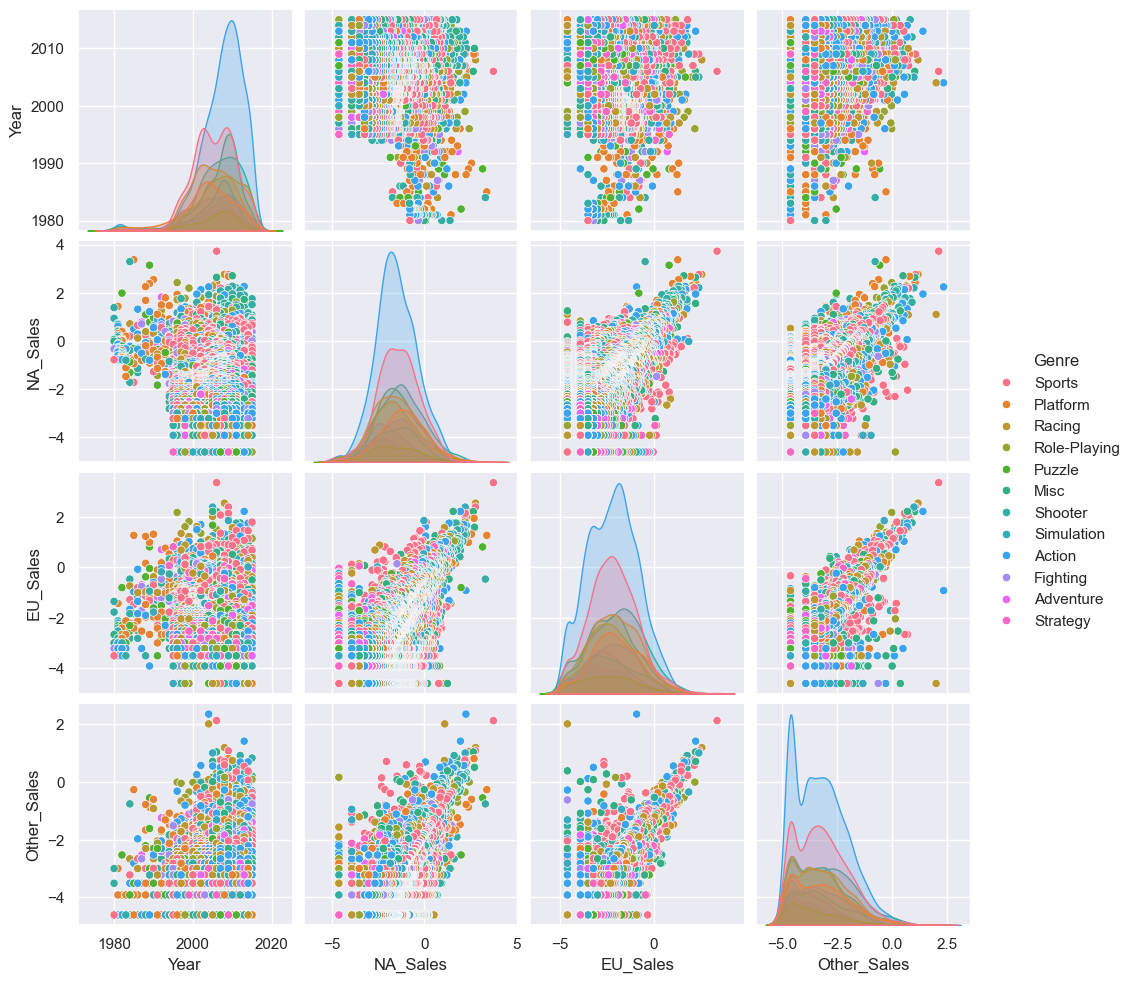

In [58]:
sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

Electronic Arts Detailed Analysis



In [60]:
ea_data = data[data["Publisher"]=="Electronic Arts"]
ea_data.head(10)

Rank                          Name Platform  Year       Genre  \
77     78                       FIFA 16      PS4  2015      Sports   
82     83                FIFA Soccer 13      PS3  2012      Action   
83     84                    The Sims 3       PC  2009  Simulation   
92     93  Star Wars Battlefront (2015)      PS4  2015     Shooter   
99    100                 Battlefield 3     X360  2011     Shooter   
103   104                 Battlefield 3      PS3  2011     Shooter   
104   105    Need for Speed Underground      PS2  2003      Racing   
112   113                       FIFA 14      PS3  2013      Sports   
113   114  Need for Speed Underground 2      PS2  2004      Racing   
114   115     Medal of Honor: Frontline      PS2  2002     Shooter   

           Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
77   Electronic Arts      1.11      6.06      0.06         1.26          8.49  
82   Electronic Arts      1.06      5.05      0.13         2.01          8.24  
83   Electronic Arts      0.98      6.42      0.00         0.71          8.11  
92   Electronic Arts      2.93      3.29      0.22         1.23          7.67  
99   Electronic Arts      4.46      2.13      0.06         0.69          7.34  
103  Electronic Arts      2.85      2.93      0.35         1.10          7.23  
104  Electronic Arts      3.27      2.83      0.08         1.02          7.20  
112  Electronic Arts      0.78      4.32      0.07         1.73          6.90  
113  Electronic Arts      2.71      3.02      0.08         1.09          6.90  
114  Electronic Arts      2.93      2.75      0.17         0.99          6.83

## Top 5 games of each genre

In [64]:
top_genres = data["Genre"].value_counts().head(7)
top_genres.index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing'],
      dtype='object', name='Genre')

In [74]:
for genre in top_genres.index:
    a_genre = data[data["Genre"]==genre][["Name","Year","Platform","Global_Sales"]]
    print(f"{genre}\n-----------------------------")
    print(a_genre.head(10))

Action
-----------------------------
                                    Name  Year Platform  Global_Sales
16                    Grand Theft Auto V  2013      PS3         21.40
17         Grand Theft Auto: San Andreas  2004      PS2         20.81
23                    Grand Theft Auto V  2013     X360         16.38
24           Grand Theft Auto: Vice City  2002      PS2         16.15
38                  Grand Theft Auto III  2001      PS2         13.10
44                    Grand Theft Auto V  2014      PS4         11.98
45  Pokemon HeartGold/Pokemon SoulSilver  2009       DS         11.90
51                   Grand Theft Auto IV  2008     X360         11.02
56                   Grand Theft Auto IV  2008      PS3         10.57
82                        FIFA Soccer 13  2012      PS3          8.24
Sports
-----------------------------
                                   Name  Year Platform  Global_Sales
0                            Wii Sports  2006      Wii         82.74
3                 


In action, GTA is dominating.

In sports, Wii and Fifa games are dominating.

In role playing, Pokemon is dominating.

In shooters, Duck hunt surprised me! But normally CoD series are dominating, which also impressed me a lot.

In racing, Mario surprised me!

It is interesting that, some games are sold very well in different platforms. We shall somehow merge them to see the other successful games.

In [ ]:
grouped_data = data.groupby(by=["Name","Genre","Year"]).agg({"Global_Sales":pd.Series.sum})
grouped_data = grouped_data.sort_values(by="Global_Sales", ascending=False).reset_index()
grouped_data

Name   Genre  Year  Global_Sales
2                      Grand Theft Auto V  Action  2013         37.78
21                    Grand Theft Auto IV  Action  2008         22.47
25          Grand Theft Auto: San Andreas  Action  2004         20.81
36                     Grand Theft Auto V  Action  2014         17.06
39                         FIFA Soccer 13  Action  2012         16.16
...                                   ...     ...   ...           ...
12129                      Carmageddon 64  Action  1999          0.01
12132                Grand Theft Auto III  Action  2002          0.01
12133  Paranormal Pursuit: The Gifted One  Action  2015          0.01
12141                               Trine  Action  2009          0.01
12144            Chokkan! Asonde Relaxuma  Action  2008          0.01

[2008 rows x 4 columns]

In [91]:
for genre in top_genres.index:
    new_genre = grouped_data[grouped_data["Genre"]==genre]
    print(f"{genre}\n-----------------------------")
    print(new_genre.head(10))

Action
-----------------------------
                                 Name   Genre  Year  Global_Sales
2                  Grand Theft Auto V  Action  2013         37.78
21                Grand Theft Auto IV  Action  2008         22.47
25      Grand Theft Auto: San Andreas  Action  2004         20.81
36                 Grand Theft Auto V  Action  2014         17.06
39                     FIFA Soccer 13  Action  2012         16.16
40        Grand Theft Auto: Vice City  Action  2002         16.15
43  LEGO Star Wars: The Complete Saga  Action  2007         15.75
51    Assassin's Creed IV: Black Flag  Action  2013         13.16
53               Assassin's Creed III  Action  2012         13.10
54               Grand Theft Auto III  Action  2001         13.10
Sports
-----------------------------
                 Name   Genre  Year  Global_Sales
0          Wii Sports  Sports  2006         82.74
4   Wii Sports Resort  Sports  2009         33.00
20            Wii Fit  Sports  2007         22.72


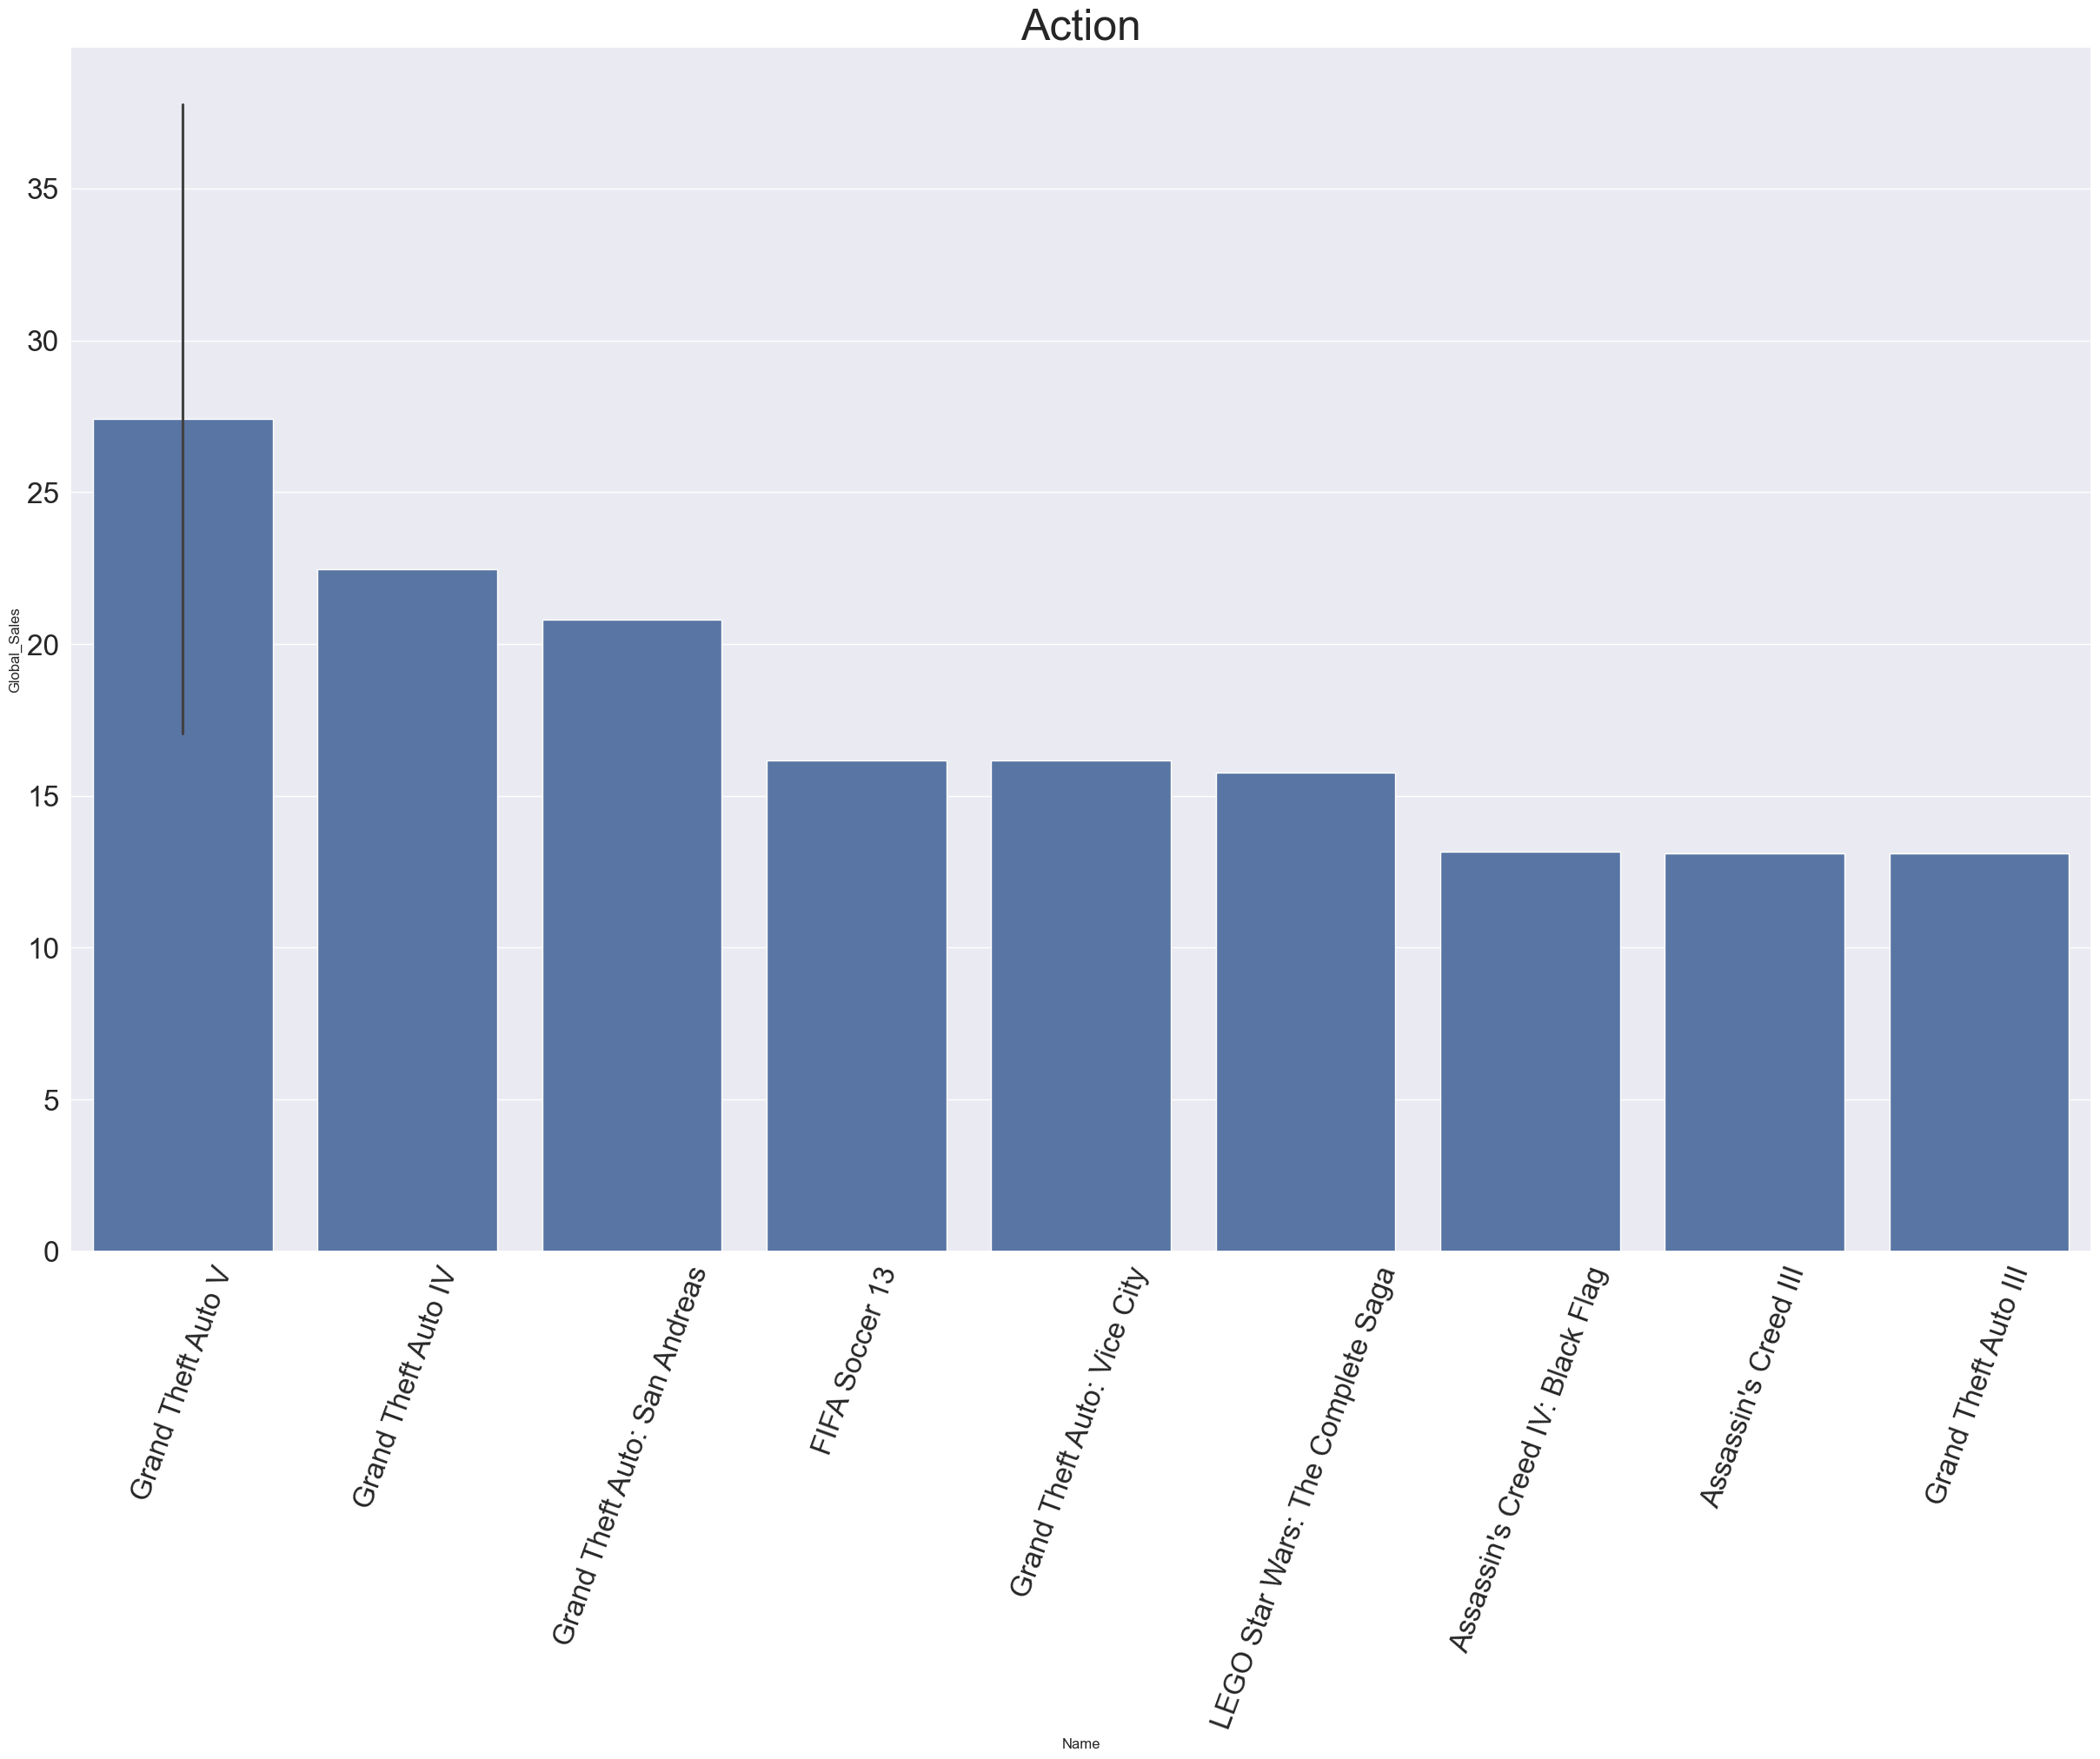

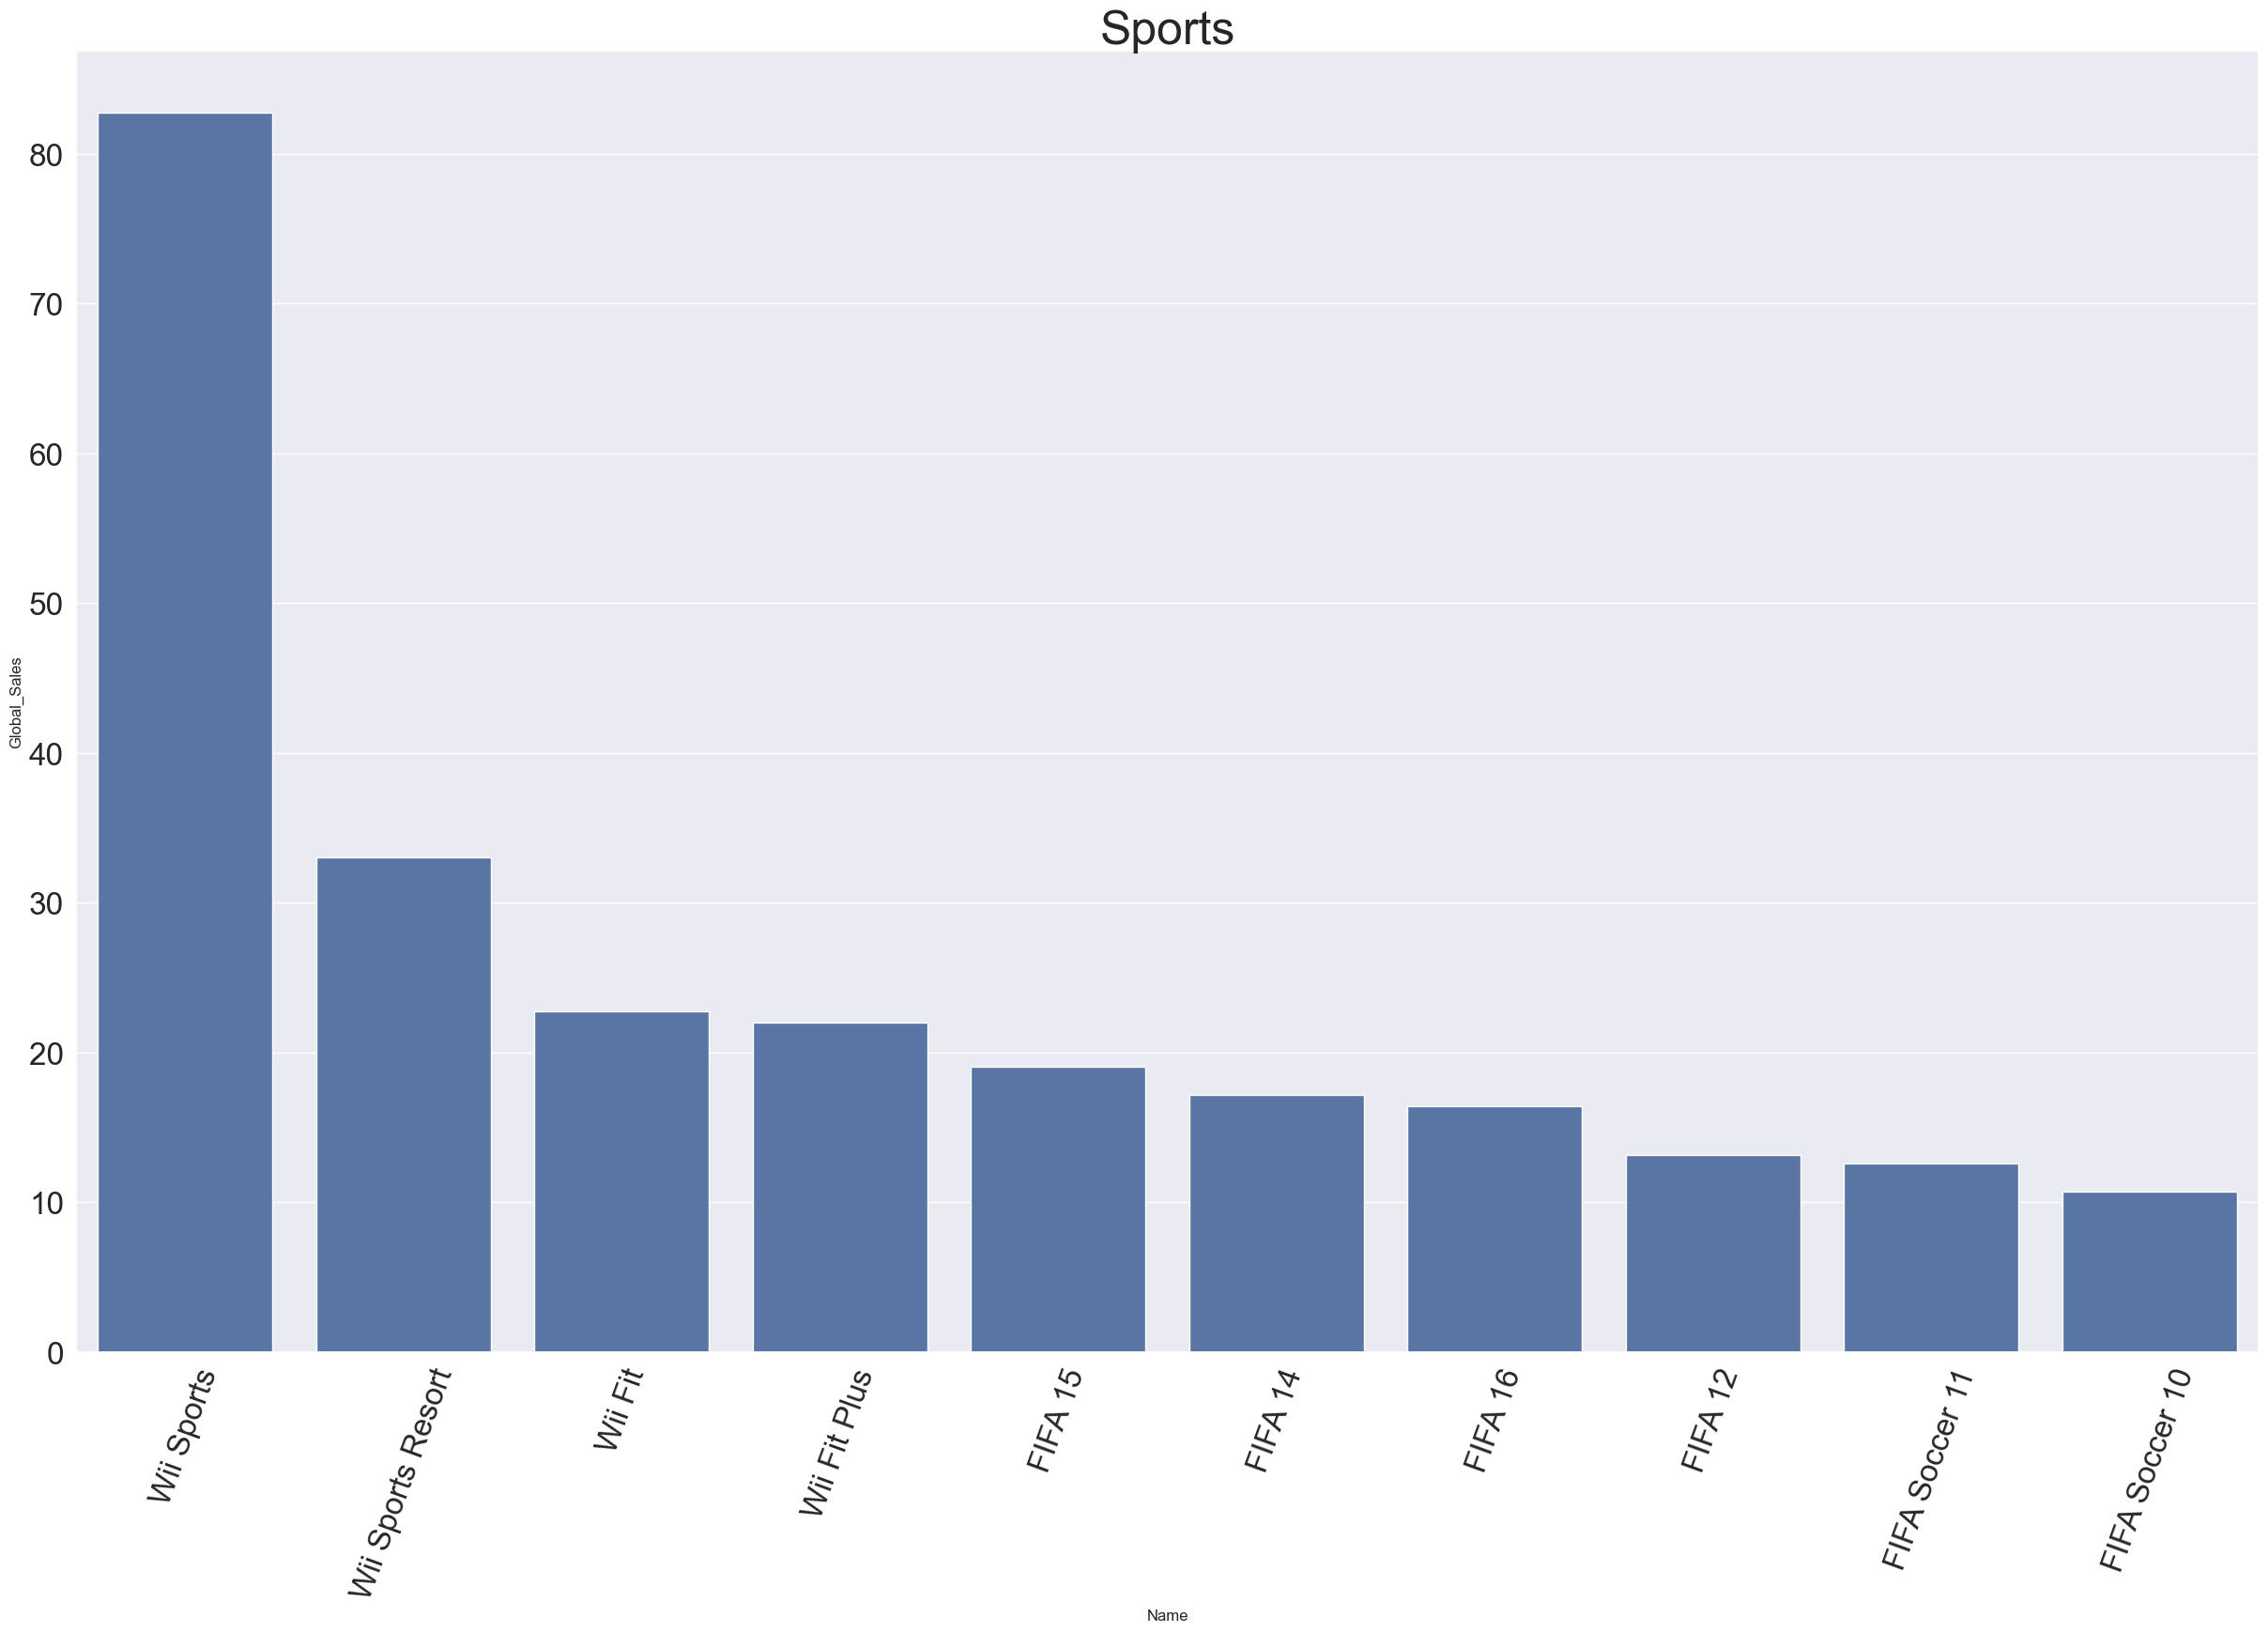

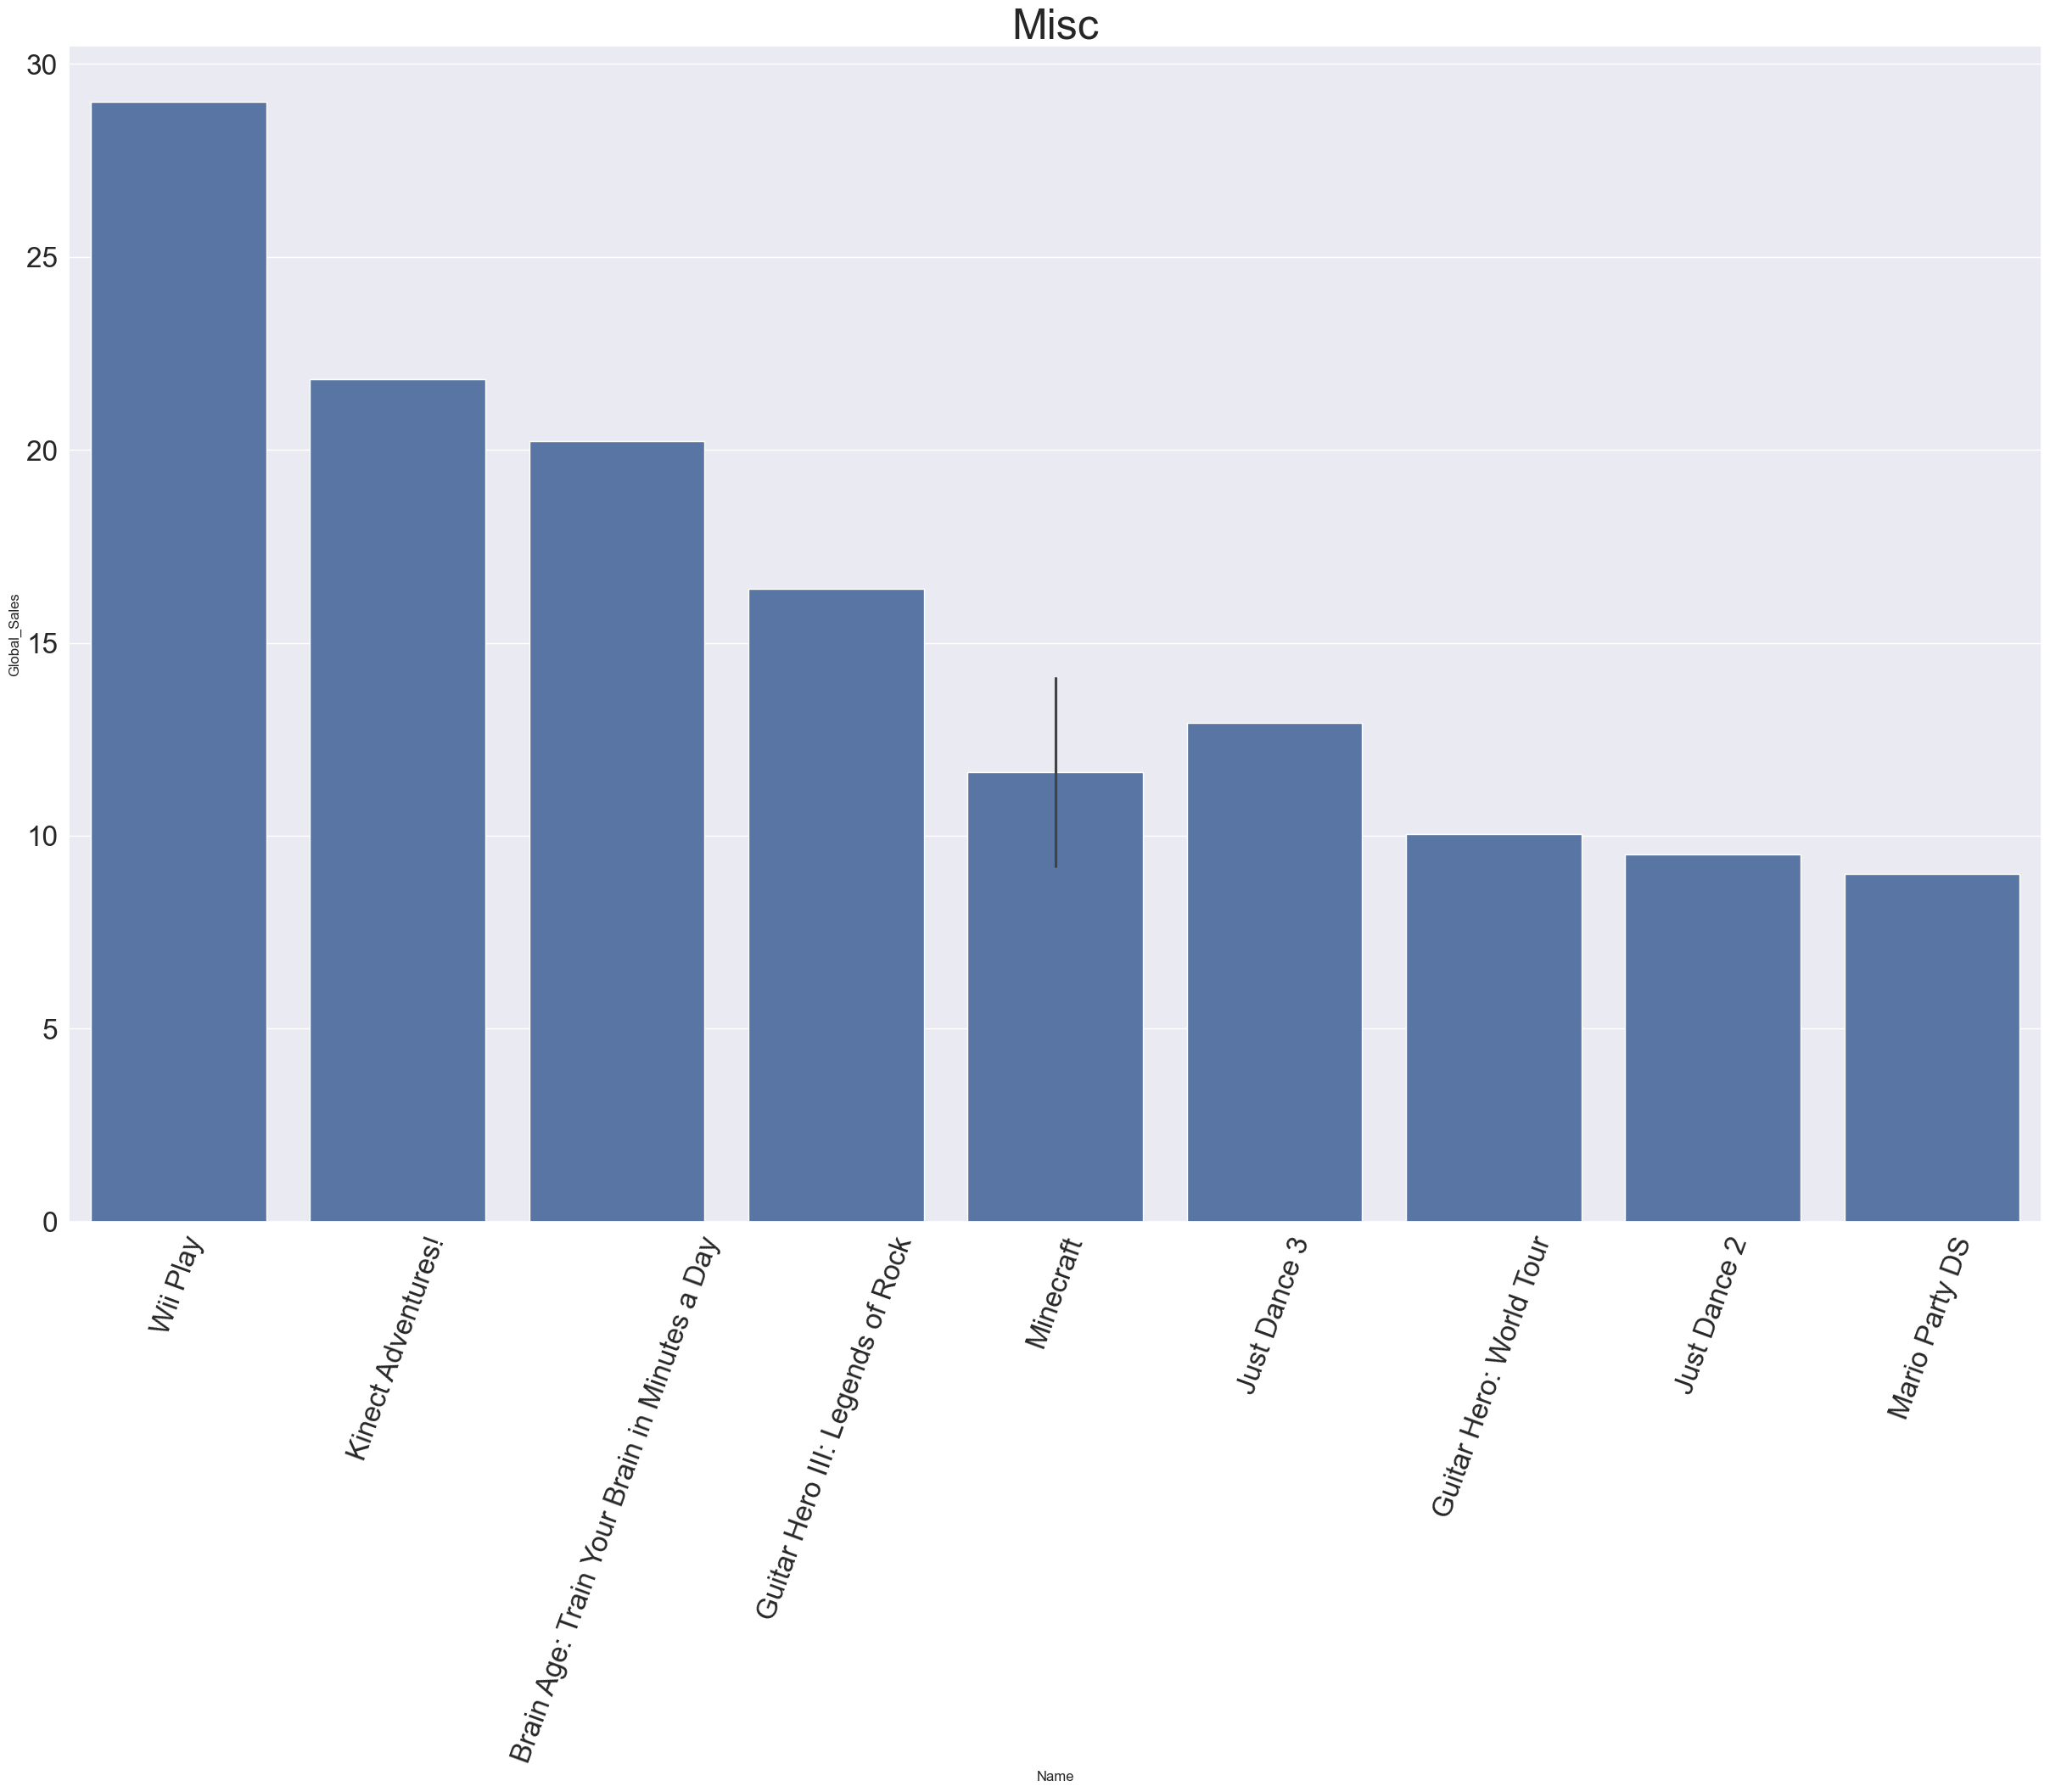

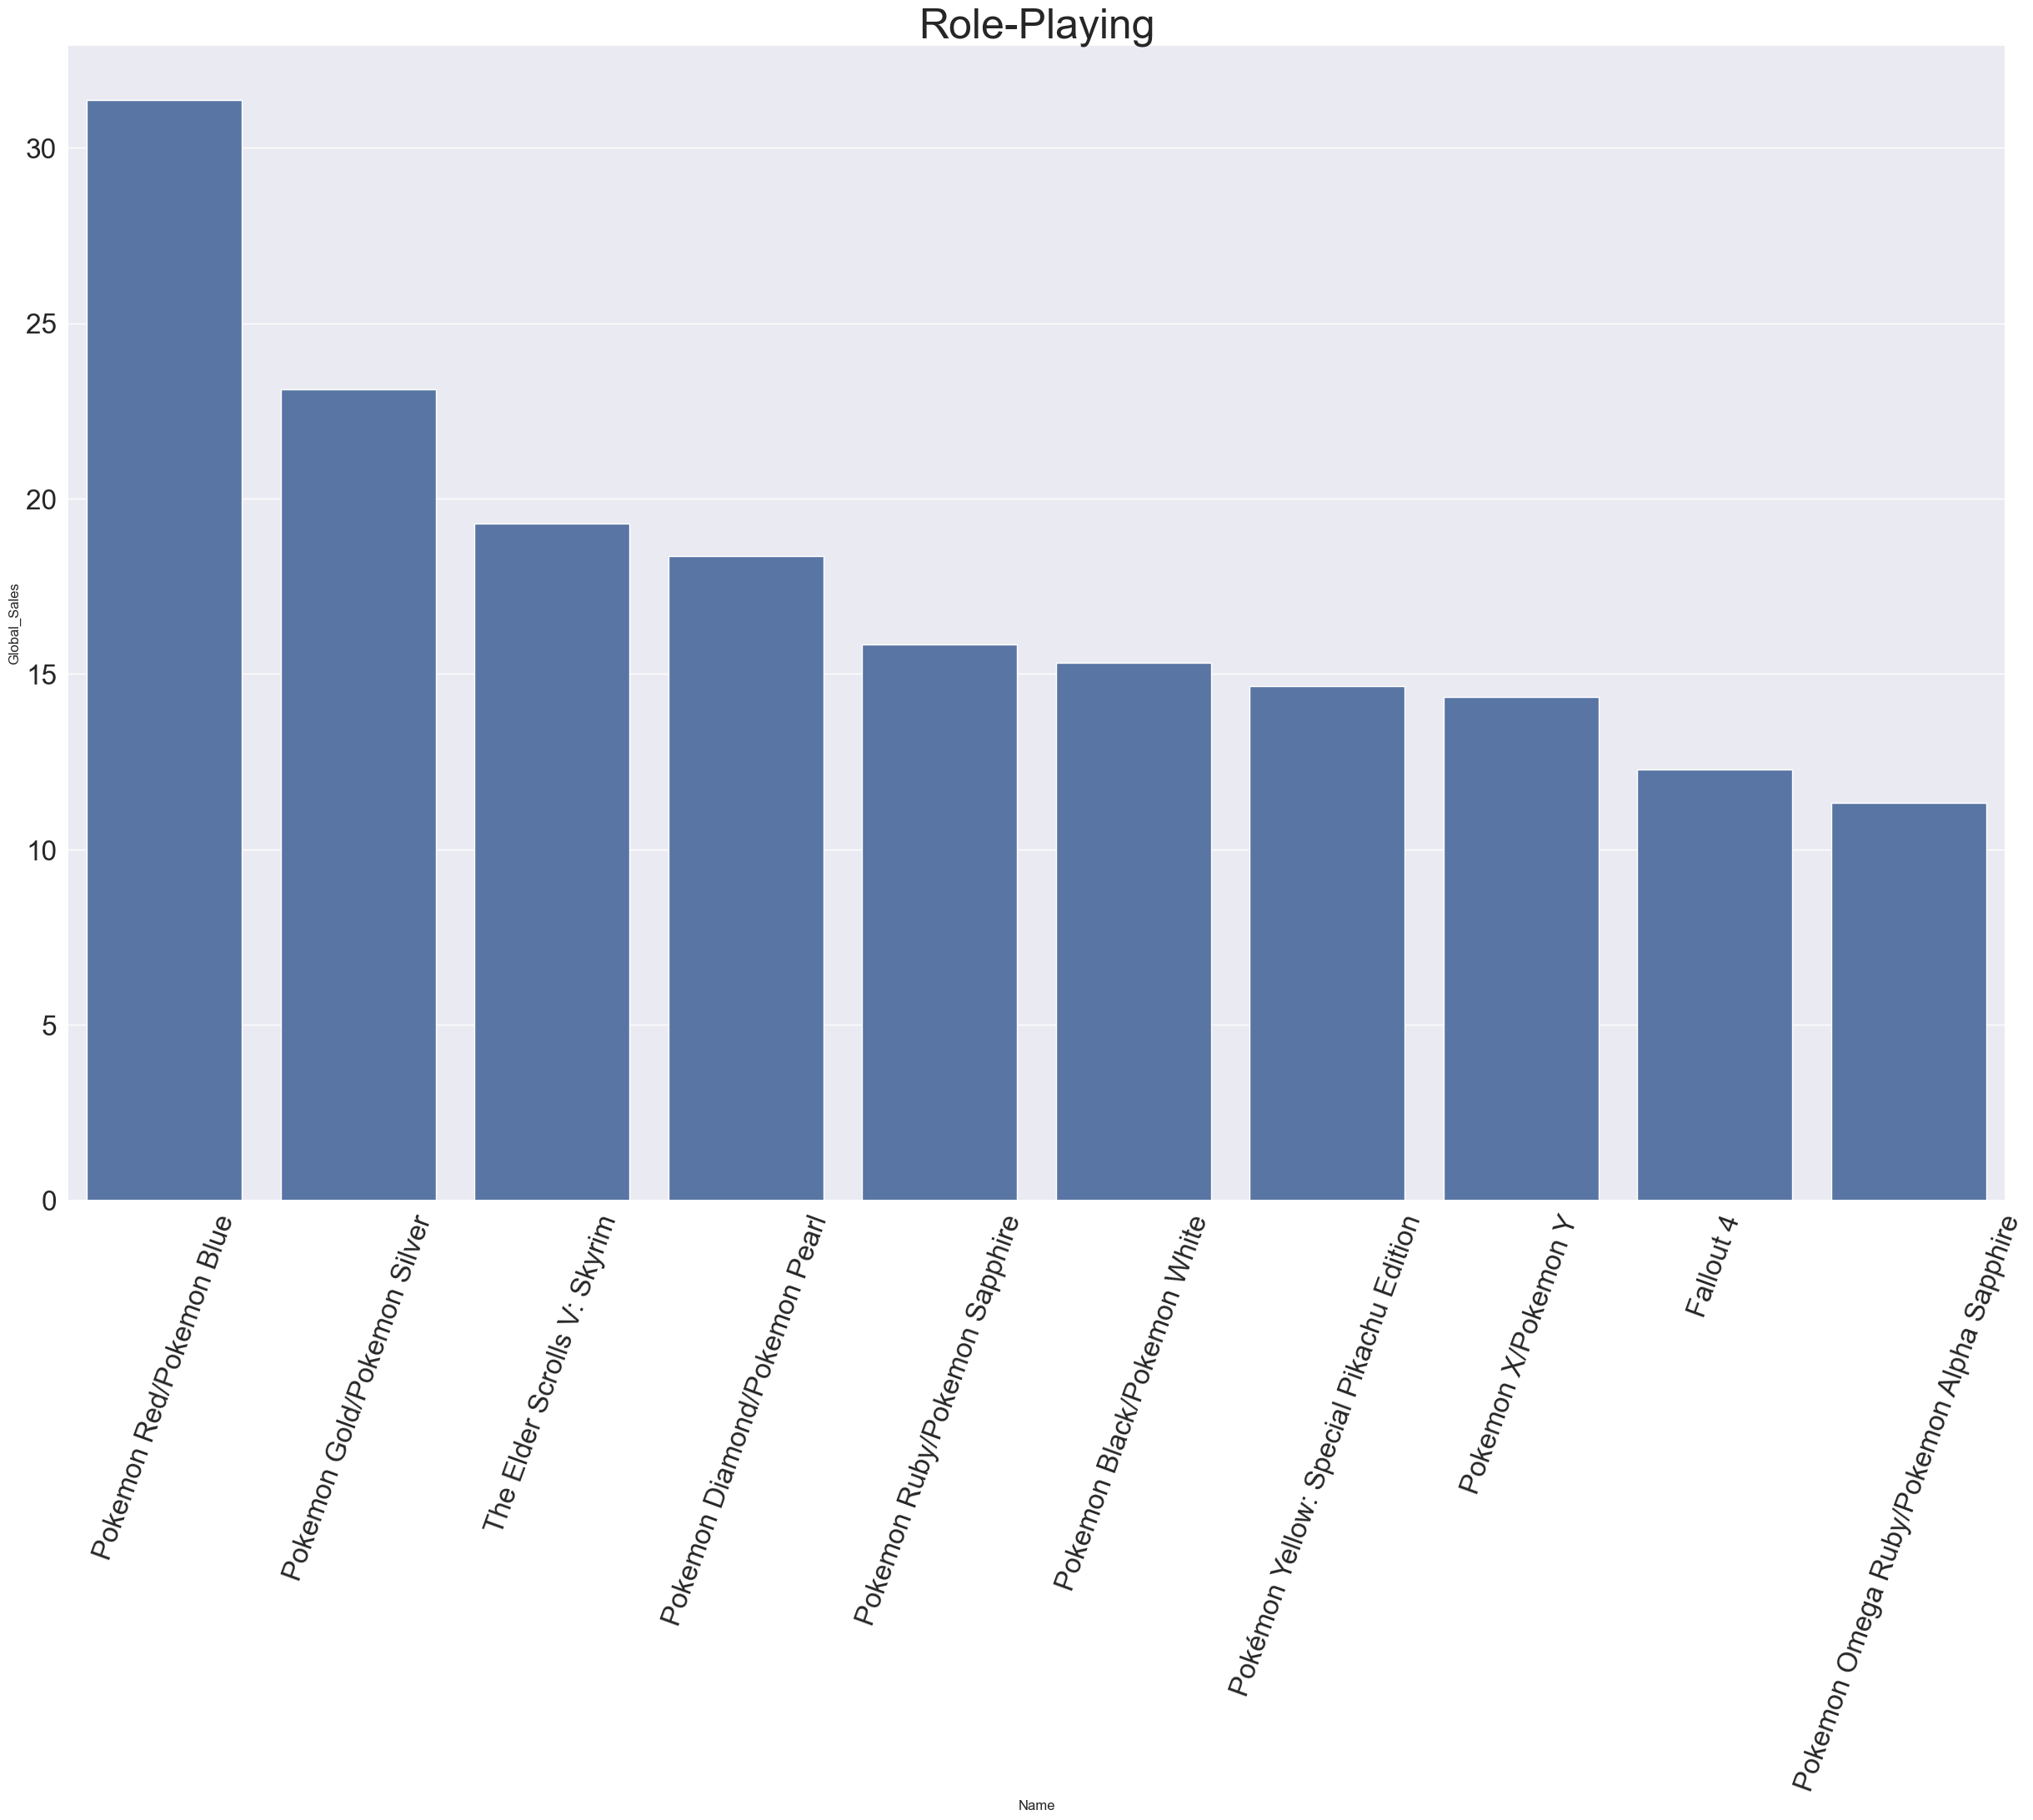

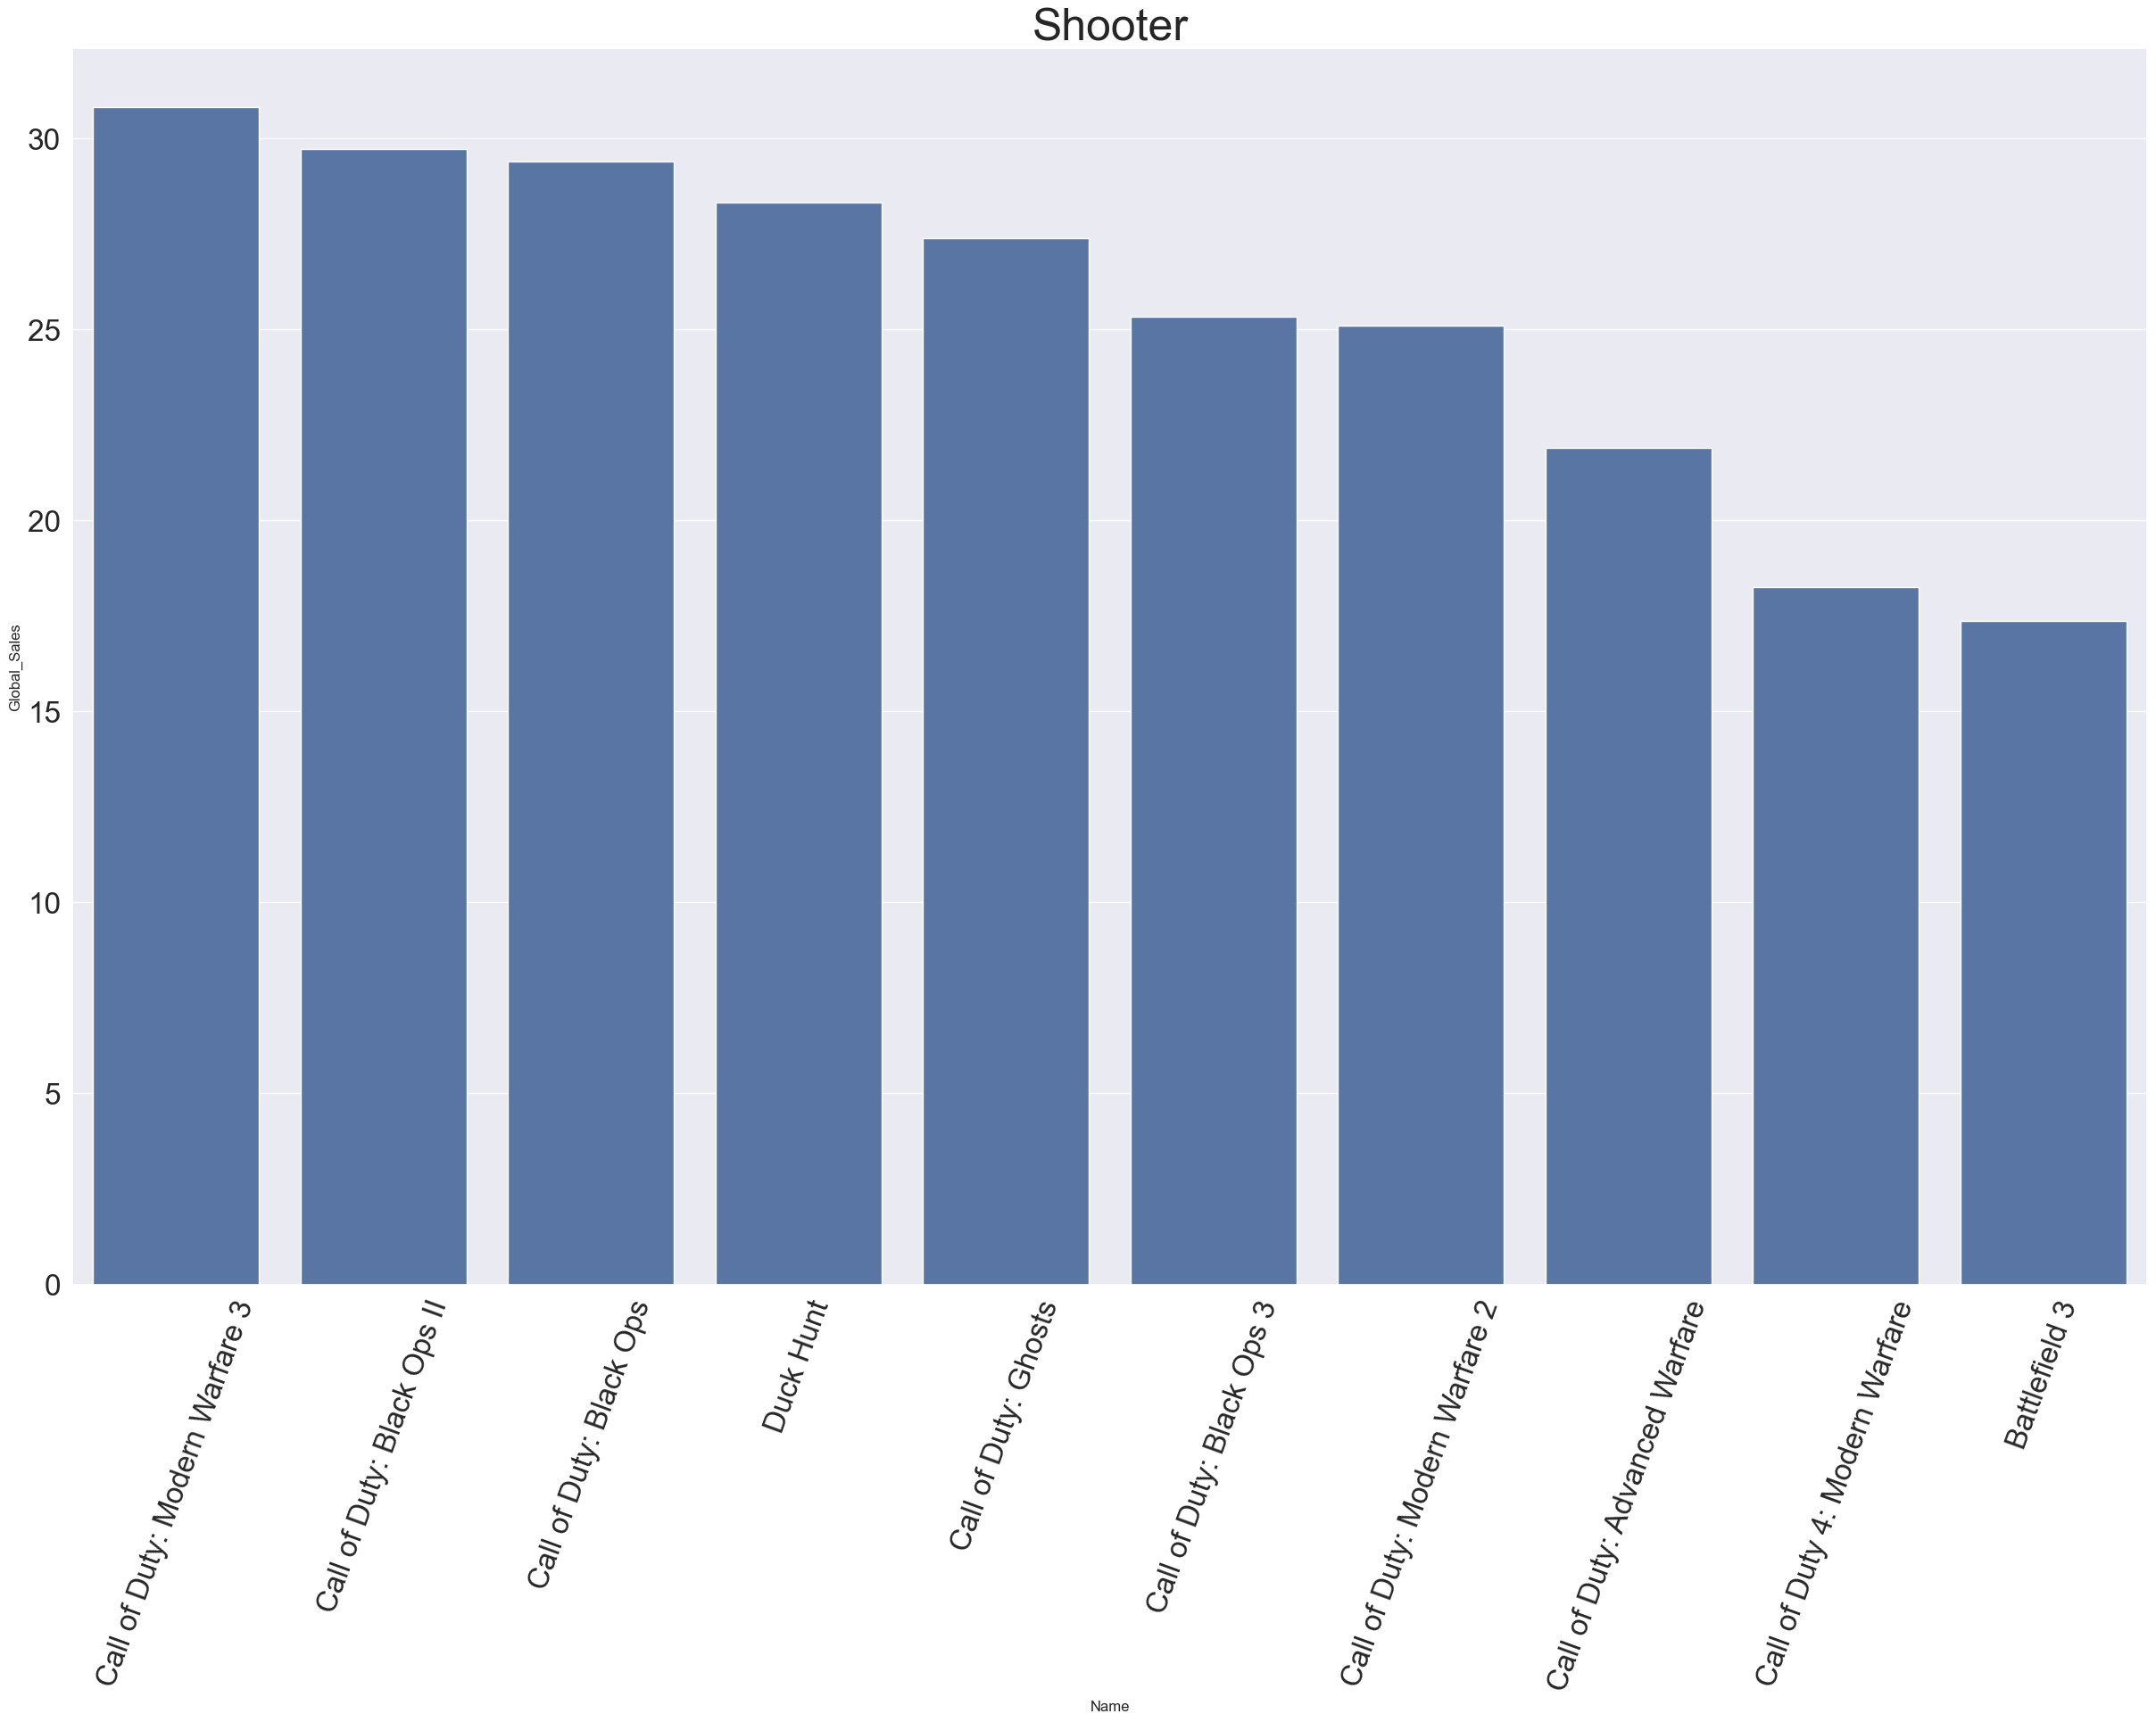

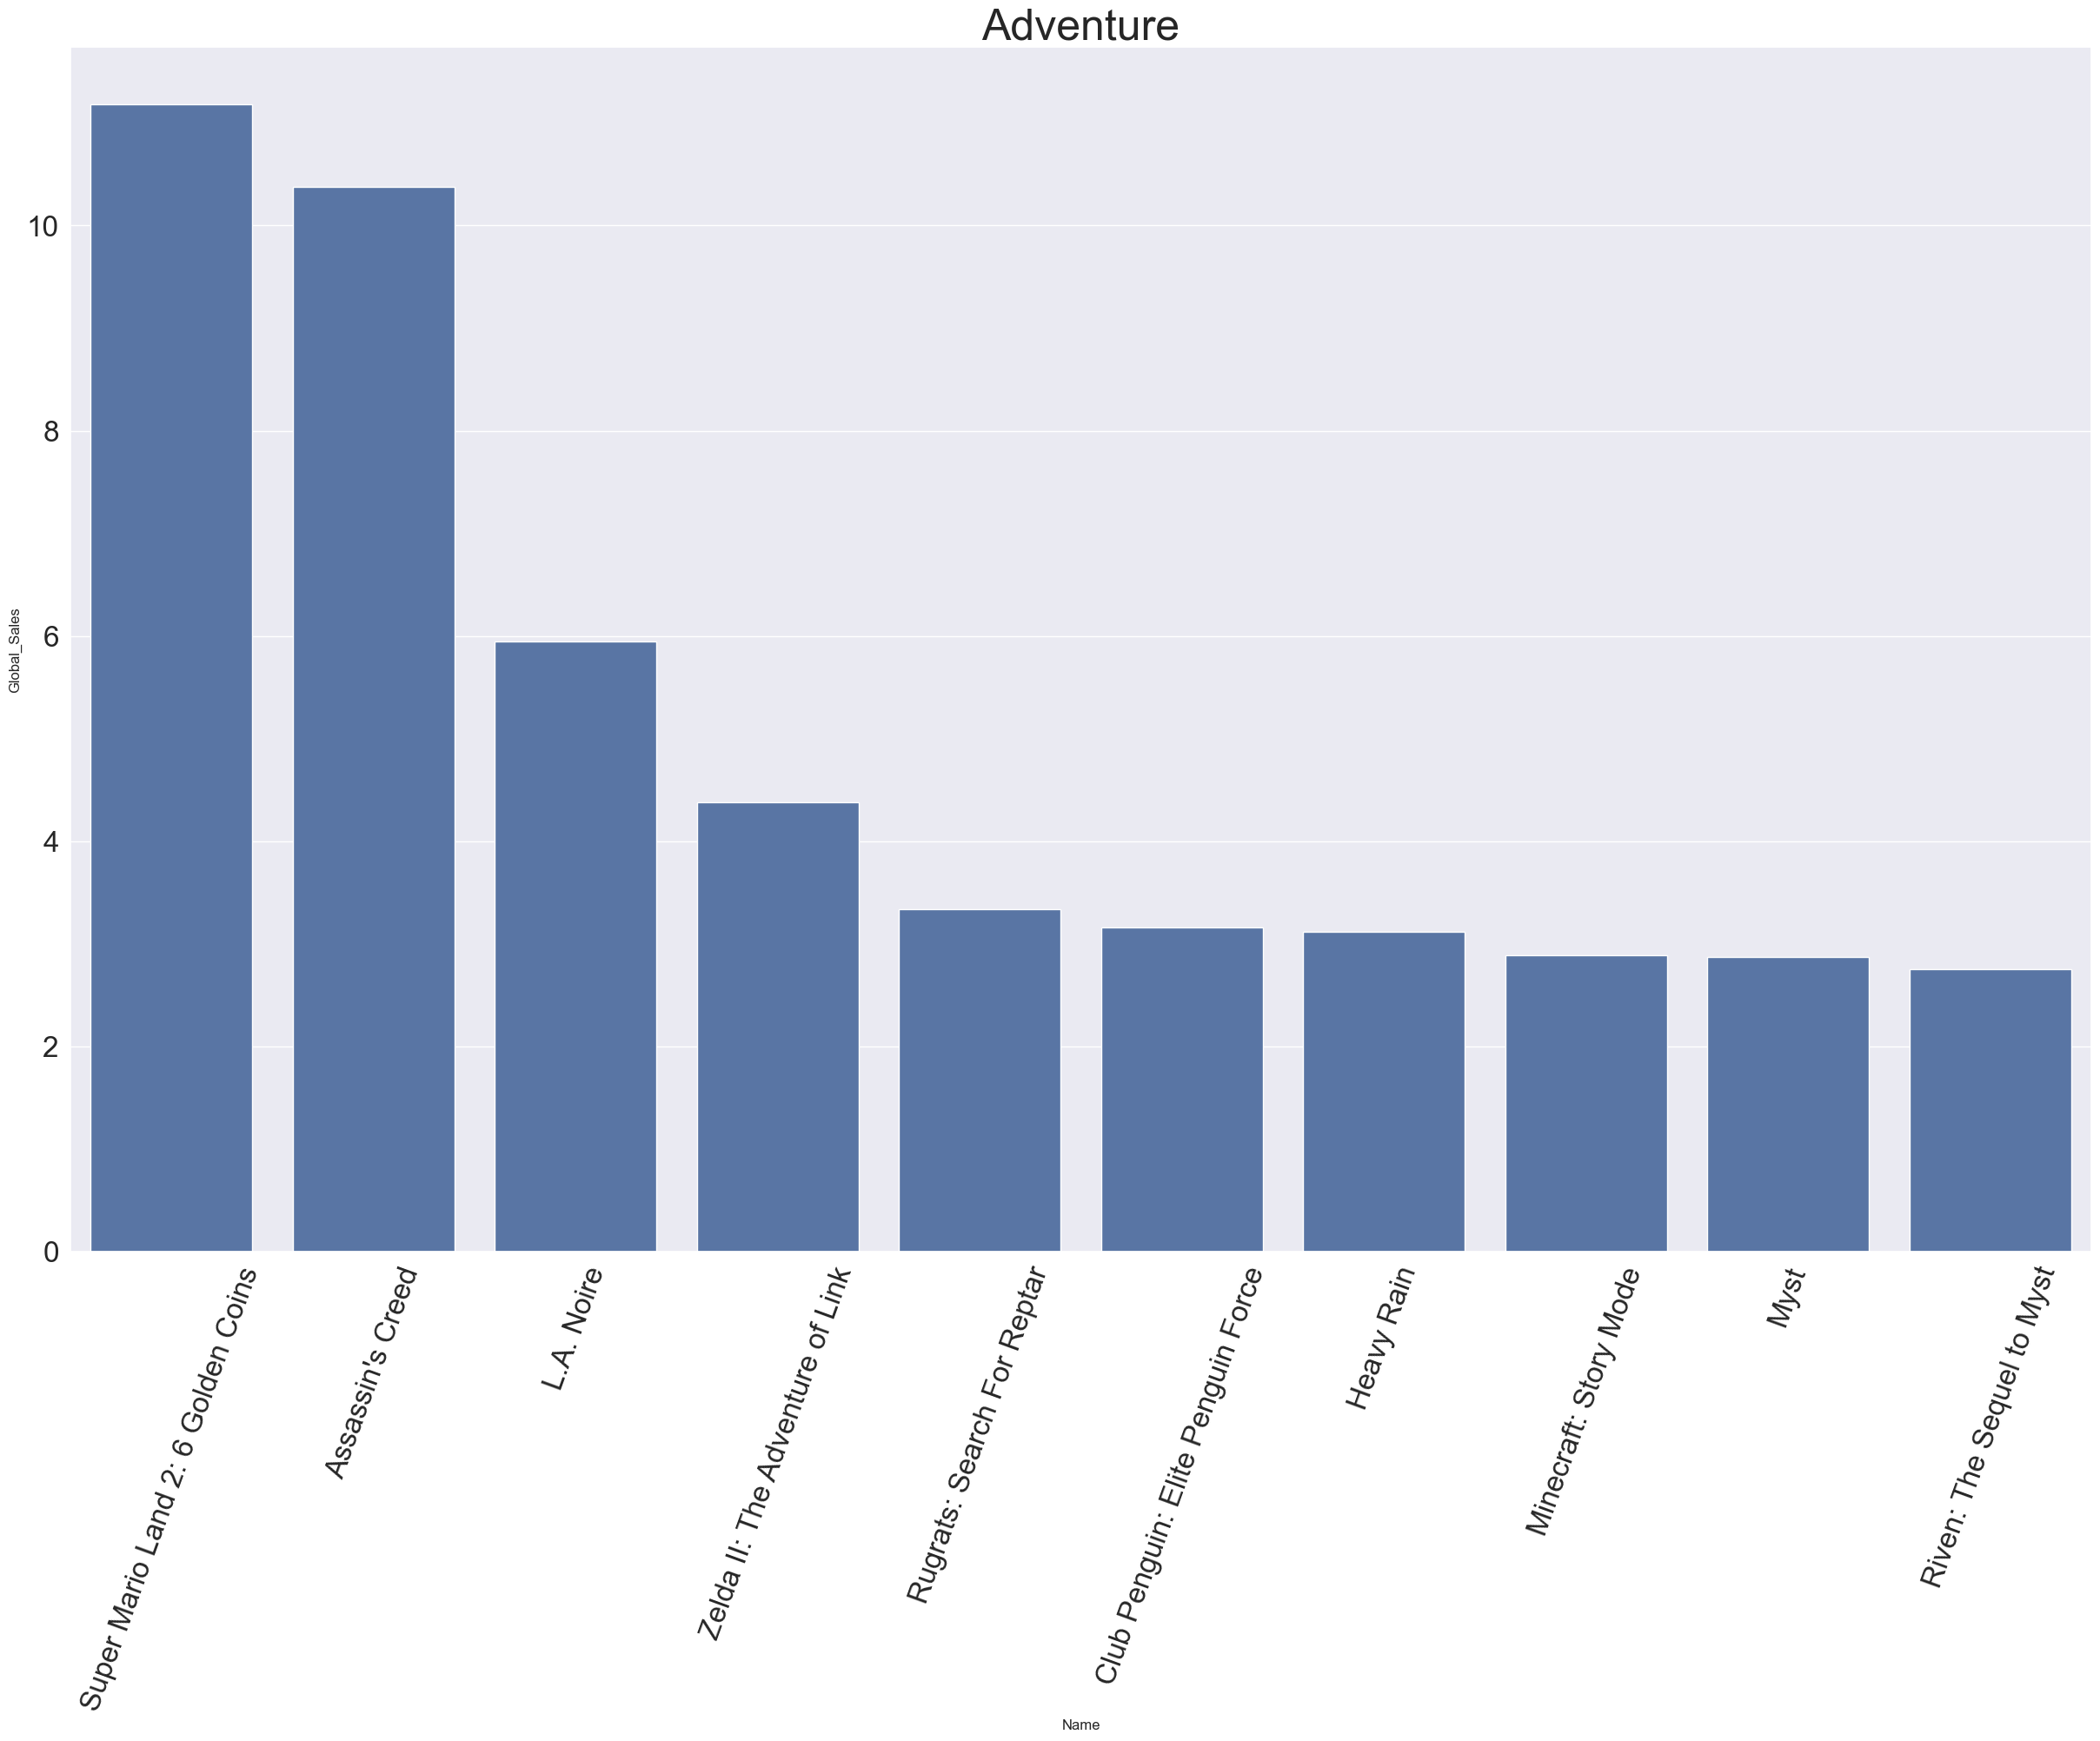

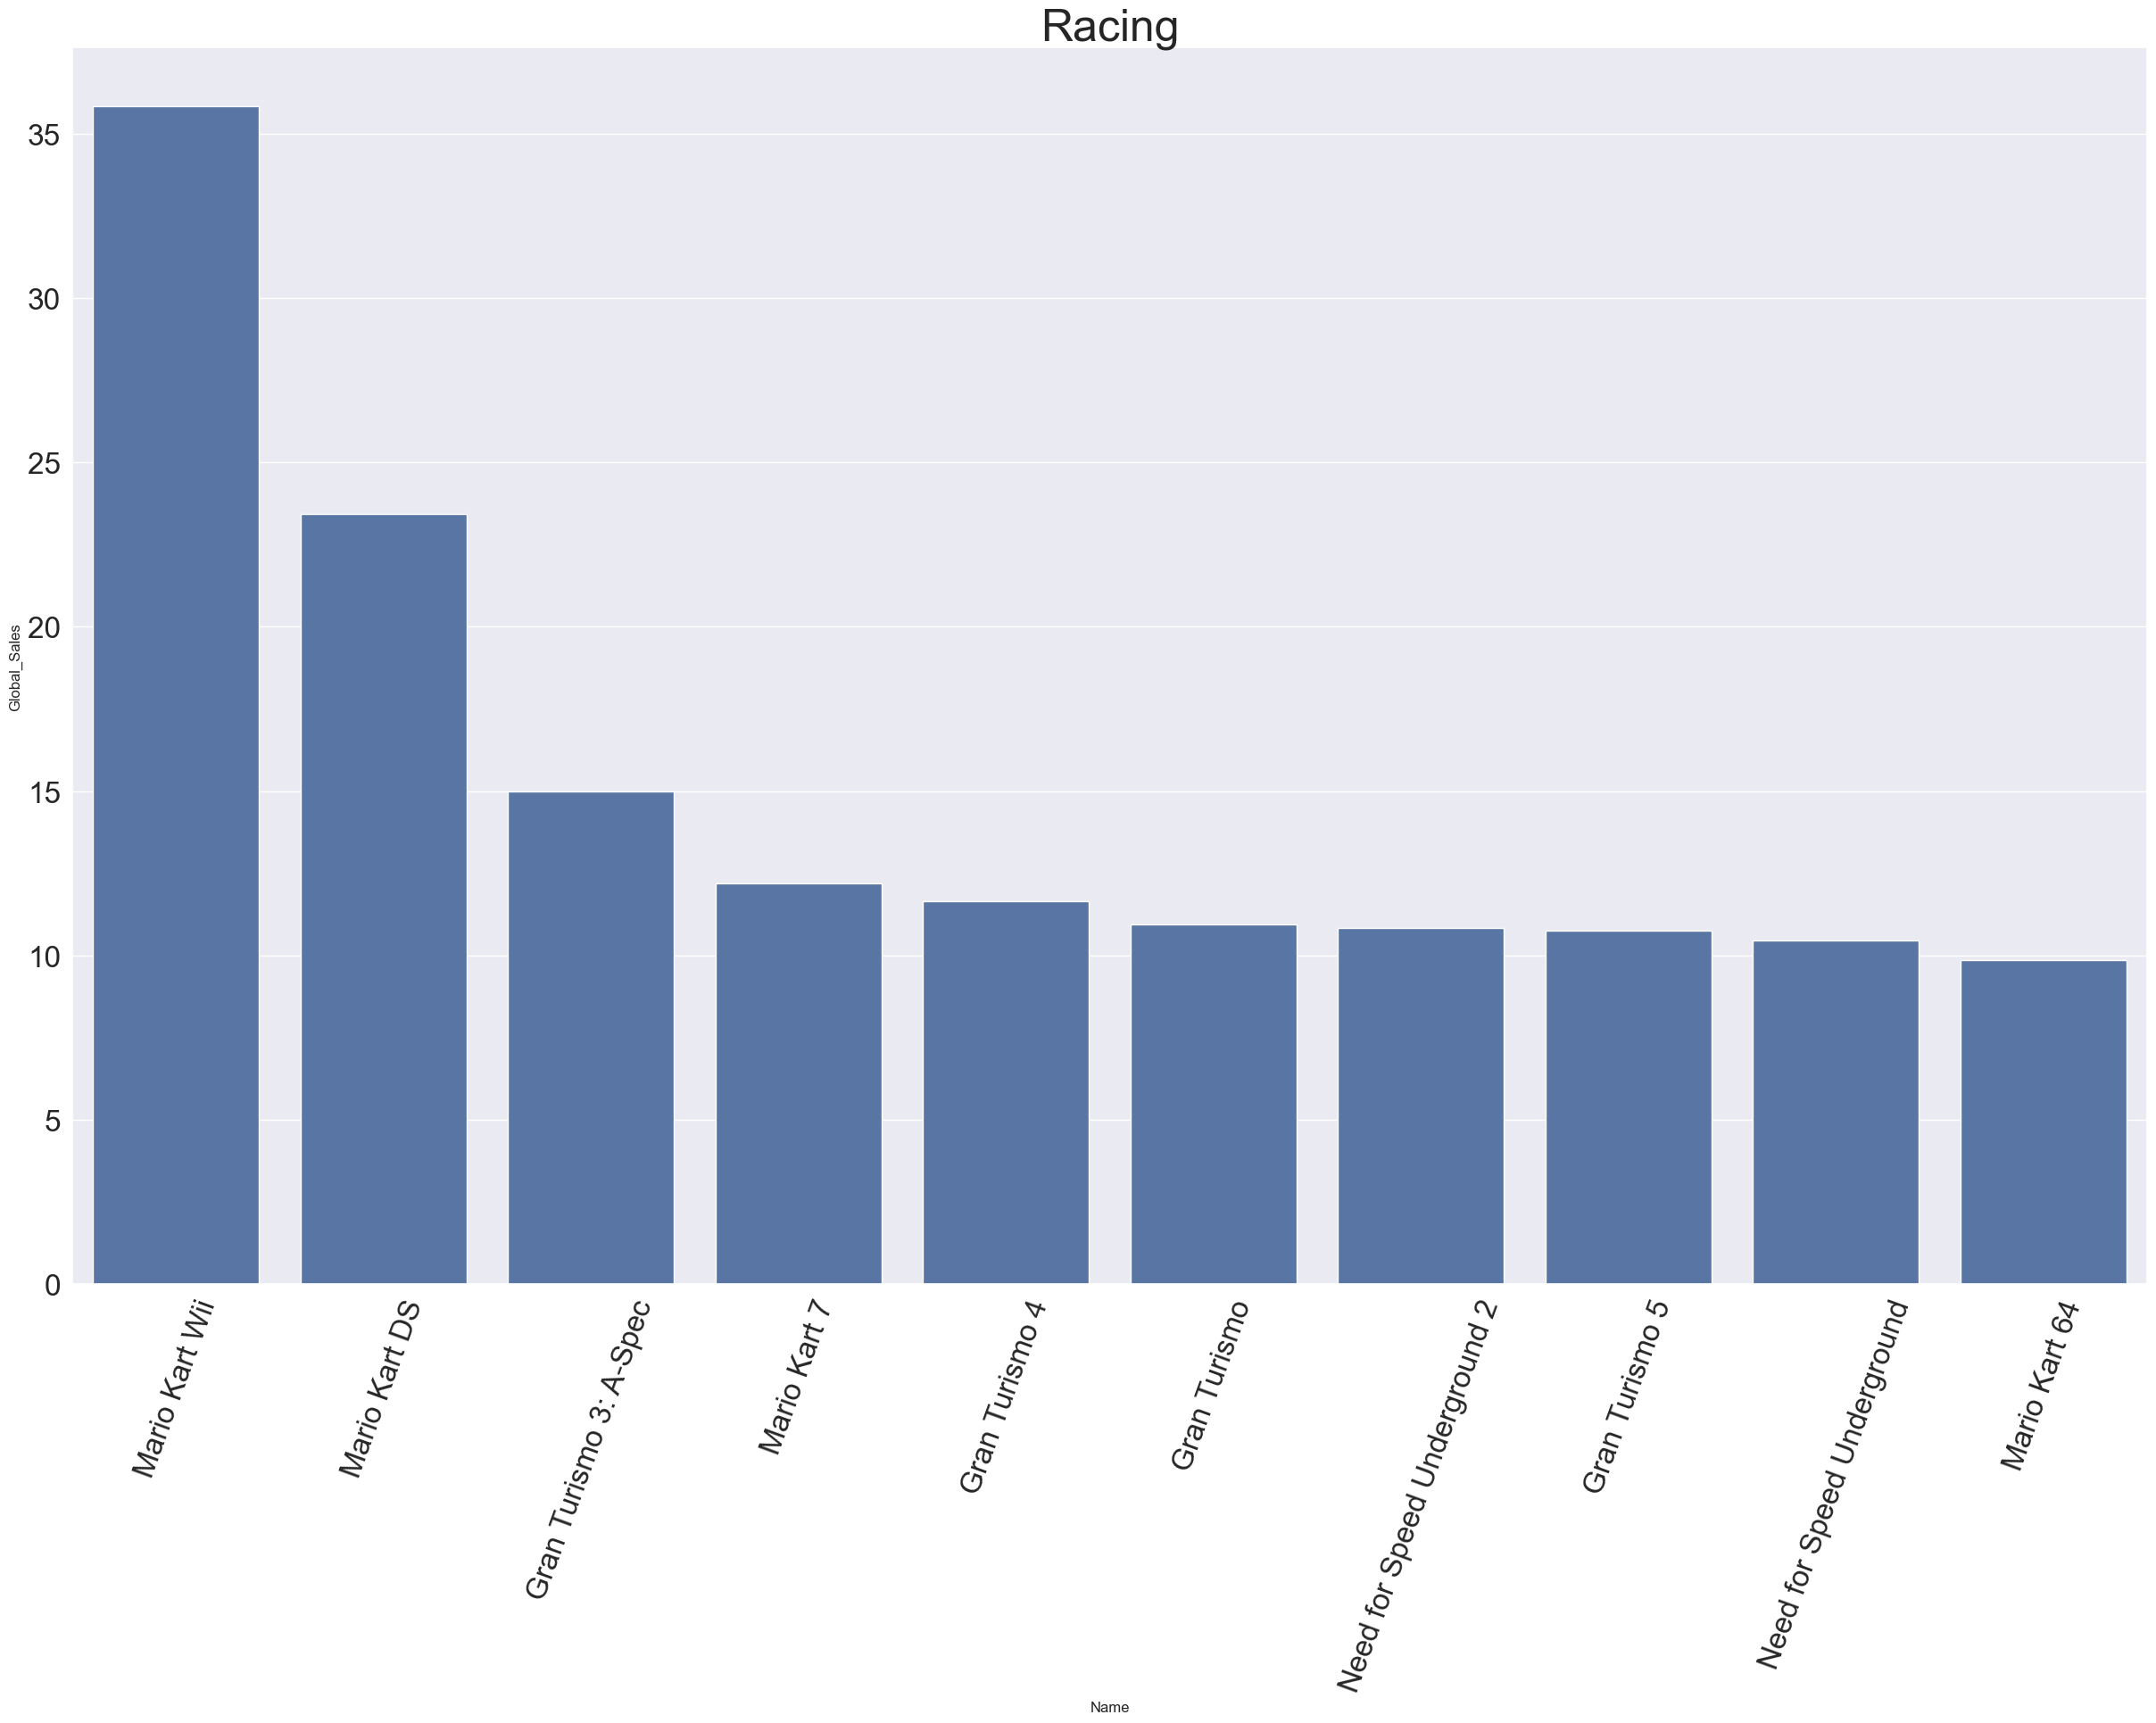

In [110]:
for genre in top_genres.index:
    new_genre = grouped_data[grouped_data["Genre"]==genre].head(10)
    year = new_genre["Year"]
    plt.figure(figsize=(30, 18))
    plt.title(genre, fontsize=36)
    
    g = sns.barplot(x='Name', y='Global_Sales', data=new_genre)
    index = 0
    # for value in new_genre['Global_Sales']:
    #     g.text(x=index, y=value - 5, s="a", color='#f7f0f0', size=18, rotation= 90, ha="center")
    #     index += 1

    plt.xticks(fontsize=24, rotation=70)
    plt.yticks(fontsize=24)
    plt.show()

In [75]:
nes_games = data[data["Platform"]=="NES"]
nes_games.head(10)

Rank                             Name Platform  Year      Genre  \
1       2                Super Mario Bros.      NES  1985   Platform   
9      10                        Duck Hunt      NES  1984    Shooter   
22     23              Super Mario Bros. 3      NES  1988   Platform   
96     97              Super Mario Bros. 2      NES  1988   Platform   
127   128              The Legend of Zelda      NES  1986     Action   
155   156                           Tetris      NES  1988     Puzzle   
215   216                        Dr. Mario      NES  1990     Puzzle   
251   252  Zelda II: The Adventure of Link      NES  1987  Adventure   
276   277     Teenage Mutant Ninja Turtles      NES  1989     Action   
277   278                       Excitebike      NES  1984     Racing   

    Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1    Nintendo     29.08      3.58      6.81         0.77         40.24  
9    Nintendo     26.93      0.63      0.28         0.47         28.31  
22   Nintendo      9.54      3.44      3.84         0.46         17.28  
96   Nintendo      5.39      1.18      0.70         0.19          7.46  
127  Nintendo      3.74      0.93      1.69         0.14          6.51  
155  Nintendo      2.97      0.69      1.81         0.11          5.58  
215  Nintendo      2.62      0.60      1.52         0.10          4.85  
251  Nintendo      2.19      0.50      1.61         0.08          4.38  
276    Palcom      3.38      0.44      0.31         0.04          4.17  
277  Nintendo      2.04      0.48      1.57         0.07          4.16

When I was a child, I was a fan of NES games. It was cheaper than PC games :) I played the Super Mario series, they were legends. But now, Platform games are not that popular. It is surprising that NES games have such high Sales numbers!